# Experiments

In [2]:
import time
import importlib
import numpy as np
import pandas as pd

from utils import *
from loggers import set_level
from experiments import scenarios, scenarios_utils, model_utils, data_utils

#for module in (scenarios, scenarios_utils, model_utils, data_utils): importlib.reload(module)
#importlib.reload(scenarios)

set_level('info')

test = False

_suffixes      = [
    '', '_lss', '_norm-no', '_norm-no_lss', '_norm-no_win', '_norm-no_lss_win',
    '_norm-no_clean', '_norm-no_lss_clean'
]
_orig_suffixes = ['', '_lss'] if not test else ['']
_orig_suffixes = []

_scenario_suffixes = {
    1 : ['_testsplit-50'],
    2 : ['_testsplit-50']
}
_scenario_suffixes = {}

_scenarios = ['_testsplit-50_scenario-1', '_testsplit-50_scenario-2', '_scenario-3', '_scenario-4']
original_experimental_models = (
    'atcnet_orig_subj-{subject}_run-{run}',
    'atcnet_subj-{subject}_run-{run}',
    'eegnex_subj-{subject}_run-{run}',
    'eegtcnet_subj-{subject}_run-{run}',
    'deepconvnet_subj-{subject}_run-{run}'
)

experimental_models = []
for exp in original_experimental_models[:2]:
    experimental_models.extend([
        exp + suffix for suffix in (_suffixes if 'orig' not in exp else _orig_suffixes)
    ])

experiments = []
for exp in experimental_models:
    for scenario in _scenarios:
        scenario_idx = int(scenario.split('-')[-1])
        experiments.extend([
            exp + suffix + scenario for suffix in [''] + _scenario_suffixes.get(int(scenario_idx), [])
        ])

#experiments = [
#    'atcnet_subj-5_run-0_norm-no_win_scenario-1',
#    'atcnet_subj-6_run-0_norm-no_win_scenario-1'
#][:1]

def simpleconv_to_atcnet(name):
    name = ['atcnet'] + name.split('_')[1:]
    return '_'.join([n for n in name if not n.startswith(('rate', 'winoff', 'winlen', 'bs'))])
    
""" Comparison between ATCNet & EEGSimpleConv in within / LOSO scenarios """
experiments = [
    'atcnet_norm-no_subj-1_run-10_scenario-3',
    'atcnet_ea_norm-no_subj-1_run-10_scenario-3',
    
    'atcnet_norm-no_subj-{subject}_run-10_scenario-4',
    'atcnet_ea_norm-no_subj-{subject}_run-10_scenario-4',

    'atcnet_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'atcnet_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',


    'eegsimpleconv_rate-95_winoff-499_winlen-1001_bs-16_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_rate-95_winoff-499_winlen-1001_bs-16_ea_norm-no_subj-1_run-10_scenario-3',

    'eegsimpleconv_rate-70_winoff-499_winlen-1001_bs-288_norm-no_subj-{subject}_run-10_scenario-4',
    'eegsimpleconv_rate-70_winoff-499_winlen-1001_bs-288_ea_norm-no_subj-{subject}_run-10_scenario-4',

    'eegsimpleconv_rate-70_winoff-499_winlen-1001_bs-288_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_rate-70_winoff-499_winlen-1001_bs-288_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
]

""" Comparison between ATCNet & EEGSimpleConv with GE2E-loss in within / LOSO scenarios """
experiments += [
    'atcnet_ge2e_nlab-4_nut-16_norm-no_subj-1_run-10_scenario-3',
    'atcnet_ge2e_nlab-4_nut-16_ea_norm-no_subj-1_run-10_scenario-3',
    
    'atcnet_ge2e_nlab-4_nut-64_norm-no_subj-{subject}_run-10_scenario-4',
    'atcnet_ge2e_nlab-4_nut-64_ea_norm-no_subj-{subject}_run-10_scenario-4',

    'atcnet_ge2e_nlab-4_nut-64_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'atcnet_ge2e_nlab-4_nut-64_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',


    'eegsimpleconv_ge2e_nlab-4_nut-16_rate-95_winoff-499_winlen-1001_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff-499_winlen-1001_norm-no_subj-{subject}_run-10_scenario-4',
    'eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff-499_winlen-1001_ea_norm-no_subj-{subject}_run-10_scenario-4',

    'eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff-499_winlen-1001_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
]

""" Tests for the hyperparameters of the GE2E-loss with EEGSimpleConv """
experiments += [
    'eegsimpleconv_rate-95_winoff-499_winlen-1001_bs-16_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-8_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-32_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-128_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'eegsimpleconv_ge2e_nlab-4_nut-8_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-24_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    
    'eegsimpleconv_ge2e_nlab-4_nut-8_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-24_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    
    'eegsimpleconv_ge2e_nlab-4_nut-8_dim-64_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-16_dim-64_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_win-10_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
]

""" Tests for the hyperparameters of the GE2E-loss with EEGSimpleConv in LOSO scenario """

experiments += [
    'eegsimpleconv_rate-70_winoff-499_winlen-1001_bs-288_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',

    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',

    'eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    #'eegsimpleconv_ge2e_nlab-4_nut-128_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
]

experiments += [
    'eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-24_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5',
    'eegsimpleconv_ge2e-contrast_metric-euclidian_nlab-4_nut-24_dim-64_rate-70_winoff-499_winlen-1001_ea_norm-no_loso-s1_subj-{subject}_run-10_scenario-5'
]

""" Tests for the hyperparameters of the GE2E-loss with EEGSimpleConv """
experiments += [simpleconv_to_atcnet(name) for name in experiments if 'win-' not in name]
experiments += [name.replace('ea_', '') for name in experiments if 'win-' not in experiments]

_experiments = [
    'singlechannelcombination_cdim-1_rate-95_winoff-499_winlen-1001_bs-16_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_cdim-8_rate-95_winoff-499_winlen-1001_bs-16_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_cdim-16_rate-95_winoff-499_winlen-1001_bs-16_ea_norm-no_subj-1_run-10_scenario-3',

    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-8_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-32_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-128_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-64_cdim-1_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-64_cdim-8_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-64_cdim-16_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',

    'singlechannelcombination_ge2e_nlab-4_nut-8_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-16_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
    'singlechannelcombination_ge2e_nlab-4_nut-24_dim-64_rate-95_winoff-499_winlen-1001_ea_norm-no_subj-1_run-10_scenario-3',
]
#experiments += [
#    exp.replace('ge2e', 'ge2e_metric-euclidian')
#    for exp in experiments if 'metric' not in exp
#]
#experiments = [
#    exp.replace('ge2e', 'ge2e_cdrop-0') for exp in experiments
#]

""" Tests for the hyperparameters of the GE2E-loss with ATCNetv2 """
experiments = [
    'atcnetv2_fit_norm-no_subj-6_run-10_scenario-3',
    
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-8_dim-32_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_dim-32_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-24_dim-32_norm-no_subj-6_run-10_scenario-3',

    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-8_dim-64_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_dim-64_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-24_dim-64_norm-no_subj-6_run-10_scenario-3',

    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-12_dim-64_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-12_dim-32_norm-no_subj-6_run-10_scenario-3',
    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-16_dim-64_norm-no_subj-6_run-10_scenario-3',
    
    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-12_dim-64_win-5_norm-no_subj-6_run-10_scenario-3'
]

experiments = [
    'atcnetv2_fit_norm-no_loso-s6_subj-{subject}_run-10_scenario-5',
    
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-32_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5',
    'atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-64_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5',

    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-16_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5',
    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-32_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5',
    'atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-64_dim-64_norm-no_loso-s6_subject-{subject}_run-10_scenario-5'
]

_experiments = [
    'singlechannelcombination-atcnetv2_fit_cdim-8_cdrop-25_norm-no_subj-6_run-10_scenario-3',
    'singlechannelcombination-atcnetv2_fit_cdim-8_cdrop-50_norm-no_subj-6_run-10_scenario-3',
    'singlechannelcombination-atcnetv2_fit_cdim-8_cdrop-25_ge2e_nlab-4_nut-24_norm-no_subj-6_run-10_scenario-3',
    'singlechannelcombination-atcnetv2_fit_cdim-8_cdrop-25_ge2e_metric-euclidian_nlab-4_nut-24_norm-no_subj-6_run-10_scenario-3'
]

if any(name.startswith('atcnetv2') and (name.endswith(('-4', '-5')) or 'win' in name) for name in experiments):
    gpu_config = {'gpu_memory' : 1024 * 4, 'max_workers' : 3}
if any(name.startswith('singlechannelcombination') and 'atcnet' in name for name in experiments):
    gpu_config = {'gpu_memory' : 1024 * 6, 'max_workers' : 2}
else:
    gpu_config = {'gpu_memory' : 1024 * 3, 'max_workers' : 4}

#experiments = ['atcnet_subj-1-2-3-4-5-6-7-8-9_run-0_norm-no_scenario-4']
results = scenarios.run_experiments(
    experiments[:],
    subject    = range(1, 10),
    run        = range(0, 5),
    skip_new   = False,
    gpu        = 0,
    overwrite  = False,
    ** gpu_config
)
results

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 333.03it/s]


{'atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7-8-9_run-10_scenario-5': {'scenario': 5,
  'model_name': 'atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7-8-9_run-10_scenario-5',
  'model_type': 'classifier',
  'pretrained': None,
  'skip_new': False,
  'overwrite': False,
  'scenario_config': {'train_on_multi_subjects': True},
  'dataset_config': {'task': 'classification',
   'test_task': 'classification',
   'dataset': 'bci-iv_2a',
   'subjects': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'channel': None,
   'loso': 's6',
   'val_split': 0.2,
   'stratify': True,
   'global_normalize': False,
   'test_split': 0.2,
   'split_channels': False,
   'per_user_label': False,
   'time_window': 4.5,
   'offset': 1.5},
  'model_config': {'nom': 'atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7-8-9_run-10_scenario-5',
   'rate': None,
   'use_ea': False,
   'architecture_name': 'atcnetv2',
   'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>,
    'per_channel': True},
   'keep_spatial_inf

In [3]:
res = pd.DataFrame({k : conf['metrics'] for k, conf in results.items()}).T
res.sort_values('test_accuracy' if 'test_offline_accuracy' not in res.columns else 'test_offline_accuracy', ascending = False)

test_accuracy  \
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_d...       0.475694   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-32_d...       0.446181   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-1...       0.461806   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-6...       0.468750   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-3...       0.428819   
atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7...       0.414931   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-64_d...       0.427083   

                                                    test_sess-session 1_accuracy  \
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_d...                      0.482639   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-32_d...                      0.458333   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-1...                      0.475694   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-6...                      0.482639   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-3...                      0.454861   
atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7...                      0.402778   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-64_d...                      0.451389   

                                                    test_sess-session 2_accuracy  \
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_d...                      0.468750   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-32_d...                      0.434028   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-1...                      0.447917   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-6...                      0.454861   
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-3...                      0.402778   
atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7...                      0.427083   
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-64_d...                      0.402778   

                                                    test_offline_accuracy  
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-16_d...               0.486111  
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-32_d...               0.486111  
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-1...               0.465278  
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-6...               0.465278  
atcnetv2_fit_ge2e_metric-euclidian_nlab-4_nut-3...               0.444444  
atcnetv2_fit_norm-no_loso-s6_subj-1-2-3-4-5-6-7...               0.427083  
atcnetv2_fit_ge2e_metric-cosine_nlab-4_nut-64_d...               0.416667

In [12]:
from utils import plot_utils
from experiments import scenarios_utils
from IPython.display import display

importlib.reload(scenarios_utils)
importlib.reload(plot_utils)

def _should_keep(col):
    if col == metric: return True
    try:
        uniques = df[col].unique().tolist()
        uniques = [v for v in uniques if v is not None]
        return 1 < len(uniques) < len(df)
    except Exception as e:
        return False

scenario = 5
if scenario == 3:   metric = 'test_accuracy'
elif scenario == 4: metric = 'test_subj-BCI-IV 2a-1_sess-session 2_accuracy'
elif scenario == 5: metric = 'test_offline_accuracy'

filters = {'scenario' : scenario, 'architecture_name' : 'eegsimpleconv', 'use_ea' : True}

for use_ea in (True, False):
    filters['use_ea'] = use_ea
    all_infos = {
        k : scenarios_utils._flatten_dict(v) for k, v in results.items()
    }
    df = pd.DataFrame(all_infos).T
    print(df['scenario'].value_counts())
    df = filter_df(df, ** filters)
    df = df[[c for c in df.columns if _should_keep(c)]]
    
    """plot_utils.plot_multiple(
        df, corr = metric,
        color_corr = 'use_ea', color_order = {0 : 'r', 1 : 'c'},
        shape_corr = 'architecture_name', shape_order = ['x', 'o'],
        ncols = 3
    )"""
    display(df.sort_values(metric, ascending = False).iloc[:25])

3    56
5    52
4     8
Name: scenario, dtype: int64


model_type batch_size  \
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...     encoder         96   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...  classifier        288   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...     encoder        192   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...     encoder         96   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...     encoder        256   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...     encoder         96   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...     encoder         96   

                                                   patience test_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...       50      0.295139   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...      100      0.307292   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...       50      0.279514   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...       50      0.295139   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...       50      0.256944   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...       50      0.296875   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...       50      0.258681   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...       50      0.295139   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...       50      0.277778   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...       50      0.298611   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...       50      0.310764   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...       50      0.255208   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...       50       0.28125   

                                                   test_sess-B_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...                  NaN   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...               0.3125   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...              0.28125   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...             0.315972   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...             0.256944   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...                  NaN   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...             0.315972   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...             0.326389   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...                  NaN   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...                  NaN   

                                                   test_offline_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...              0.784722   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...              0.763889   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...              0.760417   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...              0.753472   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...                  0.75   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...              0.746528   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...              0.746528   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...              0.746528   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...              0.725694   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...              0.715278   
eegsimp

3    56
5    52
4     8
Name: scenario, dtype: int64


model_type batch_size  \
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...     encoder        192   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...     encoder         96   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...     encoder         96   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...     encoder         96   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...     encoder        256   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...     encoder         96   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...     encoder        256   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...     encoder        256   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...  classifier        288   

                                                   patience test_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...       50      0.572917   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...       50      0.571181   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...       50      0.578125   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...       50       0.59375   
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...       50      0.605903   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...       50      0.588542   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...       50        0.5625   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...       50      0.550347   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...       50      0.581597   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...       50      0.560764   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...       50      0.564236   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...       50      0.564236   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...      100      0.552083   

                                                   test_sess-B_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...                  NaN   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...                  NaN   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...                  NaN   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...                  NaN   
eegsimpleconv_ge2e_nlab-4_nut-64_rate-70_winoff...             0.583333   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-8_rate-70_...                  NaN   
eegsimpleconv_rate-70_winoff-499_winlen-1001_bs...             0.555556   

                                                   test_offline_accuracy  \
eegsimpleconv_ge2e_nlab-4_nut-64_dim-64_rate-70...              0.670139   
eegsimpleconv_ge2e_nlab-4_nut-48_dim-64_rate-70...              0.649306   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-128_rate-7...              0.642361   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-256_rate-7...              0.635417   
eegsimpleconv_ge2e_nlab-4_nut-24_dim-64_rate-70...              0.631944   
eegsimpleconv_ge2e-contrast_nlab-4_nut-24_dim-6...              0.607639   
eegsimpleconv_ge2e_metric-euclidian_nlab-4_nut-...              0.604167   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-32_rate-70...              0.600694   
eegsimpleconv_ge2e-contrast_metric-euclidian_nl...              0.600694   
eegsimpleconv_ge2e_nlab-4_nut-64_dim-16_rate-70...              0.597222   
eegsimp

## Results analysis

In [2]:
import json
import importlib
import numpy as np

from utils import plot_utils
from experiments import analysis, model_utils

importlib.reload(analysis)
importlib.reload(model_utils)

skip_keys = ('orig', )

def should_skip(name):
    if 'lss' in name and 'masked' not in name: return True
    return any(k in name for k in skip_keys)

def filter_fn(config):
    if config['scenario'] in (1, 2) and 'testsplit' not in config['model_name']: return False
    return True

filtered_results = {
    name : config for name, config in results.items() if filter_fn(config)
}
subj_groups = analysis.group_by_subject(filtered_results)

groups = analysis.group_models(subj_groups, skip = should_skip, ignore = ('run', 'testsplit'))

In [6]:
{k : v['metrics'] for k, v in results.items() if k.endswith('-4')}

{'atcnet_subj-1-2-3-4-5-6-7-8-9_run-0_scenario-4': {'test_accuracy': None,
  'test_subj-1_accuracy': 0.7395833134651184,
  'test_subj-2_accuracy': 0.53125,
  'test_subj-3_accuracy': 0.8958333134651184,
  'test_subj-4_accuracy': 0.65625,
  'test_subj-5_accuracy': 0.6701388955116272,
  'test_subj-6_accuracy': 0.6493055820465088,
  'test_subj-7_accuracy': 0.7777777910232544,
  'test_subj-8_accuracy': 0.8298611044883728,
  'test_subj-9_accuracy': 0.7395833134651184},
 'atcnet_subj-1-2-3-4-5-6-7-8-9_run-1_scenario-4': {'test_accuracy': None,
  'test_subj-1_accuracy': 0.7534722089767456,
  'test_subj-2_accuracy': 0.5763888955116272,
  'test_subj-3_accuracy': 0.8784722089767456,
  'test_subj-4_accuracy': 0.7256944179534912,
  'test_subj-5_accuracy': 0.7256944179534912,
  'test_subj-6_accuracy': 0.65625,
  'test_subj-7_accuracy': 0.8090277910232544,
  'test_subj-8_accuracy': 0.84375,
  'test_subj-9_accuracy': 0.7777777910232544},
 'atcnet_subj-1-2-3-4-5-6-7-8-9_run-2_scenario-4': {'test_accura

{
    "Subject 1": {
        "atcnet (scenario-1)": "80.35",
        "atcnet (scenario-3)": "82.22",
        "atcnet (norm-no) (scenario-1)": "80.42",
        "atcnet (norm-no) (scenario-3)": "80.49",
        "atcnet (norm-no) (win) (scenario-1)": "72.36",
        "atcnet (norm-no) (win) (scenario-3)": "77.57",
        "atcnet (norm-no) (clean) (scenario-1)": "72.64",
        "atcnet (norm-no) (clean) (scenario-3)": "73.61"
    },
    "Subject 2": {
        "atcnet (scenario-1)": "57.50",
        "atcnet (scenario-3)": "56.94",
        "atcnet (norm-no) (scenario-1)": "52.22",
        "atcnet (norm-no) (scenario-3)": "54.17",
        "atcnet (norm-no) (win) (scenario-1)": "38.54",
        "atcnet (norm-no) (win) (scenario-3)": "42.78",
        "atcnet (norm-no) (clean) (scenario-1)": "41.60",
        "atcnet (norm-no) (clean) (scenario-3)": "39.03"
    },
    "Subject 3": {
        "atcnet (scenario-1)": "90.21",
        "atcnet (scenario-3)": "90.28",
        "atcnet (norm-no) (scenar

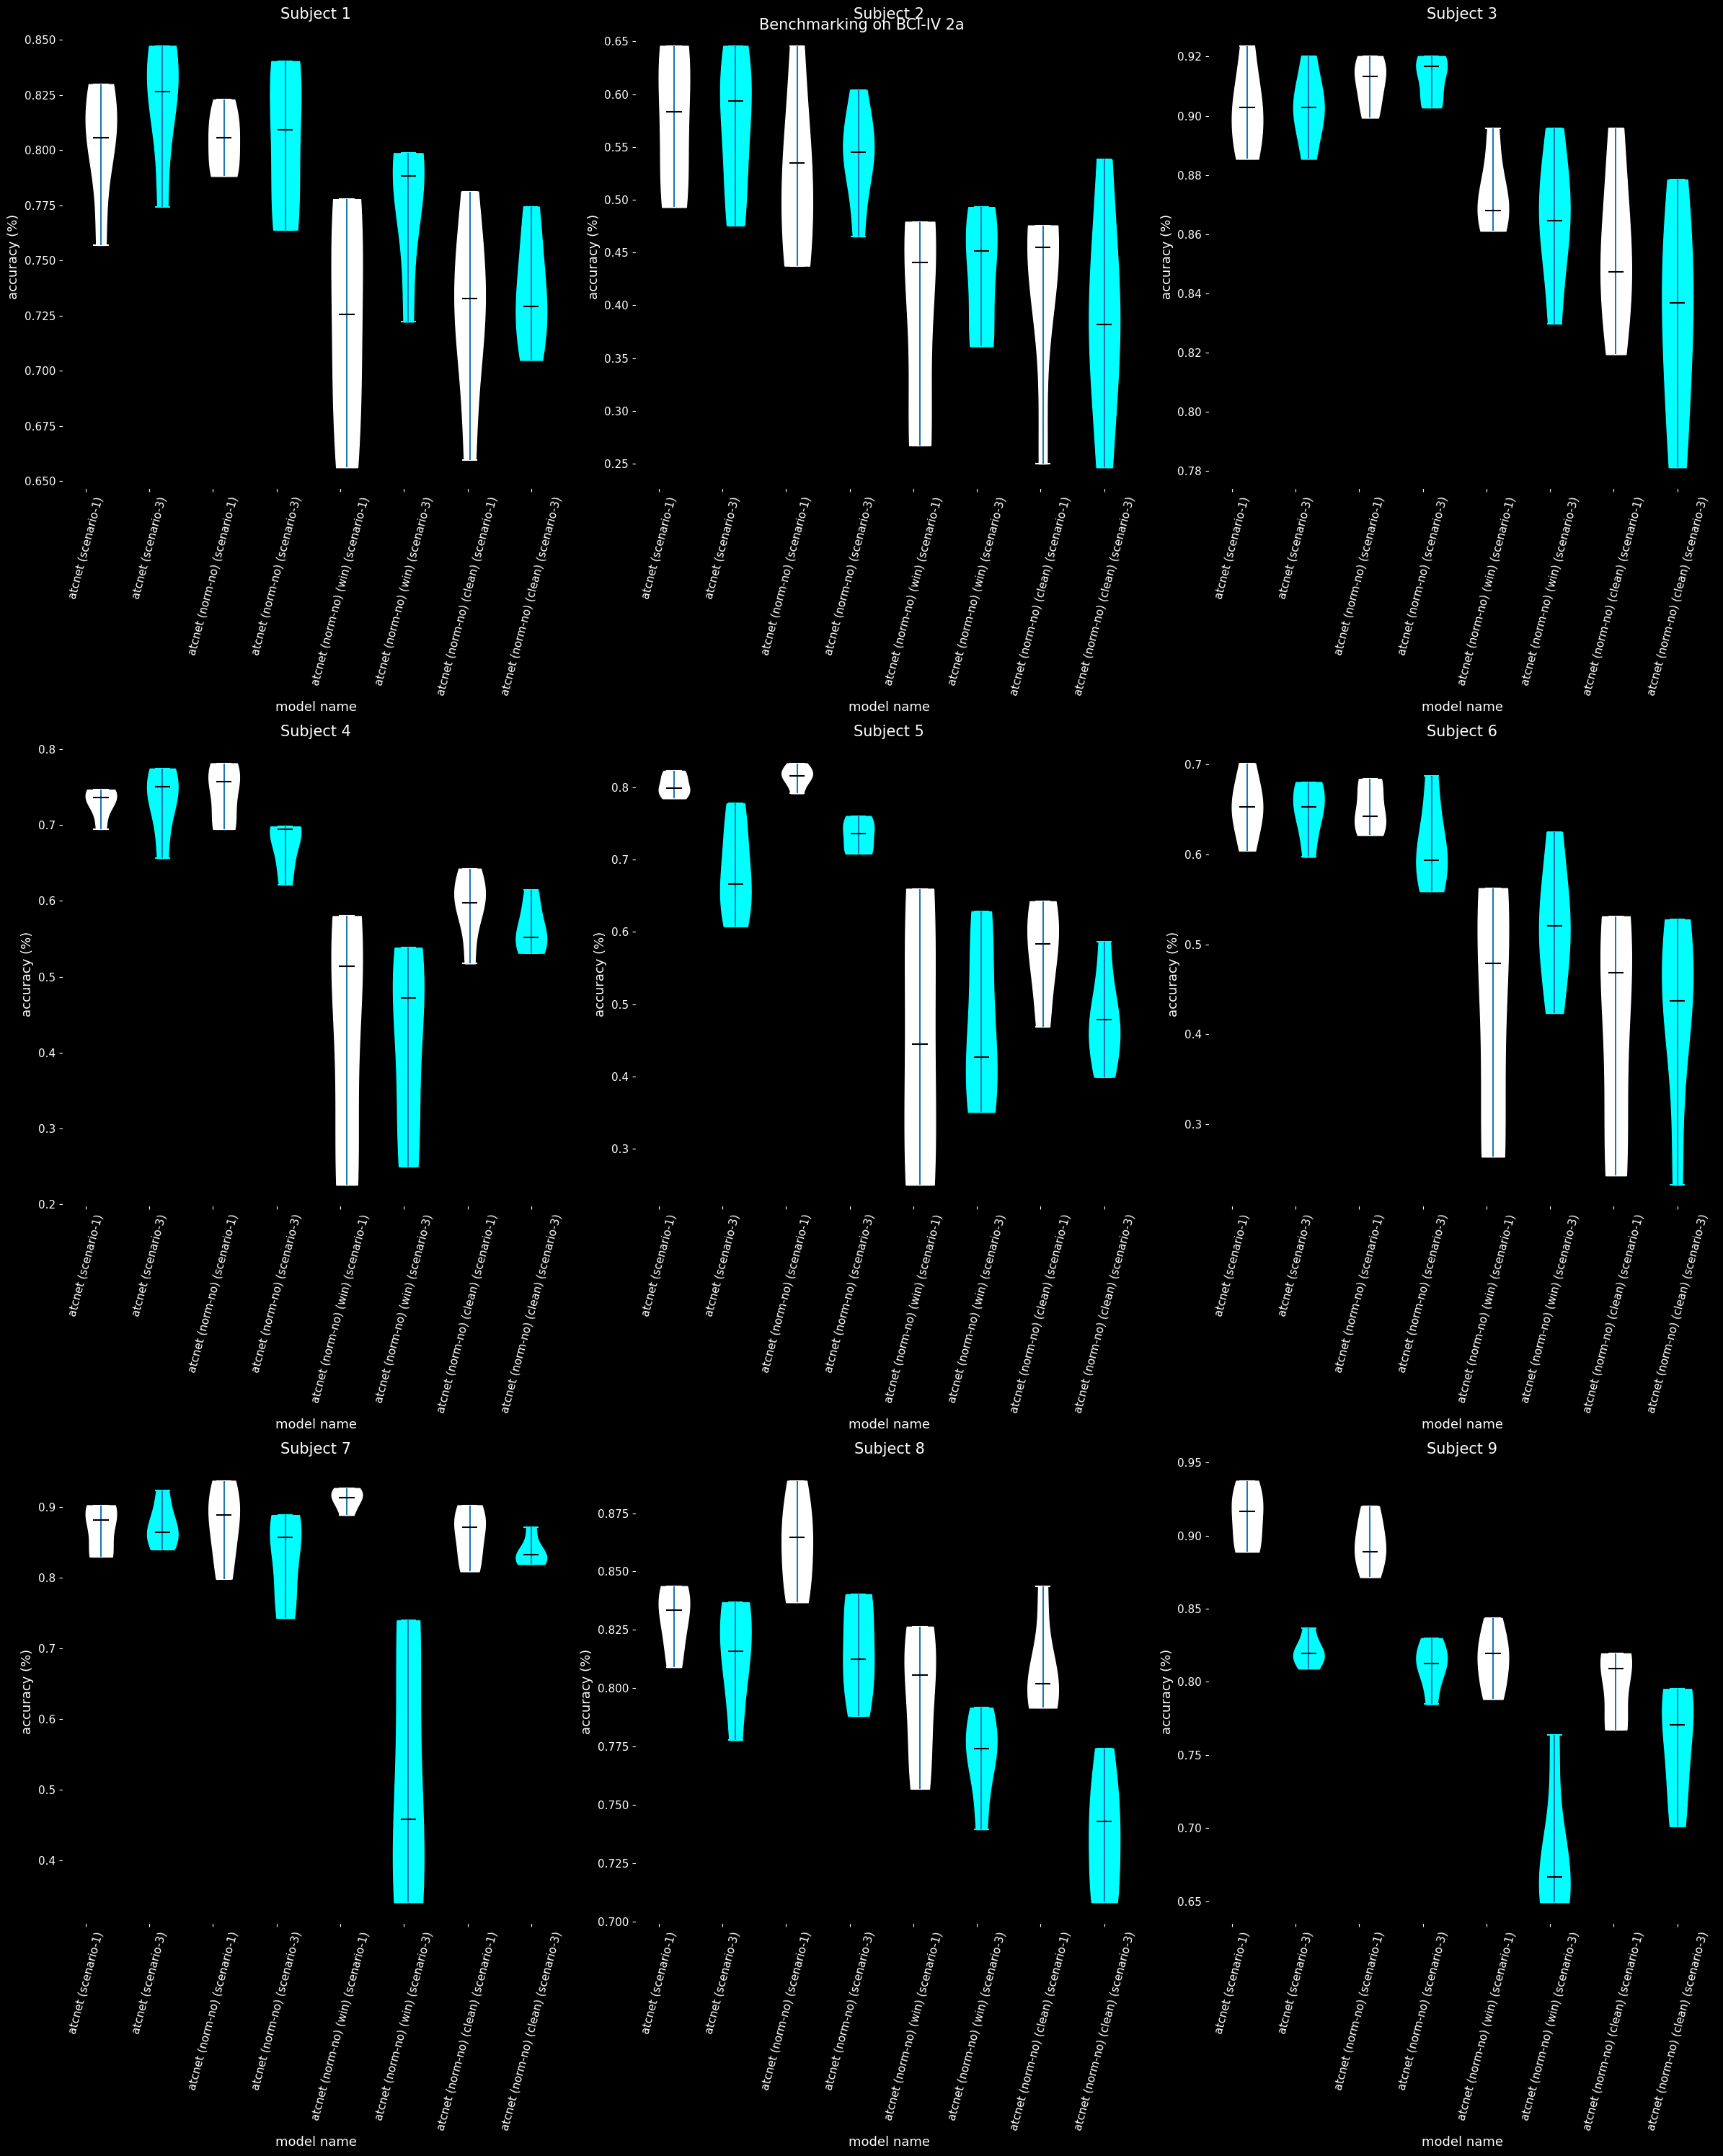

In [3]:
_colors = {
    1 : 'w',
    2 : 'y',
    3 : 'cyan',
    4 : 'r'
}
colors = []
for exp in groups[list(groups.keys())[0]]:
    colors.append(_colors[model_utils.get_model_info(exp, 'scenario')])

print(json.dumps({
    subj : {met : '{:.2f}'.format(np.mean(vals) * 100) for met, vals in infos.items()}
    for subj, infos in groups.items()
}, indent = 4))

plot_utils.plot_multiple(
    ** {k : {'x' : v, 'color' : colors} for k, v in groups.items()},
    use_subplots = True, plot_type = 'violinplot', xtick_rotation = 75,
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png', ncols = 3, x_size = 8, y_size = 10,
)

In [ ]:
importlib.reload(analysis)

_colors = {
    1 : 'w',
    2 : 'y',
    3 : 'cyan',
    4 : 'r'
}

def rename_model(name):
    for k in ('1', '3'):
        if k in name:
            name = name.replace(k, '1 vs 3')
            break
    for k in ('2', '4'):
        if k in name:
            name = name.replace(k, '2 vs 4')
            break
    return name

config = ('lss', 'masked')
config = 'norm-no'
#config = 'win'
#config = 'clean'

rename_model = None

comparison = analysis.compare_config_effect(groups, config, rename_model = rename_model)

colors = []
for exp in comparison[list(comparison.keys())[0]]:
    colors.append(_colors[model_utils.get_model_info(exp, 'scenario')])

print(json.dumps({
    subj : {met : '{:.2f}'.format(np.mean(vals) * 100) for met, vals in infos.items()}
    for subj, infos in comparison.items()
}, indent = 4))

plot_utils.plot_multiple(
    ** {k : {'x' : v, 'color' : colors} for k, v in comparison.items()},
    use_subplots = True, plot_type = 'violinplot', xtick_rotation = 75,
    hlines = 0, hlines_kwargs = {'color' : 'red', 'linewidth' : 5}, labelsize = 25,
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png', ncols = 3, x_size = 10, y_size = 15,
)

In [ ]:
comparison_all = {}
for subj, infos in comparison.items():
    for model, vals in infos.items():
        comparison_all.setdefault(model, []).extend(vals)

print(json.dumps({
    model : '{:.2f}'.format(np.mean(vals) * 100) for model, vals in comparison_all.items()
}, indent = 4))

plot_utils.plot(
    comparison_all, color = colors,
    plot_type = 'violinplot', xtick_rotation = 75,
    hlines = 0, hlines_kwargs = {'color' : 'red', 'linewidth' : 5},
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png', figsize = (4, 8)
)

## Reproduction on BCI-IV 2a

In [ ]:
import time
import numpy as np

from loggers import set_level
from utils import plot, time_to_string
from experiments.scenarios import *
from experiments.model_utils import *

set_level('info')

test = False

_suffixes      = ['', '_lss', '_norm-no', '_norm-no_lss', '_norm-no_win', '_norm-no_lss_win']
_orig_suffixes = ['', '_lss'] if not test else ['']

_scenarios = ['_scenario-1', '_scenario-2', '_scenario-3', '_scenario-4'] #if not test else ['_scenario-3']
original_experimental_models = (
    'atcnet_orig_subj-{subject}_run-{run}',
    'atcnet_subj-{subject}_run-{run}',
    'eegnex_subj-{subject}_run-{run}',
    'eegtcnet_subj-{subject}_run-{run}',
    'deepconvnet_subj-{subject}_run-{run}'
)

experimental_models = []
for exp in original_experimental_models[:2]:
    experimental_models.extend([
        exp + suffix for suffix in (_suffixes if 'orig' not in exp else _orig_suffixes)
    ])

experiments = []
for exp in experimental_models:
    experiments.extend([
        exp + scenario for scenario in _scenarios
    ])

#experiments += [n + '_v3' for n in experiments]

accuracies = {}
for _ in range(2 if not test else 1):
    for model_name in experiments:
        if 'win' in model_name and ('scenario-1' in model_name or 'scenario-2' in model_name): continue
        t0 = time.time()
        results = run_scenario(
            model_name   = model_name,
            dataset_name = 'bci-iv_2a',
            subject      = range(1, 10), #if not test else range(1, 4),
            run          = range(0, 4) if not test else 0,
            gpu_memory   = 512 * 7,
            batch_size   = 32
        )
    
        for name, acc in results.items():
            if not isinstance(acc, (list, tuple)): acc = [acc]
            accuracies.setdefault(name, []).extend(acc)
        
        print('Total time for {} : {}'.format(model_name, time_to_string(time.time() - t0)))

accuracies = {k : v for k, v in sorted(accuracies.items())}
print('Best accuracy :\n{}'.format('\n'.join([
    '- {} : {:.3f} ({:.3f} +/- {:.3f})'.format(name, np.max(acc), np.mean(acc), np.std(acc))
    for name, acc in accuracies.items()
])))

plot(
    accuracies, plot_type = 'boxplot', xtick_rotation = 75,
    vlines = np.arange(len(experiments) + 0.5, len(accuracies), len(experiments)),
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png', figsize = (15, 10)
)

In [ ]:
import json
import importlib

from utils import plot_utils
from experiments import model_utils

importlib.reload(model_utils)
importlib.reload(plot_utils)

_skip_patterns = ('orig', ) #'-1', '-2')
_required_patterns = ('orig', ) if 'orig' not in _skip_patterns else ()

groups = {}
for k, v in accuracies.items():
    if any(pat in k for pat in _skip_patterns): continue
    if any(pat not in k for pat in _required_patterns): continue

    if 'lss' in k and 'masked' not in k: continue
    
    parts = k.split()
    subj  = 'Subject {}'.format(parts[1][-1])
    
    groups.setdefault(subj, {}).update({' '.join([parts[i] for i in range(len(parts)) if i != 1]) : v})

_colors = {
    '1' : 'w',
    '2' : 'y',
    '3' : 'cyan',
    '4' : 'r'
}
colors = []
for exp in groups['Subject 1']:
    colors.append(_colors[model_utils.get_model_info(exp, 'scenario')])

print(json.dumps({subj : {met : '{:.2f}'.format(np.max(vals) * 100) for met, vals in infos.items()} for subj, infos in groups.items()}, indent = 4))
plot_utils.plot_multiple(
    ** {k : {'x' : v, 'color' : colors} for k, v in groups.items()},
    use_subplots = True, plot_type = 'violinplot', xtick_rotation = 75,
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png', ncols = 3, x_size = 8, y_size = 10,
)

In [ ]:
sessions = {'Without cross-session' : {}, 'With cross-session' : {}}
for key in ('atcnet (scenario-1)', 'atcnet (scenario-2)', 'atcnet (lss) (scenario-2) (masked)'):
    if 'orig' in _required_patterns:
        parts = key.split()
        key = ' '.join(parts[:1] + ['(orig)'] + parts[1:])
    
    for subj, infos in groups.items():
        sessions['Without cross-session'].setdefault(key, []).append(np.mean(infos[key]))

for key in ('atcnet (scenario-3)', 'atcnet (scenario-4)', 'atcnet (lss) (scenario-4) (masked)'):
    if 'orig' in _required_patterns:
        parts = key.split()
        key = ' '.join(parts[:1] + ['(orig)'] + parts[1:])
    
    for subj, infos in groups.items():
        sessions['With cross-session'].setdefault(key, []).append(np.mean(infos[key]))



print(json.dumps({sess : {met : '{:.2f}'.format(np.mean(vals) * 100) for met, vals in infos.items()} for sess, infos in sessions.items()}, indent = 4))
plot_utils.plot_multiple(
    ** {k : {'x' : v} for k, v in sessions.items()}, use_subplots = True, plot_type = 'boxplot', xtick_rotation = 75,
    title = 'Benchmarking on BCI-IV 2a\nMulti-subject impact', xlabel = 'scenario', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci_multi_subj.png', ncols = 2, x_size = 5, y_size = 6
)

In [ ]:
wo_cross_sess = list(sessions['Without cross-session'].values())
w_cross_sess  = list(sessions['With cross-session'].values())

impacts = {
    'Without cross-session' : {
        'Multi subjects' : np.array(wo_cross_sess[1]) - np.array(wo_cross_sess[0]),
        'Label augmentation' : np.array(wo_cross_sess[2]) - np.array(wo_cross_sess[0])
    },
    'With cross-session' : {
        'Multi subjects' : np.array(w_cross_sess[1]) - np.array(w_cross_sess[0]),
        'Label augmentation' : np.array(w_cross_sess[2]) - np.array(w_cross_sess[0])
    }
}
print(json.dumps({sess : {met : '{:.2f}'.format(np.mean(vals) * 100) for met, vals in infos.items()} for sess, infos in impacts.items()}, indent = 4))
plot_utils.plot_multiple(
    ** {k : {'x' : v} for k, v in impacts.items()}, use_subplots = True, plot_type = 'boxplot', xtick_rotation = 75,
    title = 'Benchmarking on BCI-IV 2a\nMulti-subject impact', xlabel = 'scenario', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci_multi_subj.png', ncols = 2, x_size = 5, y_size = 6
)
impacts

## Model analysis

In [ ]:
import importlib
import numpy as np

from utils.plot_utils import *
from models import get_pretrained
from datasets import prepare_dataset
from experiments import masked_accuracy, get_experimental_data, get_model_config

model_name = 'atcnet_subj-1-2-3-4-5-6-7-8-9_run-0_lss_scenario-4'
model = get_pretrained(model_name)

_, _, test, _ = get_experimental_data(
    'bci-iv_2a',
    model_name,
    subject = range(1, 10),
    run     = 0,
    random_state = 0,
    val_split    = 0.2,
    
    offset = 1.5,
    time_window = 4.5,
    ** get_model_config(model_name)
)

In [ ]:
importlib.reload(masked_accuracy)

data = test

config = model.get_dataset_config(batch_size = 64, is_validation = True)
for i, (subj, subj_data) in enumerate(data.groupby('id')):
    print(subj)
    subj_labels = subj_data['label'].unique().tolist()
    dataset = prepare_dataset(subj_data, ** config)

    acc = masked_accuracy.MaskedAccuracy(labels = model.labels, labels_to_keep = subj_labels)
    
    mask = np.array([label in subj_labels for label in model.labels])
    true, pred, masked_pred, grouped_pred = [], [], [], []
    for inp, out in dataset:
        probs = model(inp, training = False)
        pred.extend(np.argmax(probs, axis = -1))
        masked_pred.extend(np.argmax(probs * mask, axis = -1))
        grouped_pred.extend(np.argmax(probs, axis = -1) % 4 + 4 * i)
        true.extend(out.numpy())

        acc.update_state(out, probs)
    
    true, pred, masked_pred, grouped_pred = (
        np.array(true), np.array(pred), np.array(masked_pred), np.array(grouped_pred)
    )

    print('Accuracy : {:.2f} % - masked : {:.2f} % - grouped : {:.2f} %'.format(
        np.mean(true == pred) * 100, np.mean(true == masked_pred) * 100, np.mean(true == grouped_pred) * 100
    ))
    print('Metric : {:.2f}'.format(100 * acc.result()))
    plot_multiple(
        original = {'true' : true, 'pred' : pred, 'labels' : model.labels},
        masked   = {'true' : true, 'pred' : masked_pred, 'labels' : subj_labels},
        grouped  = {'true' : true, 'pred' : grouped_pred, 'labels' : subj_labels},
        plot_type = 'confusion_matrix', use_subplots = True, ncols = 3
    )
    #plot_confusion_matrix(true = true, pred = pred, labels = model.labels)

In [ ]:
print(model.history)
model.plot_history(with_legend = False)

## Tests

### New model test

2024-02-16 10:24:38.902412: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-16 10:24:38.933286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 10:24:38.933311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 10:24:38.934034: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 10:24:38.938810: I tensorflow/core/platform/cpu_feature_guar

Instructions for updating:
experimental_follow_type_hints is deprecated
From /etinfo/users2/qlanglois/.local/lib/python3.11/site-packages/tensorflow/python/util/deprecation.py:588: calling function (from tensorflow.python.eager.polymorphic_function.polymorphic_function) with experimental_follow_type_hints is deprecated and will be removed in a future version.
Instructions for updating:
experimental_follow_type_hints is deprecated


 29%|███████████████████████▌                                                         | 36/124 [00:00<00:00, 172.44it/s]

Loading dataset bciiv2a...


2024-02-16 10:25:07.593869: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 22
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_subj-1_run-10_scenario-3', 'rate': 250, 'architecture_name': 'atcnet', 'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>, 'per_channel': True, 'detrend': True, 'remove_environm

2024-02-16 10:25:12.707337: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 22
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_subj-3_run-10_scenario-3', 'rate': 250, 'architecture_name': 'atcnet', 'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>, 'per_channel': True, 'detrend': True, 'remove_environm

2024-02-16 10:25:17.818570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_ch-0_subj-1_run-10_scenario-3', 'rate': 250, 'architecture_name': 'atcnet', 'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>, 'per_channel': True, 'detrend': True, 'remove_envi

2024-02-16 10:25:21.419191: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
 29%|███████████████████████▌                                                         | 36/124 [00:19<00:00, 172.44it/s]

Loading dataset bciiv2a...


2024-02-16 10:25:22.926334: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5
2024-02-16 10:25:23.003765: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_ch-0_subj-3_run-10_scenario-3', 'rate': 250, 'architecture_name': 'atcnet', 'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>, 'per_channel': True, 'detrend': True, 'remove_envi

2024-02-16 10:25:24.229822: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3795bfab10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:25:24.229846: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:25:24.234337: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075524.322107 2788070 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Initializing submodel : `model` !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-0_subj-3_run-10_scenario-3/saving/model.json !
Model atcnet_orig_norm-no_clean_ch-0_subj-3_run-10_scenario-3 initialized successfully !
Optimizer 'model_optimizer' initilized successfully !
Submodel model compiled !
  Loss : {'reduction': 'none', 'name': 'loss', 'from_logits': True, 'fn': 'sparse_categorical_crossentropy'}
  Optimizer : {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'accuracy', 'dtype': 'float32', 'fn': <function sparse_categorical_accuracy at 0x7f3a0e446200>}]

========== atcnet_orig_norm-no_clean_ch-0_subj-3_run-10_scenario-3 ==========
Sub model model
- Inputs 	: (None, 1125, 

2024-02-16 10:25:27.018379: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-16 10:25:28.685535: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-02-16 10:25:29.913837: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3785bfab90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:25:29.913863: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:25:29.918184: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075530.003536 2788204 device_compiler.h:186] Compiled clus


Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to pretrained_models/atcnet_orig_norm-no_clean_subj-1_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !


2024-02-16 10:25:33.848962: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789bfb370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:25:33.848991: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:25:33.853325: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075533.941454 2788339 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 2: val_accuracy improved from 0.25000 to 0.26042, saving model to pretrained_models/atcnet_orig_norm-no_clean_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 3: val_accuracy did not improve from 0.26042

Saving at epoch 3 !


2024-02-16 10:25:36.553376: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 4: val_accuracy did not improve from 0.26042

Epoch 5: val_accuracy did not improve from 0.26042


2024-02-16 10:25:38.398688: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 6: val_accuracy did not improve from 0.26042

Epoch 7: val_accuracy did not improve from 0.26042


2024-02-16 10:25:39.685910: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3791c03080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:25:39.685943: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:25:39.690442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075539.785702 2788480 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to pretrained_models/atcnet_orig_norm-no_clean_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 8: val_accuracy did not improve from 0.26042

Epoch 2: val_accuracy did not improve from 0.25000

Saving at epoch 2 !

Epoch 9: val_accuracy did not improve from 0.26042

Epoch 3: val_accuracy improved from 0.25000 to 0.26042, saving model to pretrained_models/atcnet_orig_norm-no_clean_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 10: val_accuracy did not improve from 0.26042

Saving at epoch 3 !

Epoch 11: val_accuracy did not improve from 0.26042

Epoch 1: val_accuracy improved from -inf to 0.23611, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-0_subj-1_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 4: val_accuracy did not improve from 0.26042

Saving at epoch 4 !

Epoch 2: val_accuracy improved from 0.23611 to 0.25000, saving model to pretr

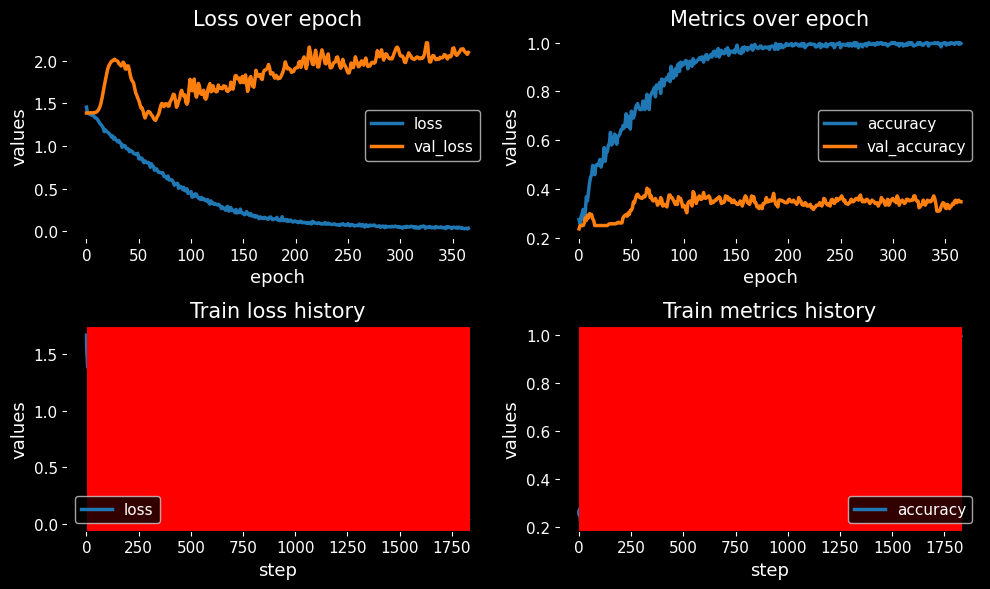


Epoch 148: val_accuracy did not improve from 0.92708

Epoch 350: val_accuracy did not improve from 0.39236

Epoch 351: val_accuracy did not improve from 0.39236

Epoch 160: val_accuracy did not improve from 0.78472
Model `atcnet_orig_norm-no_clean_ch-0_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4027777777777778, 'test_subj-BCI-IV 2a-1_accuracy': 0.4027777777777778}


 38%|███████████████████████████████                                                   | 47/124 [03:11<07:34,  5.90s/it]


Epoch 352: val_accuracy did not improve from 0.39236

Epoch 149: val_accuracy did not improve from 0.92708

Epoch 353: val_accuracy did not improve from 0.39236

Epoch 161: val_accuracy did not improve from 0.78472

Epoch 354: val_accuracy did not improve from 0.39236

Epoch 150: val_accuracy did not improve from 0.92708

Epoch 355: val_accuracy did not improve from 0.39236

Epoch 162: val_accuracy did not improve from 0.78472

Epoch 356: val_accuracy did not improve from 0.39236

Epoch 151: val_accuracy did not improve from 0.92708

Epoch 357: val_accuracy did not improve from 0.39236

Epoch 358: val_accuracy did not improve from 0.39236

Epoch 163: val_accuracy did not improve from 0.78472

Epoch 359: val_accuracy did not improve from 0.39236

Epoch 152: val_accuracy did not improve from 0.92708

Epoch 360: val_accuracy did not improve from 0.39236

Epoch 164: val_accuracy did not improve from 0.78472

Epoch 361: val_accuracy did not improve from 0.39236

Epoch 153: val_accuracy did

2024-02-16 10:28:18.133368: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 155: val_accuracy did not improve from 0.92708

Epoch 367: val_accuracy did not improve from 0.39236

Epoch 368: val_accuracy did not improve from 0.39236

Epoch 167: val_accuracy did not improve from 0.78472
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcn

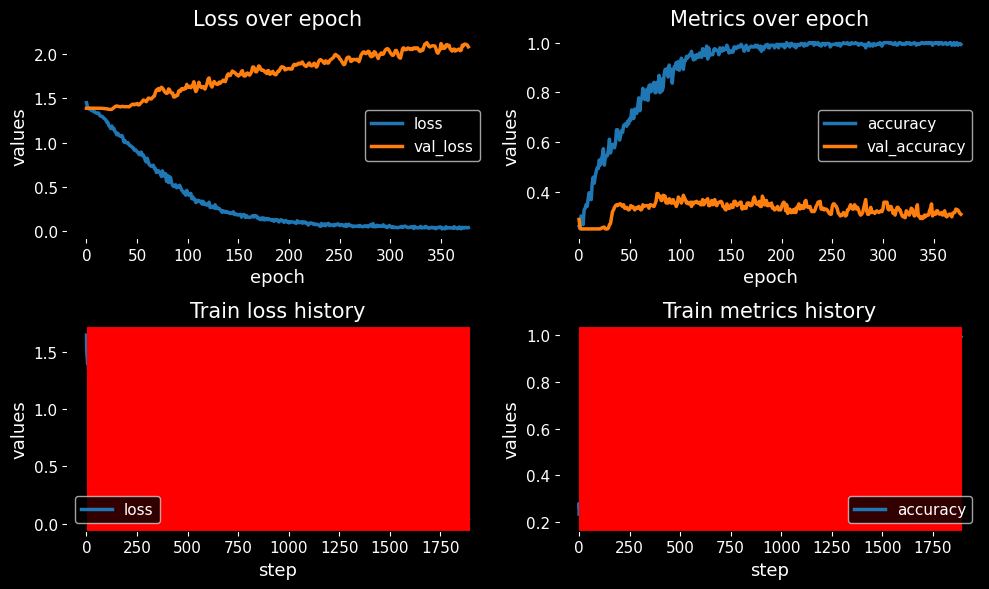


Epoch 163: val_accuracy did not improve from 0.92708

Epoch 175: val_accuracy did not improve from 0.78472

Epoch 164: val_accuracy did not improve from 0.92708
Model `atcnet_orig_norm-no_clean_ch-0_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.3923611111111111, 'test_subj-BCI-IV 2a-3_accuracy': 0.3923611111111111}


 39%|███████████████████████████████▋                                                  | 48/124 [03:25<07:53,  6.24s/it]


Epoch 176: val_accuracy did not improve from 0.78472

Epoch 165: val_accuracy did not improve from 0.92708

Epoch 177: val_accuracy did not improve from 0.78472

Epoch 166: val_accuracy did not improve from 0.92708

Epoch 178: val_accuracy did not improve from 0.78472

Epoch 167: val_accuracy did not improve from 0.92708

Epoch 179: val_accuracy did not improve from 0.78472

Epoch 168: val_accuracy did not improve from 0.92708

Epoch 180: val_accuracy did not improve from 0.78472

Epoch 169: val_accuracy did not improve from 0.92708

Epoch 181: val_accuracy did not improve from 0.78472

Epoch 170: val_accuracy did not improve from 0.92708
Loading dataset bciiv2a...


2024-02-16 10:28:32.033334: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 182: val_accuracy improved from 0.78472 to 0.79167, saving model to pretrained_models/atcnet_orig_norm-no_clean_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 171: val_accuracy did not improve from 0.92708


2024-02-16 10:28:32.692955: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_ch-1_subj-3_run-10_scenario-3', 'rate': 250, 'architecture_name': 'atcnet', 'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>, 'per_channel': True, 'detrend': True, 'remove_envi

2024-02-16 10:28:34.706290: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 185: val_accuracy did not improve from 0.79167

Epoch 174: val_accuracy did not improve from 0.92708
Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 64
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 1000
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 186: val_accuracy did not improve from 0.79167


2024-02-16 10:28:36.184021: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bfa280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:28:36.184058: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:28:36.189349: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075716.286723 2840790 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 175: val_accuracy did not improve from 0.92708

Epoch 187: val_accuracy did not improve from 0.79167

Epoch 176: val_accuracy did not improve from 0.92708

Epoch 188: val_accuracy did not improve from 0.79167

Epoch 177: val_accuracy did not improve from 0.92708

Epoch 189: val_accuracy did not improve from 0.79167

Epoch 178: val_accuracy did not improve from 0.92708

Epoch 190: val_accuracy did not improve from 0.79167

Epoch 179: val_accuracy did not improve from 0.92708

Epoch 191: val_accuracy did not improve from 0.79167

Epoch 180: val_accuracy did not improve from 0.92708

Epoch 192: val_accuracy did not improve from 0.79167

Epoch 181: val_accuracy did not improve from 0.92708

Epoch 193: val_accuracy did not improve from 0.79167

Epoch 182: val_accuracy did not improve from 0.92708

Epoch 194: val_accuracy did not improve from 0.79167

Epoch 183: val_accuracy did not improve from 0.92708

Epoch 195: val_accuracy did not improve from 0.79167

Epoch 184: val_accuracy did

2024-02-16 10:28:46.763918: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 2: val_accuracy improved from 0.26389 to 0.27778, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-1_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 198: val_accuracy did not improve from 0.79167

Saving at epoch 2 !

Epoch 187: val_accuracy did not improve from 0.92708

Epoch 3: val_accuracy did not improve from 0.27778

Saving at epoch 3 !

Epoch 199: val_accuracy did not improve from 0.79167

Epoch 188: val_accuracy did not improve from 0.92708


2024-02-16 10:28:48.727272: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 4: val_accuracy did not improve from 0.27778

Epoch 200: val_accuracy did not improve from 0.79167

Epoch 5: val_accuracy did not improve from 0.27778

Epoch 189: val_accuracy did not improve from 0.92708

Epoch 6: val_accuracy did not improve from 0.27778

Epoch 201: val_accuracy did not improve from 0.79167

Epoch 7: val_accuracy did not improve from 0.27778

Epoch 190: val_accuracy did not improve from 0.92708


2024-02-16 10:28:50.153777: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bfcec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:28:50.153805: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:28:50.158749: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075730.249026 2842660 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 8: val_accuracy did not improve from 0.27778

Epoch 9: val_accuracy did not improve from 0.27778

Epoch 202: val_accuracy did not improve from 0.79167

Epoch 10: val_accuracy did not improve from 0.27778

Epoch 191: val_accuracy did not improve from 0.92708

Epoch 11: val_accuracy did not improve from 0.27778

Epoch 12: val_accuracy did not improve from 0.27778

Epoch 203: val_accuracy did not improve from 0.79167

Epoch 192: val_accuracy did not improve from 0.92708

Epoch 13: val_accuracy did not improve from 0.27778

Epoch 14: val_accuracy did not improve from 0.27778

Epoch 204: val_accuracy did not improve from 0.79167

Epoch 15: val_accuracy did not improve from 0.27778

Epoch 193: val_accuracy did not improve from 0.92708

Epoch 16: val_accuracy did not improve from 0.27778

Epoch 205: val_accuracy did not improve from 0.79167

Epoch 17: val_accuracy did not improve from 0.27778

Epoch 194: val_accuracy did not improve from 0.92708

Epoch 18: val_accuracy did not improve 

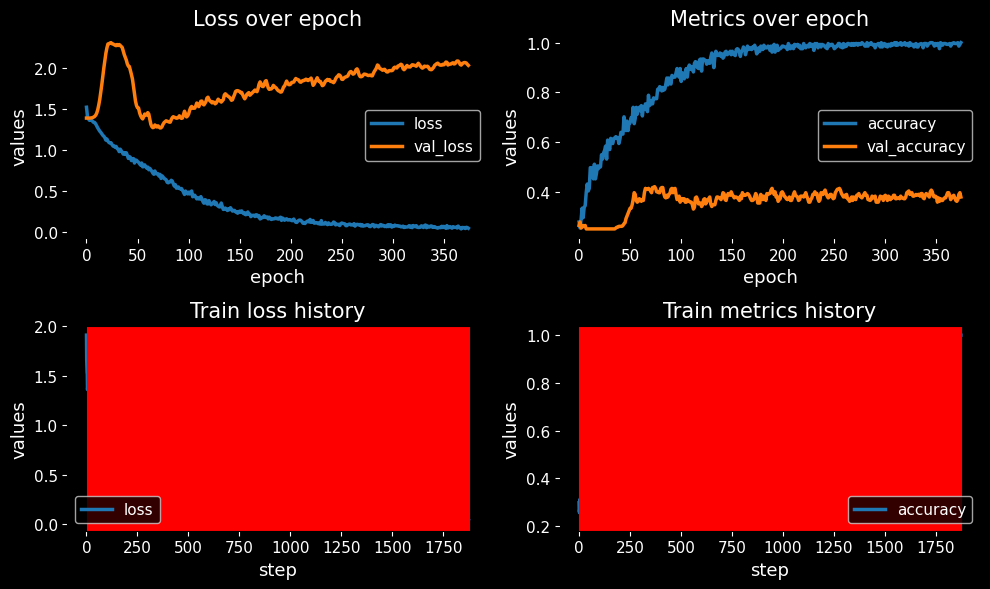


Epoch 349: val_accuracy did not improve from 0.47569

Epoch 350: val_accuracy did not improve from 0.47569

Epoch 342: val_accuracy did not improve from 0.92708

Epoch 351: val_accuracy did not improve from 0.47569

Epoch 354: val_accuracy did not improve from 0.81250
Model `atcnet_orig_norm-no_clean_ch-1_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4201388888888889, 'test_subj-BCI-IV 2a-1_accuracy': 0.4201388888888889}


 40%|████████████████████████████████▍                                                 | 49/124 [06:18<19:38, 15.72s/it]


Epoch 352: val_accuracy did not improve from 0.47569

Epoch 343: val_accuracy did not improve from 0.92708

Epoch 353: val_accuracy did not improve from 0.47569

Epoch 355: val_accuracy did not improve from 0.81250

Epoch 354: val_accuracy did not improve from 0.47569

Epoch 344: val_accuracy did not improve from 0.92708

Epoch 355: val_accuracy did not improve from 0.47569

Epoch 356: val_accuracy did not improve from 0.81250

Epoch 356: val_accuracy did not improve from 0.47569

Epoch 357: val_accuracy did not improve from 0.47569

Epoch 345: val_accuracy did not improve from 0.92708

Epoch 358: val_accuracy did not improve from 0.47569

Epoch 357: val_accuracy did not improve from 0.81250

Epoch 359: val_accuracy did not improve from 0.47569

Epoch 346: val_accuracy did not improve from 0.92708

Epoch 360: val_accuracy did not improve from 0.47569

Epoch 358: val_accuracy did not improve from 0.81250

Epoch 361: val_accuracy did not improve from 0.47569

Epoch 362: val_accuracy did

2024-02-16 10:31:25.069653: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 367: val_accuracy did not improve from 0.47569

Epoch 361: val_accuracy did not improve from 0.81250

Epoch 349: val_accuracy did not improve from 0.92708

Epoch 368: val_accuracy did not improve from 0.47569
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcn

2024-02-16 10:31:40.076875: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 406: val_accuracy did not improve from 0.47569

Epoch 407: val_accuracy did not improve from 0.47569

Epoch 365: val_accuracy did not improve from 0.92708

Epoch 408: val_accuracy did not improve from 0.47569

Epoch 377: val_accuracy did not improve from 0.81250

Epoch 409: val_accuracy did not improve from 0.47569

Epoch 410: val_accuracy did not improve from 0.47569

Epoch 366: val_accuracy did not improve from 0.92708

Epoch 378: val_accuracy did not improve from 0.81250

Epoch 411: val_accuracy did not improve from 0.47569


2024-02-16 10:31:42.130033: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 412: val_accuracy did not improve from 0.47569

Epoch 367: val_accuracy did not improve from 0.92708

Epoch 379: val_accuracy did not improve from 0.81250

Epoch 413: val_accuracy did not improve from 0.47569

Epoch 414: val_accuracy did not improve from 0.47569

Epoch 415: val_accuracy did not improve from 0.47569


2024-02-16 10:31:43.769240: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f377dbfb330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:31:43.769273: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:31:43.774694: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075903.875936 2891075 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 368: val_accuracy did not improve from 0.92708

Epoch 380: val_accuracy did not improve from 0.81250

Epoch 416: val_accuracy did not improve from 0.47569

Epoch 417: val_accuracy did not improve from 0.47569

Epoch 369: val_accuracy did not improve from 0.92708

Epoch 381: val_accuracy did not improve from 0.81250

Epoch 418: val_accuracy did not improve from 0.47569

Epoch 419: val_accuracy did not improve from 0.47569

Epoch 420: val_accuracy did not improve from 0.47569

Epoch 370: val_accuracy did not improve from 0.92708

Epoch 382: val_accuracy did not improve from 0.81250

Epoch 421: val_accuracy did not improve from 0.47569

Epoch 422: val_accuracy did not improve from 0.47569
Epoch 421 : Early stopping !
Epoch 422: early stopping
Training finished after 3min 10sec !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-1_subj-3_run-10_scenario-3/saving/model.json !

Epoch 371: val_accuracy did not improve from 0.92708

Epoch 383: val_accuracy did not i

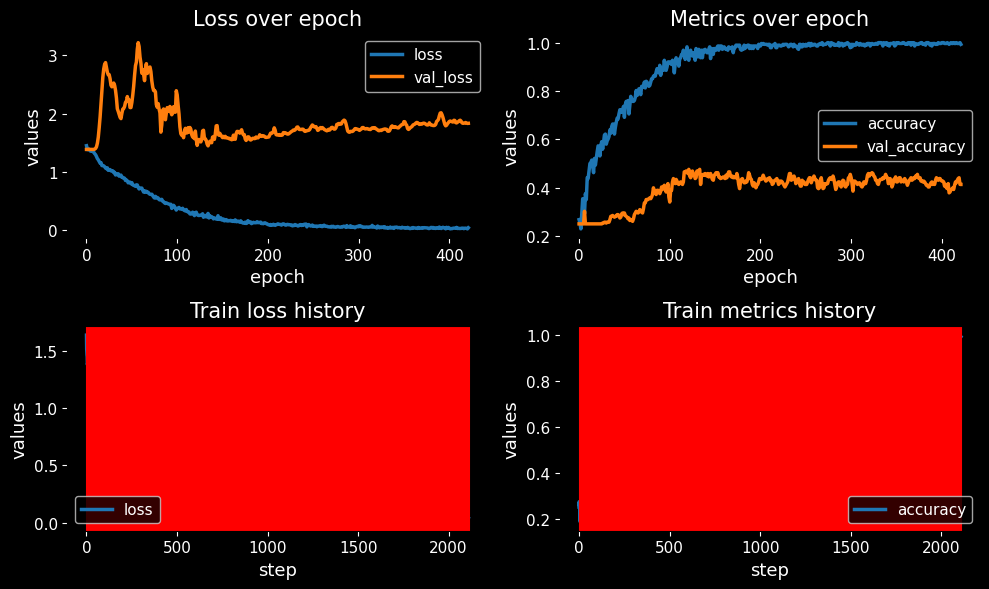


Epoch 375: val_accuracy did not improve from 0.92708

Epoch 387: val_accuracy did not improve from 0.81250
Model `atcnet_orig_norm-no_clean_ch-1_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4756944444444444, 'test_subj-BCI-IV 2a-3_accuracy': 0.4756944444444444}


 40%|█████████████████████████████████                                                 | 50/124 [06:49<20:50, 16.90s/it]


Epoch 376: val_accuracy did not improve from 0.92708

Epoch 388: val_accuracy did not improve from 0.81250

Epoch 377: val_accuracy did not improve from 0.92708

Epoch 389: val_accuracy did not improve from 0.81250

Epoch 378: val_accuracy did not improve from 0.92708

Epoch 390: val_accuracy did not improve from 0.81250

Epoch 379: val_accuracy did not improve from 0.92708

Epoch 1: val_accuracy improved from -inf to 0.29514, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 391: val_accuracy did not improve from 0.81250

Saving at epoch 1 !

Epoch 2: val_accuracy did not improve from 0.29514

Epoch 380: val_accuracy did not improve from 0.92708

Epoch 392: val_accuracy did not improve from 0.81250

Epoch 3: val_accuracy did not improve from 0.29514

Epoch 4: val_accuracy did not improve from 0.29514

Epoch 381: val_accuracy did not improve from 0.92708

Epoch 393: val_accuracy did not improve from 0.81250

Epoc

2024-02-16 10:31:56.479848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 7: val_accuracy did not improve from 0.29514

Epoch 382: val_accuracy did not improve from 0.92708

Epoch 394: val_accuracy did not improve from 0.81250

Epoch 8: val_accuracy did not improve from 0.29514
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_o

2024-02-16 10:32:11.354382: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 46: val_accuracy did not improve from 0.29514

Epoch 398: val_accuracy did not improve from 0.92708

Epoch 410: val_accuracy did not improve from 0.81250

Epoch 47: val_accuracy did not improve from 0.29514

Epoch 48: val_accuracy did not improve from 0.29514

Epoch 399: val_accuracy did not improve from 0.92708

Epoch 49: val_accuracy did not improve from 0.29514

Epoch 411: val_accuracy did not improve from 0.81250

Epoch 50: val_accuracy did not improve from 0.29514

Epoch 51: val_accuracy did not improve from 0.29514


2024-02-16 10:32:13.372549: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 400: val_accuracy did not improve from 0.92708

Epoch 412: val_accuracy did not improve from 0.81250

Epoch 52: val_accuracy did not improve from 0.29514

Epoch 53: val_accuracy improved from 0.29514 to 0.29861, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 401: val_accuracy did not improve from 0.92708

Epoch 413: val_accuracy did not improve from 0.81250

Epoch 54: val_accuracy improved from 0.29861 to 0.30556, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-1_run-10_scenario-3/saving/best_weights.keras


2024-02-16 10:32:14.880942: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc04690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:32:14.880977: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:32:14.886070: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708075934.979263 2898933 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 55: val_accuracy improved from 0.30556 to 0.31250, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 402: val_accuracy did not improve from 0.92708

Epoch 414: val_accuracy did not improve from 0.81250

Epoch 56: val_accuracy did not improve from 0.31250

Epoch 57: val_accuracy did not improve from 0.31250

Epoch 403: val_accuracy did not improve from 0.92708

Epoch 58: val_accuracy did not improve from 0.31250

Epoch 415: val_accuracy did not improve from 0.81250

Epoch 59: val_accuracy did not improve from 0.31250

Epoch 60: val_accuracy did not improve from 0.31250

Epoch 404: val_accuracy did not improve from 0.92708

Epoch 416: val_accuracy did not improve from 0.81250

Epoch 61: val_accuracy did not improve from 0.31250

Epoch 62: val_accuracy did not improve from 0.31250

Epoch 405: val_accuracy did not improve from 0.92708

Epoch 63: val_accuracy did not improve from 0.31250

Epoch 417: val_accuracy

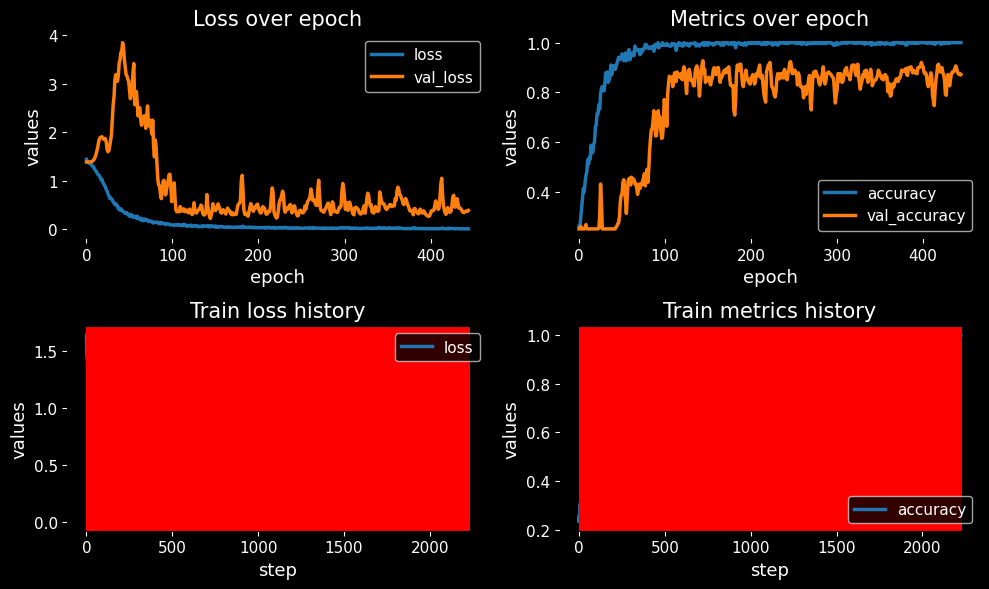


Epoch 89: val_accuracy did not improve from 0.34028

Epoch 169: val_accuracy did not improve from 0.43056

Epoch 461: val_accuracy did not improve from 0.81250

Epoch 90: val_accuracy did not improve from 0.34028

Epoch 170: val_accuracy did not improve from 0.43056

Epoch 91: val_accuracy did not improve from 0.34028

Epoch 171: val_accuracy did not improve from 0.43056

Epoch 462: val_accuracy did not improve from 0.81250

Epoch 92: val_accuracy did not improve from 0.34028

Epoch 172: val_accuracy did not improve from 0.43056

Epoch 93: val_accuracy did not improve from 0.34028

Epoch 173: val_accuracy did not improve from 0.43056
Model `atcnet_orig_norm-no_clean_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.9270833333333334, 'test_subj-BCI-IV 2a-3_accuracy': 0.9270833333333334}


 41%|█████████████████████████████████▋                                                | 51/124 [08:01<27:00, 22.20s/it]


Epoch 94: val_accuracy did not improve from 0.34028

Epoch 174: val_accuracy did not improve from 0.43056

Epoch 463: val_accuracy did not improve from 0.81250

Epoch 95: val_accuracy did not improve from 0.34028

Epoch 175: val_accuracy did not improve from 0.43056

Epoch 96: val_accuracy did not improve from 0.34028

Epoch 176: val_accuracy did not improve from 0.43056

Epoch 464: val_accuracy did not improve from 0.81250

Epoch 97: val_accuracy did not improve from 0.34028

Epoch 177: val_accuracy did not improve from 0.43056

Epoch 98: val_accuracy improved from 0.34028 to 0.34722, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 178: val_accuracy did not improve from 0.43056

Epoch 179: val_accuracy did not improve from 0.43056

Epoch 99: val_accuracy improved from 0.34722 to 0.36111, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 4

2024-02-16 10:33:08.092315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 189: val_accuracy did not improve from 0.43056

Epoch 469: val_accuracy did not improve from 0.81250

Epoch 108: val_accuracy did not improve from 0.42708

Epoch 190: val_accuracy did not improve from 0.43056

Epoch 109: val_accuracy did not improve from 0.42708

Epoch 191: val_accuracy did not improve from 0.43056
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s

2024-02-16 10:33:22.645774: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 145: val_accuracy did not improve from 0.47222

Epoch 485: val_accuracy did not improve from 0.81250

Epoch 229: val_accuracy did not improve from 0.43056

Epoch 146: val_accuracy did not improve from 0.47222

Epoch 230: val_accuracy did not improve from 0.43056

Epoch 147: val_accuracy improved from 0.47222 to 0.47569, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 231: val_accuracy did not improve from 0.43056

Epoch 486: val_accuracy did not improve from 0.81250

Epoch 148: val_accuracy did not improve from 0.47569

Epoch 232: val_accuracy did not improve from 0.43056

Epoch 149: val_accuracy did not improve from 0.47569

Epoch 233: val_accuracy did not improve from 0.43056


2024-02-16 10:33:24.581964: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 150: val_accuracy did not improve from 0.47569

Epoch 487: val_accuracy did not improve from 0.81250

Epoch 234: val_accuracy did not improve from 0.43056

Epoch 151: val_accuracy did not improve from 0.47569

Epoch 235: val_accuracy did not improve from 0.43056

Epoch 152: val_accuracy did not improve from 0.47569

Epoch 236: val_accuracy did not improve from 0.43056

Epoch 488: val_accuracy did not improve from 0.81250

Epoch 153: val_accuracy did not improve from 0.47569

Epoch 237: val_accuracy did not improve from 0.43056


2024-02-16 10:33:26.022089: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c0cf80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:33:26.022113: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:33:26.027467: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076006.120860 2918487 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 154: val_accuracy did not improve from 0.47569

Epoch 238: val_accuracy did not improve from 0.43056

Epoch 155: val_accuracy did not improve from 0.47569

Epoch 239: val_accuracy did not improve from 0.43056

Epoch 489: val_accuracy did not improve from 0.81250

Epoch 156: val_accuracy did not improve from 0.47569

Epoch 240: val_accuracy did not improve from 0.43056

Epoch 157: val_accuracy did not improve from 0.47569

Epoch 241: val_accuracy did not improve from 0.43056

Epoch 490: val_accuracy did not improve from 0.81250

Epoch 158: val_accuracy did not improve from 0.47569

Epoch 242: val_accuracy did not improve from 0.43056

Epoch 159: val_accuracy improved from 0.47569 to 0.48264, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-2_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 243: val_accuracy did not improve from 0.43056

Epoch 244: val_accuracy did not improve from 0.43056

Epoch 491: val_accuracy did not improve from 0.81250

Epoch 160: val

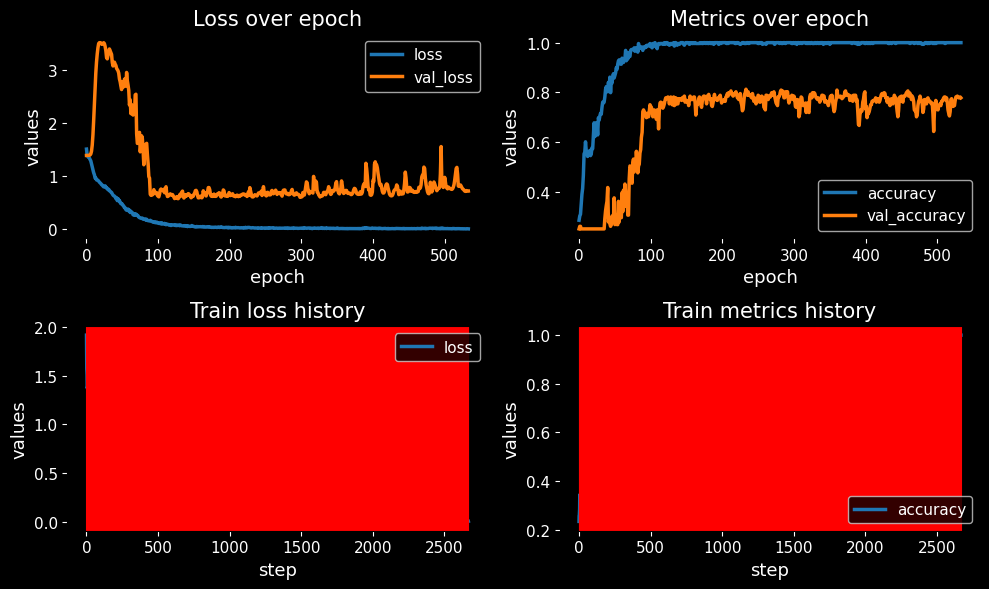


Epoch 86: val_accuracy did not improve from 0.42014

Epoch 280: val_accuracy did not improve from 0.48264

Epoch 365: val_accuracy did not improve from 0.43056

Epoch 87: val_accuracy did not improve from 0.42014

Epoch 281: val_accuracy did not improve from 0.48264

Epoch 366: val_accuracy did not improve from 0.43056

Epoch 88: val_accuracy did not improve from 0.42014

Epoch 282: val_accuracy did not improve from 0.48264

Epoch 367: val_accuracy did not improve from 0.43056

Epoch 89: val_accuracy did not improve from 0.42014

Epoch 283: val_accuracy did not improve from 0.48264

Epoch 368: val_accuracy did not improve from 0.43056

Epoch 90: val_accuracy did not improve from 0.42014

Epoch 284: val_accuracy did not improve from 0.48264
Model `atcnet_orig_norm-no_clean_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.8125, 'test_subj-BCI-IV 2a-1_accuracy': 0.8125}


 42%|██████████████████████████████████▍                                               | 52/124 [09:13<33:54, 28.26s/it]


Epoch 369: val_accuracy did not improve from 0.43056

Epoch 91: val_accuracy did not improve from 0.42014

Epoch 285: val_accuracy did not improve from 0.48264

Epoch 370: val_accuracy did not improve from 0.43056

Epoch 92: val_accuracy did not improve from 0.42014

Epoch 286: val_accuracy did not improve from 0.48264

Epoch 371: val_accuracy did not improve from 0.43056

Epoch 93: val_accuracy did not improve from 0.42014

Epoch 287: val_accuracy did not improve from 0.48264

Epoch 372: val_accuracy did not improve from 0.43056

Epoch 94: val_accuracy did not improve from 0.42014

Epoch 288: val_accuracy did not improve from 0.48264

Epoch 373: val_accuracy did not improve from 0.43056

Epoch 95: val_accuracy did not improve from 0.42014

Epoch 289: val_accuracy did not improve from 0.48264

Epoch 374: val_accuracy did not improve from 0.43056

Epoch 96: val_accuracy did not improve from 0.42014

Epoch 290: val_accuracy did not improve from 0.48264

Epoch 375: val_accuracy did not i

2024-02-16 10:34:20.111649: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 106: val_accuracy did not improve from 0.42014

Epoch 300: val_accuracy did not improve from 0.48264

Epoch 385: val_accuracy did not improve from 0.43056

Epoch 107: val_accuracy did not improve from 0.42014

Epoch 301: val_accuracy did not improve from 0.48264

Epoch 386: val_accuracy did not improve from 0.43056

Epoch 108: val_accuracy did not improve from 0.42014

Epoch 302: val_accuracy did not improve from 0.48264
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions

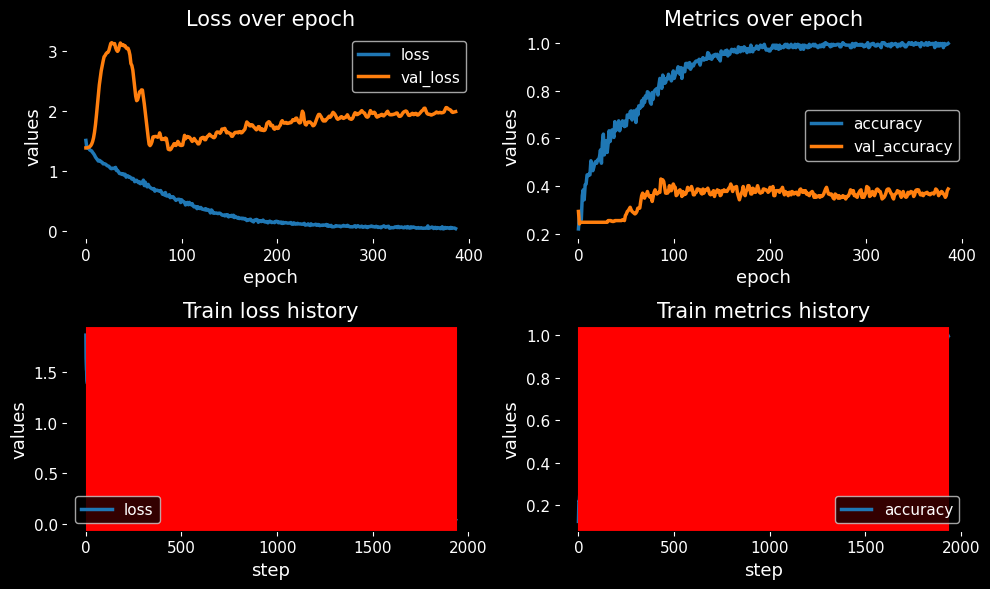


Epoch 313: val_accuracy did not improve from 0.48264

Epoch 119: val_accuracy did not improve from 0.42014

Epoch 314: val_accuracy did not improve from 0.48264

Epoch 120: val_accuracy did not improve from 0.42014
Model `atcnet_orig_norm-no_clean_ch-2_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4305555555555556, 'test_subj-BCI-IV 2a-1_accuracy': 0.4305555555555556}


 43%|███████████████████████████████████                                               | 53/124 [09:23<30:19, 25.63s/it]


Epoch 315: val_accuracy did not improve from 0.48264

Epoch 121: val_accuracy did not improve from 0.42014

Epoch 316: val_accuracy did not improve from 0.48264

Epoch 122: val_accuracy did not improve from 0.42014

Epoch 317: val_accuracy did not improve from 0.48264

Epoch 123: val_accuracy did not improve from 0.42014

Epoch 318: val_accuracy did not improve from 0.48264

Epoch 124: val_accuracy did not improve from 0.42014

Epoch 319: val_accuracy did not improve from 0.48264

Epoch 125: val_accuracy did not improve from 0.42014

Epoch 320: val_accuracy did not improve from 0.48264

Epoch 126: val_accuracy did not improve from 0.42014

Epoch 127: val_accuracy did not improve from 0.42014

Epoch 321: val_accuracy did not improve from 0.48264

Epoch 128: val_accuracy did not improve from 0.42014

Epoch 322: val_accuracy did not improve from 0.48264

Epoch 129: val_accuracy did not improve from 0.42014

Epoch 323: val_accuracy did not improve from 0.48264

Epoch 324: val_accuracy did

2024-02-16 10:34:30.605668: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 138: val_accuracy did not improve from 0.42014

Epoch 332: val_accuracy did not improve from 0.48264

Epoch 139: val_accuracy did not improve from 0.42014

Epoch 333: val_accuracy did not improve from 0.48264
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcn

2024-02-16 10:34:33.688642: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 341: val_accuracy did not improve from 0.48264

Epoch 147: val_accuracy did not improve from 0.42014

Epoch 342: val_accuracy did not improve from 0.48264

Epoch 148: val_accuracy did not improve from 0.42014
Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 64
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 1000
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 343: val_accuracy did not improve from 0.48264

Epoch 149: val_accuracy did not improve from 0.42014

Epoch 344: val_accuracy did not improve from 0.48264

Epoch 150: val_accuracy did not improve from 0.42014

Epoch 345: val_accuracy did not improve from 0.48264

Epoch 151: val_accuracy did not improve from 0.42014


2024-02-16 10:34:35.518758: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 346: val_accuracy did not improve from 0.48264

Epoch 152: val_accuracy did not improve from 0.42014

Epoch 153: val_accuracy did not improve from 0.42014

Epoch 347: val_accuracy did not improve from 0.48264

Epoch 348: val_accuracy did not improve from 0.48264

Epoch 154: val_accuracy did not improve from 0.42014

Epoch 349: val_accuracy did not improve from 0.48264

Epoch 155: val_accuracy did not improve from 0.42014


2024-02-16 10:34:36.842187: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bf1f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:34:36.842219: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:34:36.847157: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076076.937788 2943191 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 350: val_accuracy did not improve from 0.48264

Epoch 156: val_accuracy did not improve from 0.42014

Epoch 351: val_accuracy did not improve from 0.48264

Epoch 157: val_accuracy did not improve from 0.42014

Epoch 352: val_accuracy did not improve from 0.48264

Epoch 158: val_accuracy did not improve from 0.42014

Epoch 353: val_accuracy did not improve from 0.48264

Epoch 159: val_accuracy did not improve from 0.42014

Epoch 354: val_accuracy did not improve from 0.48264

Epoch 160: val_accuracy did not improve from 0.42014

Epoch 355: val_accuracy did not improve from 0.48264

Epoch 161: val_accuracy did not improve from 0.42014

Epoch 356: val_accuracy did not improve from 0.48264

Epoch 162: val_accuracy did not improve from 0.42014

Epoch 357: val_accuracy did not improve from 0.48264

Epoch 163: val_accuracy did not improve from 0.42014

Epoch 358: val_accuracy did not improve from 0.48264

Epoch 164: val_accuracy did not improve from 0.42014

Epoch 359: val_accuracy did

2024-02-16 10:34:44.444395: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 177: val_accuracy did not improve from 0.42014

Epoch 372: val_accuracy did not improve from 0.48264

Epoch 178: val_accuracy did not improve from 0.42014

Epoch 373: val_accuracy did not improve from 0.48264

Epoch 179: val_accuracy did not improve from 0.42014

Epoch 374: val_accuracy did not improve from 0.48264

Epoch 180: val_accuracy did not improve from 0.42014

Epoch 375: val_accuracy did not improve from 0.48264

Epoch 181: val_accuracy did not improve from 0.42014

Epoch 376: val_accuracy did not improve from 0.48264


2024-02-16 10:34:46.271044: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 182: val_accuracy did not improve from 0.42014

Epoch 1: val_accuracy improved from -inf to 0.27083, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-3_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 377: val_accuracy did not improve from 0.48264

Epoch 183: val_accuracy did not improve from 0.42014

Epoch 378: val_accuracy did not improve from 0.48264

Epoch 184: val_accuracy did not improve from 0.42014

Epoch 2: val_accuracy did not improve from 0.27083

Saving at epoch 2 !

Epoch 379: val_accuracy did not improve from 0.48264

Epoch 185: val_accuracy did not improve from 0.42014

Epoch 380: val_accuracy did not improve from 0.48264


2024-02-16 10:34:47.703131: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc08a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:34:47.703158: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:34:47.707883: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076087.803375 2945938 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 186: val_accuracy did not improve from 0.42014

Epoch 3: val_accuracy did not improve from 0.27083

Saving at epoch 3 !

Epoch 381: val_accuracy did not improve from 0.48264

Epoch 187: val_accuracy did not improve from 0.42014

Epoch 382: val_accuracy did not improve from 0.48264

Epoch 4: val_accuracy did not improve from 0.27083

Saving at epoch 4 !

Epoch 188: val_accuracy did not improve from 0.42014

Epoch 383: val_accuracy did not improve from 0.48264

Epoch 189: val_accuracy did not improve from 0.42014

Epoch 384: val_accuracy did not improve from 0.48264

Epoch 5: val_accuracy did not improve from 0.27083

Saving at epoch 5 !

Epoch 190: val_accuracy did not improve from 0.42014

Epoch 385: val_accuracy did not improve from 0.48264

Epoch 191: val_accuracy did not improve from 0.42014

Epoch 6: val_accuracy did not improve from 0.27083

Epoch 386: val_accuracy did not improve from 0.48264

Epoch 192: val_accuracy did not improve from 0.42014

Epoch 7: val_accuracy did 

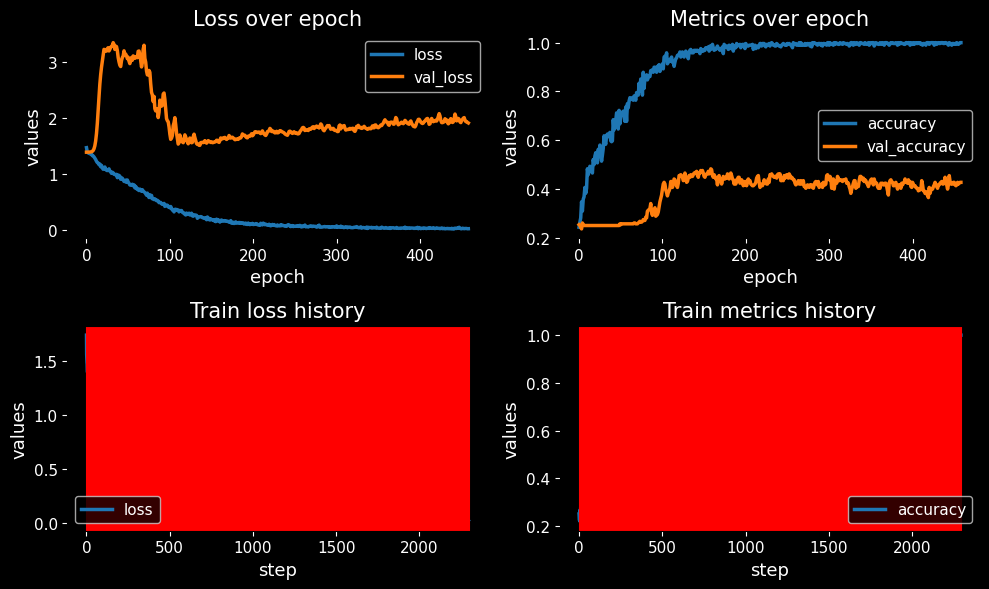


Epoch 88: val_accuracy did not improve from 0.34028

Epoch 276: val_accuracy did not improve from 0.42361

Epoch 53: val_accuracy did not improve from 0.34028

Epoch 89: val_accuracy improved from 0.34028 to 0.36458, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-3_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 277: val_accuracy did not improve from 0.42361

Epoch 54: val_accuracy did not improve from 0.34028

Epoch 90: val_accuracy improved from 0.36458 to 0.38194, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-3_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 55: val_accuracy did not improve from 0.34028

Epoch 278: val_accuracy did not improve from 0.42361
Model `atcnet_orig_norm-no_clean_ch-2_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4826388888888889, 'test_subj-BCI-IV 2a-3_accuracy': 0.4826388888888889}


 44%|███████████████████████████████████▋                                              | 54/124 [10:19<36:00, 30.86s/it]


Epoch 56: val_accuracy did not improve from 0.34028

Epoch 279: val_accuracy did not improve from 0.42361

Epoch 91: val_accuracy improved from 0.38194 to 0.38542, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-3_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 57: val_accuracy did not improve from 0.34028

Epoch 280: val_accuracy did not improve from 0.42361

Epoch 92: val_accuracy did not improve from 0.38542

Epoch 58: val_accuracy did not improve from 0.34028

Epoch 281: val_accuracy did not improve from 0.42361

Epoch 93: val_accuracy did not improve from 0.38542

Epoch 59: val_accuracy did not improve from 0.34028

Epoch 282: val_accuracy did not improve from 0.42361

Epoch 94: val_accuracy did not improve from 0.38542

Epoch 60: val_accuracy improved from 0.34028 to 0.34722, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-4_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 283: val_accuracy did not improve from 0.42361

Epoch 95: 

2024-02-16 10:35:26.224388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 294: val_accuracy did not improve from 0.42361

Epoch 66: val_accuracy did not improve from 0.39236

Saving at epoch 66 !

Epoch 105: val_accuracy did not improve from 0.39931

Epoch 295: val_accuracy did not improve from 0.42361

Epoch 106: val_accuracy did not improve from 0.39931

Epoch 296: val_accuracy did not improve from 0.42361

Epoch 67: val_accuracy did not improve from 0.39236

Saving at epoch 67 !

Epoch 107: val_accuracy did not improve from 0.39931
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # s

2024-02-16 10:35:40.082240: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 104: val_accuracy did not improve from 0.39236

Epoch 144: val_accuracy did not improve from 0.41319

Epoch 334: val_accuracy did not improve from 0.42361

Epoch 105: val_accuracy did not improve from 0.39236

Epoch 335: val_accuracy did not improve from 0.42361

Epoch 145: val_accuracy did not improve from 0.41319

Epoch 106: val_accuracy did not improve from 0.39236

Epoch 336: val_accuracy did not improve from 0.42361

Epoch 146: val_accuracy did not improve from 0.41319

Epoch 337: val_accuracy did not improve from 0.42361

Epoch 147: val_accuracy did not improve from 0.41319

Epoch 107: val_accuracy did not improve from 0.39236

Epoch 148: val_accuracy did not improve from 0.41319

Epoch 108: val_accuracy did not improve from 0.39236

Epoch 338: val_accuracy did not improve from 0.42361


2024-02-16 10:35:41.901741: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 149: val_accuracy did not improve from 0.41319

Epoch 339: val_accuracy did not improve from 0.42361

Epoch 109: val_accuracy did not improve from 0.39236

Epoch 340: val_accuracy did not improve from 0.42361

Epoch 150: val_accuracy did not improve from 0.41319

Epoch 110: val_accuracy did not improve from 0.39236

Epoch 151: val_accuracy did not improve from 0.41319

Epoch 341: val_accuracy did not improve from 0.42361

Epoch 111: val_accuracy did not improve from 0.39236

Epoch 152: val_accuracy did not improve from 0.41319

Epoch 342: val_accuracy did not improve from 0.42361

Epoch 112: val_accuracy did not improve from 0.39236


2024-02-16 10:35:43.253851: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c04220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:35:43.253886: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:35:43.259206: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076143.351944 2969300 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 343: val_accuracy did not improve from 0.42361

Epoch 153: val_accuracy did not improve from 0.41319

Epoch 113: val_accuracy did not improve from 0.39236

Epoch 344: val_accuracy did not improve from 0.42361

Epoch 154: val_accuracy did not improve from 0.41319

Epoch 114: val_accuracy did not improve from 0.39236

Epoch 345: val_accuracy did not improve from 0.42361

Epoch 155: val_accuracy did not improve from 0.41319

Epoch 115: val_accuracy did not improve from 0.39236

Epoch 346: val_accuracy did not improve from 0.42361

Epoch 156: val_accuracy did not improve from 0.41319

Epoch 116: val_accuracy did not improve from 0.39236

Epoch 347: val_accuracy did not improve from 0.42361

Epoch 157: val_accuracy did not improve from 0.41319

Epoch 117: val_accuracy did not improve from 0.39236

Epoch 348: val_accuracy did not improve from 0.42361

Epoch 158: val_accuracy did not improve from 0.41319

Epoch 118: val_accuracy did not improve from 0.39236

Epoch 349: val_accuracy did

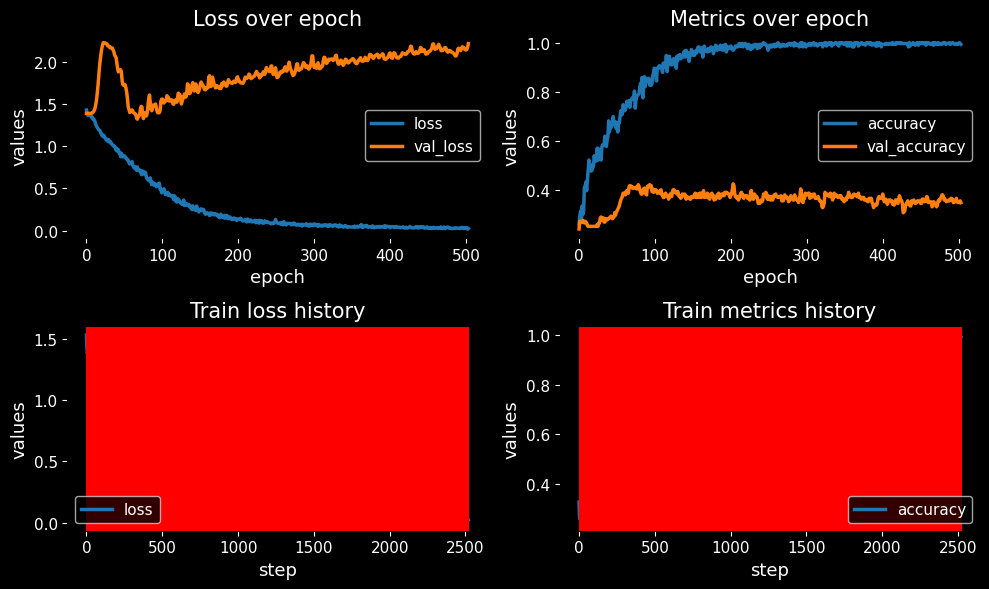


Epoch 285: val_accuracy did not improve from 0.39236

Epoch 131: val_accuracy did not improve from 0.37153

Epoch 326: val_accuracy did not improve from 0.41667

Epoch 286: val_accuracy did not improve from 0.39236

Epoch 132: val_accuracy did not improve from 0.37153

Epoch 327: val_accuracy did not improve from 0.41667

Epoch 287: val_accuracy did not improve from 0.39236

Epoch 133: val_accuracy did not improve from 0.37153

Epoch 328: val_accuracy did not improve from 0.41667
Model `atcnet_orig_norm-no_clean_ch-3_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4236111111111111, 'test_subj-BCI-IV 2a-1_accuracy': 0.4236111111111111}


 44%|████████████████████████████████████▎                                             | 55/124 [11:45<48:06, 41.83s/it]


Epoch 288: val_accuracy did not improve from 0.39236

Epoch 134: val_accuracy did not improve from 0.37153

Epoch 329: val_accuracy did not improve from 0.41667

Epoch 289: val_accuracy did not improve from 0.39236

Epoch 135: val_accuracy did not improve from 0.37153

Epoch 330: val_accuracy did not improve from 0.41667

Epoch 290: val_accuracy did not improve from 0.39236

Epoch 136: val_accuracy did not improve from 0.37153

Epoch 331: val_accuracy did not improve from 0.41667

Epoch 291: val_accuracy did not improve from 0.39236

Epoch 137: val_accuracy did not improve from 0.37153

Epoch 332: val_accuracy did not improve from 0.41667

Epoch 292: val_accuracy did not improve from 0.39236

Epoch 138: val_accuracy did not improve from 0.37153

Epoch 333: val_accuracy did not improve from 0.41667

Epoch 293: val_accuracy did not improve from 0.39236

Epoch 139: val_accuracy did not improve from 0.37153

Epoch 334: val_accuracy did not improve from 0.41667

Epoch 294: val_accuracy did

2024-02-16 10:36:52.024503: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 344: val_accuracy did not improve from 0.41667

Epoch 304: val_accuracy did not improve from 0.39236

Epoch 150: val_accuracy did not improve from 0.37153

Epoch 345: val_accuracy did not improve from 0.41667

Epoch 305: val_accuracy did not improve from 0.39236

Epoch 151: val_accuracy did not improve from 0.37153

Epoch 346: val_accuracy did not improve from 0.41667

Epoch 306: val_accuracy did not improve from 0.39236
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Epoch 152: val_accuracy did not improve from 0.37153

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid

2024-02-16 10:37:05.887861: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 189: val_accuracy did not improve from 0.37153

Epoch 383: val_accuracy did not improve from 0.42361

Epoch 343: val_accuracy did not improve from 0.39236

Epoch 190: val_accuracy did not improve from 0.37153

Epoch 384: val_accuracy did not improve from 0.42361

Epoch 344: val_accuracy did not improve from 0.39236

Epoch 191: val_accuracy did not improve from 0.37153

Epoch 385: val_accuracy did not improve from 0.42361

Epoch 345: val_accuracy did not improve from 0.39236

Epoch 192: val_accuracy did not improve from 0.37153

Epoch 386: val_accuracy did not improve from 0.42361

Epoch 346: val_accuracy did not improve from 0.39236

Epoch 193: val_accuracy did not improve from 0.37153

Epoch 387: val_accuracy did not improve from 0.42361

Epoch 347: val_accuracy did not improve from 0.39236

Epoch 194: val_accuracy did not improve from 0.37153

Epoch 388: val_accuracy did not improve from 0.42361


2024-02-16 10:37:07.813343: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 348: val_accuracy did not improve from 0.39236

Epoch 195: val_accuracy did not improve from 0.37153

Epoch 389: val_accuracy did not improve from 0.42361

Epoch 349: val_accuracy did not improve from 0.39236

Epoch 196: val_accuracy did not improve from 0.37153

Epoch 390: val_accuracy did not improve from 0.42361

Epoch 350: val_accuracy did not improve from 0.39236

Epoch 197: val_accuracy did not improve from 0.37153

Epoch 391: val_accuracy did not improve from 0.42361

Epoch 351: val_accuracy did not improve from 0.39236

Epoch 198: val_accuracy did not improve from 0.37153

Epoch 392: val_accuracy did not improve from 0.42361


2024-02-16 10:37:09.269683: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c03670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:37:09.269708: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:37:09.274757: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076229.369142 3004852 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 352: val_accuracy did not improve from 0.39236

Epoch 199: val_accuracy did not improve from 0.37153

Epoch 393: val_accuracy did not improve from 0.42361

Epoch 353: val_accuracy did not improve from 0.39236

Epoch 200: val_accuracy did not improve from 0.37153

Epoch 394: val_accuracy did not improve from 0.42361

Epoch 354: val_accuracy did not improve from 0.39236

Epoch 201: val_accuracy did not improve from 0.37153

Epoch 395: val_accuracy did not improve from 0.42361

Epoch 355: val_accuracy did not improve from 0.39236

Epoch 202: val_accuracy did not improve from 0.37153

Epoch 396: val_accuracy did not improve from 0.42361

Epoch 356: val_accuracy did not improve from 0.39236

Epoch 203: val_accuracy did not improve from 0.37153

Epoch 397: val_accuracy did not improve from 0.42361

Epoch 357: val_accuracy did not improve from 0.39236

Epoch 204: val_accuracy did not improve from 0.37153

Epoch 398: val_accuracy did not improve from 0.42361

Epoch 358: val_accuracy did

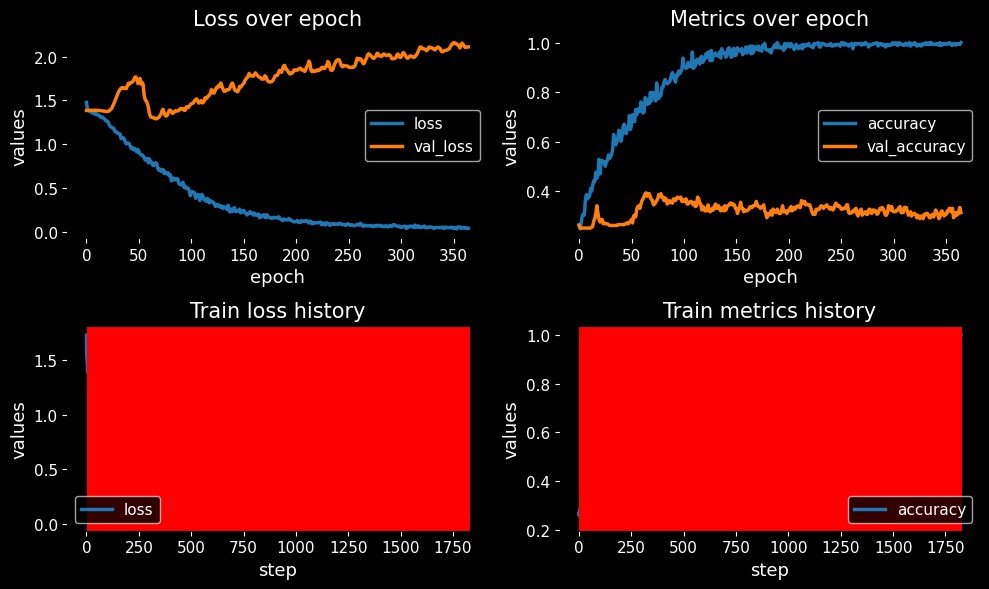


Epoch 220: val_accuracy did not improve from 0.37153

Epoch 414: val_accuracy did not improve from 0.42361

Epoch 221: val_accuracy did not improve from 0.37153

Epoch 415: val_accuracy did not improve from 0.42361

Epoch 222: val_accuracy did not improve from 0.37153

Epoch 416: val_accuracy did not improve from 0.42361
Model `atcnet_orig_norm-no_clean_ch-4_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.3923611111111111, 'test_subj-BCI-IV 2a-1_accuracy': 0.3923611111111111}


 45%|█████████████████████████████████████                                             | 56/124 [12:16<44:46, 39.51s/it]


Epoch 223: val_accuracy did not improve from 0.37153

Epoch 417: val_accuracy did not improve from 0.42361

Epoch 224: val_accuracy did not improve from 0.37153

Epoch 418: val_accuracy did not improve from 0.42361

Epoch 225: val_accuracy did not improve from 0.37153

Epoch 419: val_accuracy did not improve from 0.42361

Epoch 1: val_accuracy improved from -inf to 0.23958, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-5_subj-1_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 226: val_accuracy did not improve from 0.37153

Epoch 420: val_accuracy did not improve from 0.42361

Epoch 227: val_accuracy did not improve from 0.37153

Epoch 421: val_accuracy did not improve from 0.42361

Epoch 2: val_accuracy improved from 0.23958 to 0.24653, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-5_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 228: val_accuracy did not improve from 0.37153

Epoch 422: val_accuracy did not improve f

2024-02-16 10:37:23.383242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 12: val_accuracy did not improve from 0.25347

Epoch 432: val_accuracy did not improve from 0.42361

Epoch 239: val_accuracy did not improve from 0.37153

Epoch 13: val_accuracy did not improve from 0.25347

Epoch 433: val_accuracy did not improve from 0.42361

Epoch 240: val_accuracy did not improve from 0.37153

Epoch 14: val_accuracy did not improve from 0.25347

Epoch 434: val_accuracy did not improve from 0.42361
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :


2024-02-16 10:37:37.191554: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 41: val_accuracy improved from 0.33681 to 0.34722, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-5_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 278: val_accuracy did not improve from 0.37153

Saving at epoch 41 !

Epoch 472: val_accuracy did not improve from 0.42361

Epoch 279: val_accuracy did not improve from 0.37153

Epoch 473: val_accuracy did not improve from 0.42361

Epoch 42: val_accuracy improved from 0.34722 to 0.37847, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-5_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 280: val_accuracy did not improve from 0.37153

Epoch 474: val_accuracy did not improve from 0.42361

Epoch 281: val_accuracy did not improve from 0.37153

Epoch 475: val_accuracy did not improve from 0.42361

Epoch 43: val_accuracy did not improve from 0.37847

Epoch 282: val_accuracy did not improve from 0.37153

Epoch 476: val_accuracy did not improve from 0.42361

Epoch 44: val_accuracy did not impro

2024-02-16 10:37:39.045553: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 477: val_accuracy did not improve from 0.42361

Epoch 45: val_accuracy did not improve from 0.37847

Epoch 284: val_accuracy did not improve from 0.37153

Epoch 478: val_accuracy did not improve from 0.42361

Epoch 46: val_accuracy did not improve from 0.37847

Epoch 479: val_accuracy did not improve from 0.42361

Epoch 285: val_accuracy did not improve from 0.37153

Epoch 47: val_accuracy did not improve from 0.37847

Epoch 286: val_accuracy did not improve from 0.37153

Epoch 480: val_accuracy did not improve from 0.42361

Epoch 48: val_accuracy did not improve from 0.37847


2024-02-16 10:37:40.472719: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3785bfd680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:37:40.472741: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:37:40.477104: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076260.568539 3017474 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 481: val_accuracy did not improve from 0.42361

Epoch 287: val_accuracy did not improve from 0.37153

Epoch 49: val_accuracy did not improve from 0.37847

Epoch 482: val_accuracy did not improve from 0.42361

Epoch 288: val_accuracy did not improve from 0.37153

Epoch 50: val_accuracy did not improve from 0.37847

Saving at epoch 50 !

Epoch 289: val_accuracy did not improve from 0.37153

Epoch 483: val_accuracy did not improve from 0.42361

Epoch 51: val_accuracy did not improve from 0.37847

Saving at epoch 51 !

Epoch 484: val_accuracy did not improve from 0.42361

Epoch 290: val_accuracy did not improve from 0.37153

Epoch 485: val_accuracy did not improve from 0.42361

Epoch 291: val_accuracy did not improve from 0.37153

Epoch 52: val_accuracy did not improve from 0.37847

Epoch 292: val_accuracy did not improve from 0.37153

Epoch 486: val_accuracy did not improve from 0.42361

Epoch 53: val_accuracy did not improve from 0.37847

Epoch 293: val_accuracy did not improve fr

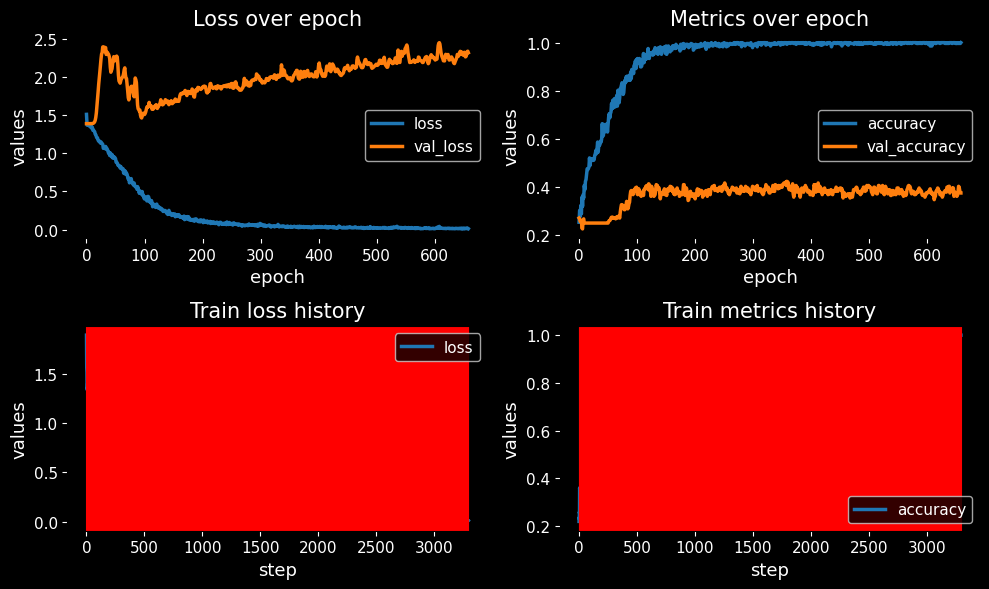


Epoch 478: val_accuracy did not improve from 0.38194

Epoch 155: val_accuracy did not improve from 0.40278

Epoch 240: val_accuracy did not improve from 0.37847

Epoch 479: val_accuracy did not improve from 0.38194

Epoch 156: val_accuracy did not improve from 0.40278

Epoch 241: val_accuracy did not improve from 0.37847

Epoch 480: val_accuracy did not improve from 0.38194

Epoch 157: val_accuracy did not improve from 0.40278

Epoch 242: val_accuracy did not improve from 0.37847
Model `atcnet_orig_norm-no_clean_ch-3_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4236111111111111, 'test_subj-BCI-IV 2a-3_accuracy': 0.4236111111111111}


 46%|█████████████████████████████████████▋                                            | 57/124 [13:49<58:27, 52.35s/it]


Epoch 481: val_accuracy did not improve from 0.38194

Epoch 158: val_accuracy did not improve from 0.40278

Epoch 243: val_accuracy did not improve from 0.37847

Epoch 482: val_accuracy did not improve from 0.38194

Epoch 159: val_accuracy did not improve from 0.40278

Epoch 244: val_accuracy did not improve from 0.37847

Epoch 483: val_accuracy did not improve from 0.38194

Epoch 160: val_accuracy did not improve from 0.40278

Epoch 245: val_accuracy did not improve from 0.37847

Epoch 484: val_accuracy did not improve from 0.38194

Epoch 161: val_accuracy did not improve from 0.40278

Epoch 246: val_accuracy did not improve from 0.37847

Epoch 485: val_accuracy did not improve from 0.38194

Epoch 162: val_accuracy did not improve from 0.40278

Epoch 247: val_accuracy did not improve from 0.37847

Epoch 486: val_accuracy did not improve from 0.38194

Epoch 163: val_accuracy did not improve from 0.40278

Epoch 248: val_accuracy did not improve from 0.37847

Epoch 487: val_accuracy did

2024-02-16 10:38:56.255526: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 258: val_accuracy did not improve from 0.37847

Epoch 497: val_accuracy did not improve from 0.38194

Epoch 174: val_accuracy did not improve from 0.40278

Epoch 259: val_accuracy did not improve from 0.37847

Epoch 498: val_accuracy did not improve from 0.38194

Epoch 175: val_accuracy did not improve from 0.40278

Epoch 260: val_accuracy did not improve from 0.37847
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in v

2024-02-16 10:39:10.200917: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 536: val_accuracy did not improve from 0.38194

Epoch 213: val_accuracy did not improve from 0.40278

Epoch 298: val_accuracy did not improve from 0.37847

Epoch 537: val_accuracy did not improve from 0.38194

Epoch 214: val_accuracy did not improve from 0.40278

Epoch 299: val_accuracy did not improve from 0.37847

Epoch 538: val_accuracy did not improve from 0.38194

Epoch 215: val_accuracy did not improve from 0.40278

Epoch 300: val_accuracy did not improve from 0.37847

Epoch 539: val_accuracy did not improve from 0.38194

Epoch 216: val_accuracy did not improve from 0.40278

Epoch 301: val_accuracy did not improve from 0.37847

Epoch 540: val_accuracy did not improve from 0.38194

Epoch 217: val_accuracy did not improve from 0.40278

Epoch 302: val_accuracy did not improve from 0.37847

Epoch 541: val_accuracy did not improve from 0.38194


2024-02-16 10:39:12.090696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 218: val_accuracy did not improve from 0.40278

Epoch 303: val_accuracy did not improve from 0.37847

Epoch 542: val_accuracy did not improve from 0.38194

Epoch 219: val_accuracy did not improve from 0.40278

Epoch 304: val_accuracy did not improve from 0.37847

Epoch 543: val_accuracy did not improve from 0.38194

Epoch 220: val_accuracy did not improve from 0.40278

Epoch 305: val_accuracy did not improve from 0.37847

Epoch 544: val_accuracy did not improve from 0.38194

Epoch 221: val_accuracy did not improve from 0.40278

Epoch 306: val_accuracy did not improve from 0.37847

Epoch 222: val_accuracy did not improve from 0.40278

Epoch 545: val_accuracy did not improve from 0.38194


2024-02-16 10:39:13.530907: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bfab80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:39:13.530938: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:39:13.535592: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076353.630956 3055705 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 307: val_accuracy did not improve from 0.37847

Epoch 223: val_accuracy did not improve from 0.40278

Epoch 546: val_accuracy did not improve from 0.38194

Epoch 308: val_accuracy did not improve from 0.37847

Epoch 547: val_accuracy did not improve from 0.38194

Epoch 224: val_accuracy did not improve from 0.40278

Epoch 309: val_accuracy did not improve from 0.37847

Epoch 548: val_accuracy did not improve from 0.38194

Epoch 225: val_accuracy did not improve from 0.40278

Epoch 310: val_accuracy did not improve from 0.37847

Epoch 226: val_accuracy did not improve from 0.40278

Epoch 549: val_accuracy did not improve from 0.38194

Epoch 311: val_accuracy did not improve from 0.37847

Epoch 227: val_accuracy did not improve from 0.40278

Epoch 550: val_accuracy did not improve from 0.38194

Epoch 312: val_accuracy did not improve from 0.37847

Epoch 228: val_accuracy did not improve from 0.40278

Epoch 551: val_accuracy did not improve from 0.38194

Epoch 313: val_accuracy did

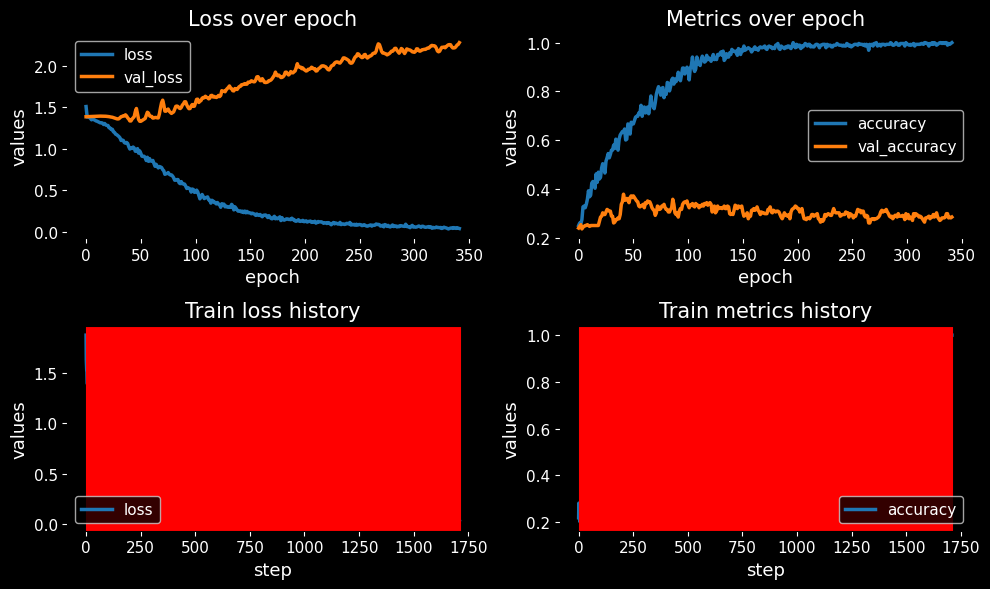


Epoch 267: val_accuracy did not improve from 0.40278

Epoch 590: val_accuracy did not improve from 0.38194

Epoch 16: val_accuracy did not improve from 0.26736

Epoch 268: val_accuracy did not improve from 0.40278

Epoch 591: val_accuracy did not improve from 0.38194

Epoch 17: val_accuracy did not improve from 0.26736

Epoch 269: val_accuracy did not improve from 0.40278

Epoch 592: val_accuracy did not improve from 0.38194
Model `atcnet_orig_norm-no_clean_ch-5_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.3784722222222222, 'test_subj-BCI-IV 2a-1_accuracy': 0.3784722222222222}


 47%|██████████████████████████████████████▎                                           | 58/124 [14:29<54:00, 49.10s/it]


Epoch 18: val_accuracy did not improve from 0.26736

Epoch 270: val_accuracy did not improve from 0.40278

Epoch 593: val_accuracy did not improve from 0.38194

Epoch 19: val_accuracy did not improve from 0.26736

Epoch 271: val_accuracy did not improve from 0.40278

Epoch 594: val_accuracy did not improve from 0.38194

Epoch 20: val_accuracy did not improve from 0.26736

Epoch 272: val_accuracy did not improve from 0.40278

Epoch 595: val_accuracy did not improve from 0.38194

Epoch 21: val_accuracy did not improve from 0.26736

Epoch 273: val_accuracy did not improve from 0.40278

Epoch 596: val_accuracy did not improve from 0.38194

Epoch 22: val_accuracy did not improve from 0.26736

Epoch 274: val_accuracy did not improve from 0.40278

Epoch 597: val_accuracy did not improve from 0.38194

Epoch 23: val_accuracy did not improve from 0.26736

Epoch 275: val_accuracy did not improve from 0.40278

Epoch 598: val_accuracy did not improve from 0.38194

Epoch 24: val_accuracy did not im

2024-02-16 10:39:35.912277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 285: val_accuracy did not improve from 0.40278

Epoch 608: val_accuracy did not improve from 0.38194

Epoch 34: val_accuracy did not improve from 0.26736

Epoch 286: val_accuracy did not improve from 0.40278

Epoch 609: val_accuracy did not improve from 0.38194

Epoch 35: val_accuracy did not improve from 0.26736

Epoch 287: val_accuracy did not improve from 0.40278

Epoch 610: val_accuracy did not improve from 0.38194

Epoch 36: val_accuracy did not improve from 0.26736
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 

2024-02-16 10:39:49.763290: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 647: val_accuracy did not improve from 0.39236

Epoch 71: val_accuracy improved from 0.31944 to 0.32292, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 325: val_accuracy did not improve from 0.40278

Epoch 648: val_accuracy did not improve from 0.39236

Epoch 326: val_accuracy did not improve from 0.40278

Epoch 72: val_accuracy did not improve from 0.32292

Epoch 649: val_accuracy did not improve from 0.39236

Epoch 327: val_accuracy did not improve from 0.40278

Epoch 73: val_accuracy improved from 0.32292 to 0.34028, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 650: val_accuracy did not improve from 0.39236

Epoch 328: val_accuracy did not improve from 0.40278

Epoch 74: val_accuracy did not improve from 0.34028

Epoch 651: val_accuracy did not improve from 0.39236

Epoch 329: val_accuracy did not improve from 0.40278

Epoch

2024-02-16 10:39:51.626870: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 652: val_accuracy did not improve from 0.39236

Epoch 330: val_accuracy did not improve from 0.40278

Epoch 76: val_accuracy did not improve from 0.34028

Epoch 653: val_accuracy did not improve from 0.39236

Epoch 331: val_accuracy did not improve from 0.40278

Epoch 77: val_accuracy did not improve from 0.34028

Epoch 654: val_accuracy did not improve from 0.39236

Epoch 332: val_accuracy did not improve from 0.40278

Epoch 78: val_accuracy did not improve from 0.34028

Epoch 655: val_accuracy did not improve from 0.39236

Epoch 333: val_accuracy did not improve from 0.40278

Epoch 79: val_accuracy did not improve from 0.34028


2024-02-16 10:39:53.076781: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3791bfc2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:39:53.076805: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:39:53.081140: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076393.177166 3071839 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 656: val_accuracy did not improve from 0.39236

Epoch 334: val_accuracy did not improve from 0.40278

Epoch 80: val_accuracy did not improve from 0.34028

Epoch 657: val_accuracy did not improve from 0.39236

Epoch 335: val_accuracy did not improve from 0.40278

Epoch 81: val_accuracy improved from 0.34028 to 0.34375, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 658: val_accuracy did not improve from 0.39236

Epoch 336: val_accuracy did not improve from 0.40278

Epoch 659: val_accuracy did not improve from 0.39236

Epoch 82: val_accuracy improved from 0.34375 to 0.36458, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 337: val_accuracy did not improve from 0.40278

Epoch 660: val_accuracy did not improve from 0.39236

Epoch 338: val_accuracy did not improve from 0.40278

Epoch 83: val_accuracy did not improve from 0.36458

Epoch

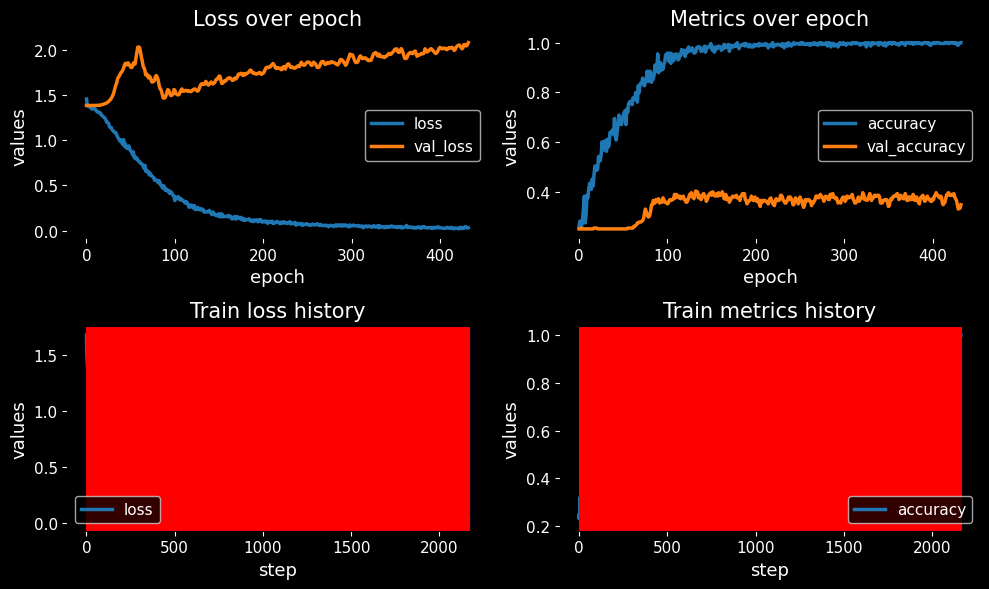


Epoch 187: val_accuracy did not improve from 0.41667

Epoch 766: val_accuracy did not improve from 0.39236

Epoch 78: val_accuracy did not improve from 0.37500

Epoch 188: val_accuracy did not improve from 0.41667

Epoch 767: val_accuracy did not improve from 0.39236

Epoch 79: val_accuracy did not improve from 0.37500

Epoch 189: val_accuracy did not improve from 0.41667

Epoch 768: val_accuracy did not improve from 0.39236

Epoch 80: val_accuracy did not improve from 0.37500
Model `atcnet_orig_norm-no_clean_ch-5_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4027777777777778, 'test_subj-BCI-IV 2a-3_accuracy': 0.4027777777777778}


 48%|███████████████████████████████████████                                           | 59/124 [15:32<57:17, 52.89s/it]


Epoch 190: val_accuracy did not improve from 0.41667

Epoch 769: val_accuracy did not improve from 0.39236

Epoch 81: val_accuracy did not improve from 0.37500

Epoch 191: val_accuracy did not improve from 0.41667

Epoch 770: val_accuracy did not improve from 0.39236

Epoch 82: val_accuracy did not improve from 0.37500

Epoch 192: val_accuracy did not improve from 0.41667

Epoch 771: val_accuracy did not improve from 0.39236

Epoch 83: val_accuracy did not improve from 0.37500

Epoch 193: val_accuracy did not improve from 0.41667

Epoch 772: val_accuracy did not improve from 0.39236

Epoch 84: val_accuracy did not improve from 0.37500

Epoch 194: val_accuracy did not improve from 0.41667

Epoch 773: val_accuracy did not improve from 0.39236

Epoch 85: val_accuracy did not improve from 0.37500

Epoch 195: val_accuracy did not improve from 0.41667

Epoch 774: val_accuracy did not improve from 0.39236

Epoch 86: val_accuracy did not improve from 0.37500

Epoch 196: val_accuracy did not i

2024-02-16 10:40:39.142453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 206: val_accuracy did not improve from 0.41667

Epoch 785: val_accuracy did not improve from 0.39236

Epoch 97: val_accuracy improved from 0.37500 to 0.39236, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 207: val_accuracy did not improve from 0.41667

Epoch 786: val_accuracy did not improve from 0.39236

Epoch 98: val_accuracy did not improve from 0.39236

Epoch 208: val_accuracy did not improve from 0.41667

Epoch 787: val_accuracy did not improve from 0.39236
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1


2024-02-16 10:40:53.007861: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 245: val_accuracy did not improve from 0.41667

Epoch 134: val_accuracy did not improve from 0.46181

Epoch 824: val_accuracy did not improve from 0.39583

Epoch 246: val_accuracy did not improve from 0.41667

Epoch 135: val_accuracy did not improve from 0.46181

Epoch 825: val_accuracy did not improve from 0.39583

Epoch 247: val_accuracy did not improve from 0.41667

Epoch 136: val_accuracy did not improve from 0.46181

Epoch 826: val_accuracy did not improve from 0.39583

Epoch 248: val_accuracy did not improve from 0.41667

Epoch 137: val_accuracy did not improve from 0.46181

Epoch 827: val_accuracy did not improve from 0.39583

Epoch 249: val_accuracy did not improve from 0.41667

Epoch 138: val_accuracy did not improve from 0.46181

Epoch 828: val_accuracy did not improve from 0.39583

Epoch 250: val_accuracy did not improve from 0.41667

Epoch 139: val_accuracy did not improve from 0.46181


2024-02-16 10:40:54.857918: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 829: val_accuracy did not improve from 0.39583

Epoch 251: val_accuracy did not improve from 0.41667

Epoch 140: val_accuracy did not improve from 0.46181

Epoch 830: val_accuracy did not improve from 0.39583

Epoch 252: val_accuracy did not improve from 0.41667

Epoch 141: val_accuracy did not improve from 0.46181

Epoch 831: val_accuracy did not improve from 0.39583

Epoch 253: val_accuracy did not improve from 0.41667

Epoch 142: val_accuracy did not improve from 0.46181

Epoch 832: val_accuracy did not improve from 0.39583

Epoch 254: val_accuracy did not improve from 0.41667

Epoch 143: val_accuracy did not improve from 0.46181


2024-02-16 10:40:56.303655: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3775bf35b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:40:56.303679: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:40:56.308231: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076456.405982 3097829 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 833: val_accuracy did not improve from 0.39583

Epoch 255: val_accuracy did not improve from 0.41667

Epoch 144: val_accuracy did not improve from 0.46181

Epoch 834: val_accuracy did not improve from 0.39583

Epoch 256: val_accuracy did not improve from 0.41667

Epoch 145: val_accuracy did not improve from 0.46181

Epoch 835: val_accuracy did not improve from 0.39583

Epoch 257: val_accuracy did not improve from 0.41667

Epoch 146: val_accuracy did not improve from 0.46181

Epoch 836: val_accuracy did not improve from 0.39583

Epoch 258: val_accuracy did not improve from 0.41667

Epoch 147: val_accuracy did not improve from 0.46181

Epoch 837: val_accuracy did not improve from 0.39583

Epoch 259: val_accuracy did not improve from 0.41667

Epoch 148: val_accuracy did not improve from 0.46181

Epoch 838: val_accuracy did not improve from 0.39583

Epoch 260: val_accuracy did not improve from 0.41667

Epoch 149: val_accuracy did not improve from 0.46181

Epoch 839: val_accuracy did

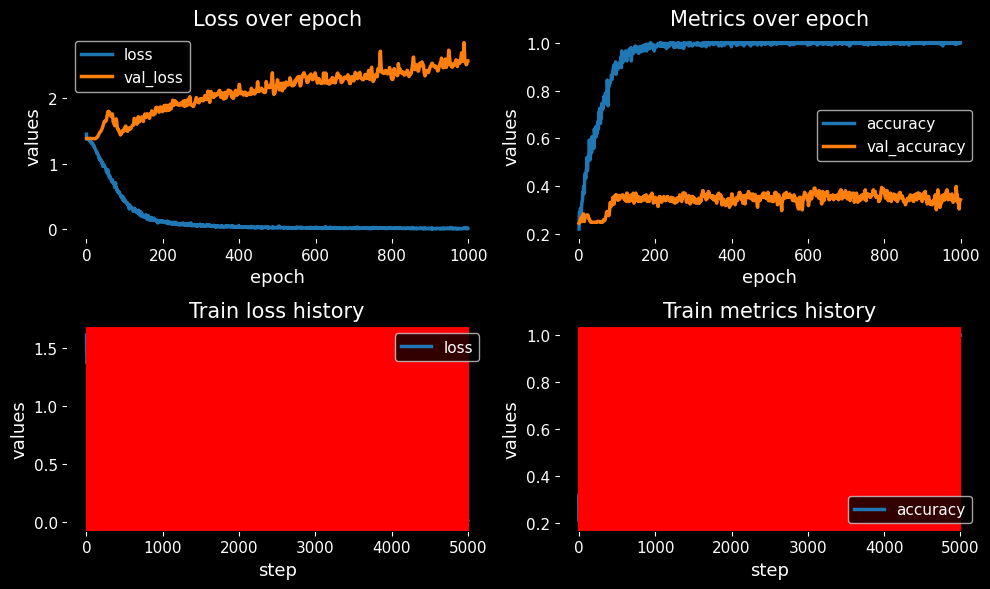


Epoch 152: val_accuracy did not improve from 0.45139

Epoch 445: val_accuracy did not improve from 0.41667

Epoch 334: val_accuracy did not improve from 0.46528

Epoch 153: val_accuracy did not improve from 0.45139

Epoch 446: val_accuracy did not improve from 0.41667

Epoch 335: val_accuracy did not improve from 0.46528

Epoch 154: val_accuracy did not improve from 0.45139

Epoch 447: val_accuracy did not improve from 0.41667

Epoch 336: val_accuracy did not improve from 0.46528
Model `atcnet_orig_norm-no_clean_ch-4_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.3993055555555556, 'test_subj-BCI-IV 2a-3_accuracy': 0.3993055555555556}


 48%|██████████████████████████████████████▋                                         | 60/124 [17:04<1:08:01, 63.78s/it]


Epoch 155: val_accuracy did not improve from 0.45139

Epoch 448: val_accuracy did not improve from 0.41667

Epoch 337: val_accuracy did not improve from 0.46528

Epoch 156: val_accuracy did not improve from 0.45139

Epoch 449: val_accuracy did not improve from 0.41667

Epoch 338: val_accuracy did not improve from 0.46528

Epoch 157: val_accuracy did not improve from 0.45139

Epoch 450: val_accuracy did not improve from 0.41667

Epoch 339: val_accuracy did not improve from 0.46528

Epoch 158: val_accuracy did not improve from 0.45139

Epoch 451: val_accuracy did not improve from 0.41667

Epoch 340: val_accuracy did not improve from 0.46528

Epoch 159: val_accuracy did not improve from 0.45139

Epoch 452: val_accuracy did not improve from 0.41667

Epoch 341: val_accuracy did not improve from 0.46528

Epoch 160: val_accuracy did not improve from 0.45139

Epoch 453: val_accuracy did not improve from 0.41667

Epoch 342: val_accuracy improved from 0.46528 to 0.48264, saving model to pretrai

2024-02-16 10:42:11.412064: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 463: val_accuracy did not improve from 0.41667

Epoch 171: val_accuracy did not improve from 0.45139

Epoch 352: val_accuracy did not improve from 0.48958

Epoch 464: val_accuracy did not improve from 0.41667

Epoch 172: val_accuracy did not improve from 0.45139

Epoch 353: val_accuracy did not improve from 0.48958

Epoch 465: val_accuracy did not improve from 0.41667
Epoch 464 : Early stopping !
Epoch 465: early stopping
Training finished after 3min 12sec !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3/saving/model.json !
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in tra

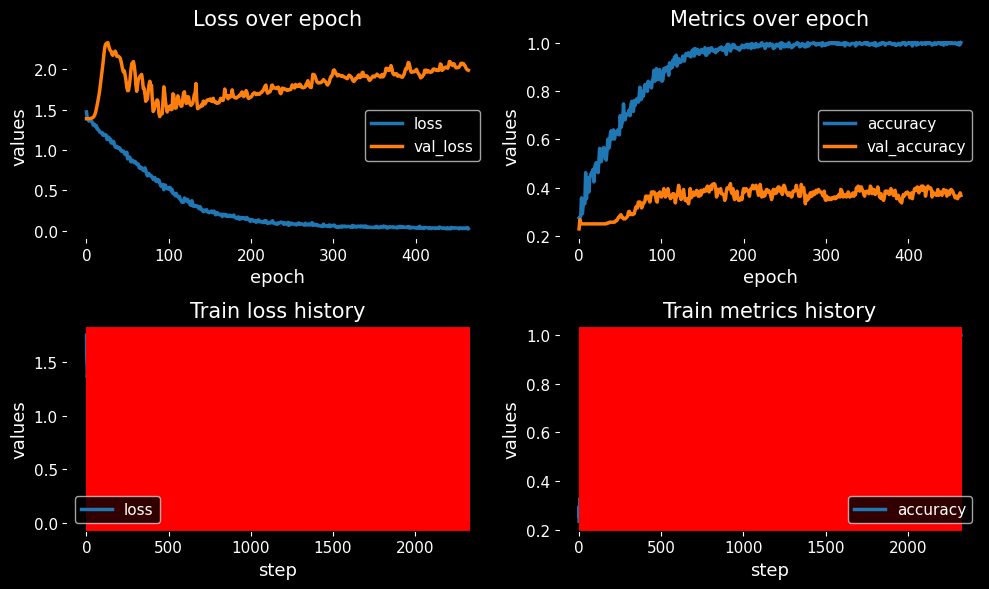


Epoch 184: val_accuracy did not improve from 0.45139

Epoch 365: val_accuracy did not improve from 0.48958

Epoch 185: val_accuracy did not improve from 0.45139

Epoch 366: val_accuracy did not improve from 0.48958
Model `atcnet_orig_norm-no_clean_ch-6_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4166666666666667, 'test_subj-BCI-IV 2a-1_accuracy': 0.4166666666666667}


 49%|████████████████████████████████████████▎                                         | 61/124 [17:15<51:11, 48.75s/it]


Epoch 186: val_accuracy did not improve from 0.45139

Epoch 367: val_accuracy did not improve from 0.48958

Epoch 187: val_accuracy did not improve from 0.45139

Epoch 368: val_accuracy did not improve from 0.48958

Epoch 188: val_accuracy did not improve from 0.45139

Epoch 369: val_accuracy did not improve from 0.48958

Epoch 189: val_accuracy did not improve from 0.45139

Epoch 370: val_accuracy did not improve from 0.48958

Epoch 190: val_accuracy did not improve from 0.45139

Epoch 371: val_accuracy did not improve from 0.48958

Epoch 191: val_accuracy did not improve from 0.45139

Epoch 372: val_accuracy did not improve from 0.48958

Epoch 192: val_accuracy did not improve from 0.45139

Epoch 373: val_accuracy did not improve from 0.48958

Epoch 193: val_accuracy did not improve from 0.45139

Epoch 374: val_accuracy did not improve from 0.48958

Epoch 375: val_accuracy did not improve from 0.48958

Epoch 194: val_accuracy did not improve from 0.45139

Epoch 376: val_accuracy did

2024-02-16 10:42:22.121772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 384: val_accuracy did not improve from 0.48958

Epoch 203: val_accuracy did not improve from 0.45139

Epoch 385: val_accuracy did not improve from 0.48958

Epoch 204: val_accuracy did not improve from 0.45139
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcn

2024-02-16 10:42:24.789437: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 211: val_accuracy did not improve from 0.45139

Epoch 392: val_accuracy did not improve from 0.48958

Epoch 212: val_accuracy did not improve from 0.45139

Epoch 393: val_accuracy did not improve from 0.48958

Epoch 213: val_accuracy did not improve from 0.45139

Epoch 394: val_accuracy did not improve from 0.48958
Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 64
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 1000
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 395: val_accuracy did not improve from 0.48958

Epoch 214: val_accuracy did not improve from 0.45139

Epoch 215: val_accuracy did not improve from 0.45139

Epoch 396: val_accuracy did not improve from 0.48958


2024-02-16 10:42:26.597770: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 397: val_accuracy did not improve from 0.48958

Epoch 216: val_accuracy did not improve from 0.45139

Epoch 398: val_accuracy did not improve from 0.48958

Epoch 217: val_accuracy did not improve from 0.45139

Epoch 399: val_accuracy did not improve from 0.48958

Epoch 218: val_accuracy did not improve from 0.45139

Epoch 219: val_accuracy did not improve from 0.45139

Epoch 400: val_accuracy did not improve from 0.48958


2024-02-16 10:42:27.968931: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc042c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:42:27.968961: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:42:27.973781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076548.066348 3135757 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 220: val_accuracy did not improve from 0.45139

Epoch 401: val_accuracy did not improve from 0.48958

Epoch 221: val_accuracy did not improve from 0.45139

Epoch 402: val_accuracy did not improve from 0.48958

Epoch 222: val_accuracy did not improve from 0.45139

Epoch 403: val_accuracy did not improve from 0.48958

Epoch 223: val_accuracy did not improve from 0.45139

Epoch 404: val_accuracy did not improve from 0.48958

Epoch 224: val_accuracy did not improve from 0.45139

Epoch 405: val_accuracy did not improve from 0.48958

Epoch 406: val_accuracy did not improve from 0.48958

Epoch 225: val_accuracy did not improve from 0.45139

Epoch 226: val_accuracy did not improve from 0.45139

Epoch 407: val_accuracy did not improve from 0.48958

Epoch 227: val_accuracy did not improve from 0.45139

Epoch 408: val_accuracy did not improve from 0.48958

Epoch 409: val_accuracy did not improve from 0.48958

Epoch 228: val_accuracy did not improve from 0.45139

Epoch 410: val_accuracy did

2024-02-16 10:42:35.853464: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 423: val_accuracy did not improve from 0.48958

Epoch 242: val_accuracy did not improve from 0.45139

Epoch 424: val_accuracy did not improve from 0.48958

Epoch 243: val_accuracy did not improve from 0.45139

Epoch 244: val_accuracy did not improve from 0.45139

Epoch 425: val_accuracy did not improve from 0.48958

Epoch 245: val_accuracy did not improve from 0.45139

Epoch 426: val_accuracy did not improve from 0.48958

Epoch 246: val_accuracy did not improve from 0.45139

Epoch 427: val_accuracy did not improve from 0.48958

Epoch 1: val_accuracy improved from -inf to 0.28472, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-7_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 247: val_accuracy did not improve from 0.45139

Epoch 428: val_accuracy did not improve from 0.48958


2024-02-16 10:42:37.668508: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Saving at epoch 1 !

Epoch 429: val_accuracy did not improve from 0.48958

Epoch 248: val_accuracy did not improve from 0.45139

Epoch 2: val_accuracy did not improve from 0.28472

Saving at epoch 2 !

Epoch 430: val_accuracy did not improve from 0.48958

Epoch 249: val_accuracy did not improve from 0.45139

Epoch 431: val_accuracy did not improve from 0.48958

Epoch 250: val_accuracy did not improve from 0.45139

Epoch 3: val_accuracy did not improve from 0.28472

Saving at epoch 3 !

Epoch 432: val_accuracy did not improve from 0.48958

Epoch 251: val_accuracy did not improve from 0.45139


2024-02-16 10:42:39.098128: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc09340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:42:39.098155: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:42:39.102980: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076559.202912 3138538 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 433: val_accuracy did not improve from 0.48958

Epoch 252: val_accuracy did not improve from 0.45139

Epoch 4: val_accuracy did not improve from 0.28472

Saving at epoch 4 !

Epoch 434: val_accuracy did not improve from 0.48958

Epoch 253: val_accuracy did not improve from 0.45139

Epoch 435: val_accuracy did not improve from 0.48958

Epoch 254: val_accuracy did not improve from 0.45139

Epoch 5: val_accuracy did not improve from 0.28472

Saving at epoch 5 !

Epoch 436: val_accuracy did not improve from 0.48958

Epoch 255: val_accuracy did not improve from 0.45139

Epoch 437: val_accuracy did not improve from 0.48958

Epoch 256: val_accuracy did not improve from 0.45139

Epoch 6: val_accuracy improved from 0.28472 to 0.34028, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-7_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 6 !

Epoch 438: val_accuracy did not improve from 0.48958

Epoch 257: val_accuracy did not improve from 0.45139

Epoch 439: 

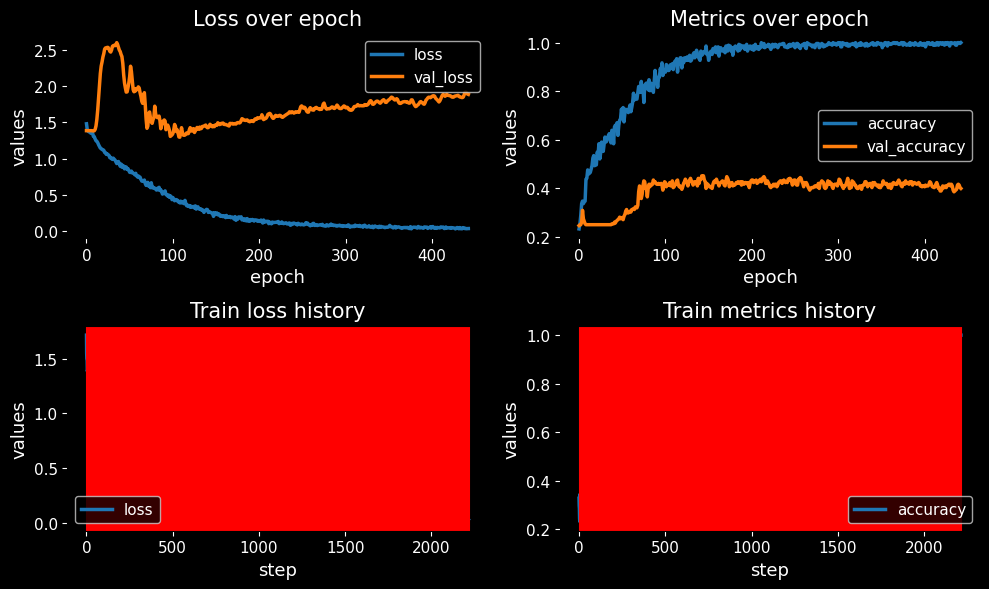


Epoch 163: val_accuracy did not improve from 0.43403

Epoch 635: val_accuracy did not improve from 0.48958

Epoch 187: val_accuracy did not improve from 0.55903

Epoch 164: val_accuracy did not improve from 0.43403

Epoch 636: val_accuracy did not improve from 0.48958

Epoch 188: val_accuracy did not improve from 0.55903

Epoch 165: val_accuracy did not improve from 0.43403

Epoch 637: val_accuracy did not improve from 0.48958

Epoch 189: val_accuracy did not improve from 0.55903
Model `atcnet_orig_norm-no_clean_ch-7_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4513888888888889, 'test_subj-BCI-IV 2a-1_accuracy': 0.4513888888888889}


 50%|████████████████████████████████████████                                        | 62/124 [18:51<1:04:32, 62.46s/it]


Epoch 166: val_accuracy did not improve from 0.43403

Epoch 638: val_accuracy did not improve from 0.48958

Epoch 190: val_accuracy did not improve from 0.55903

Epoch 167: val_accuracy did not improve from 0.43403

Epoch 639: val_accuracy did not improve from 0.48958

Epoch 191: val_accuracy did not improve from 0.55903

Epoch 168: val_accuracy did not improve from 0.43403

Epoch 640: val_accuracy did not improve from 0.48958

Epoch 192: val_accuracy did not improve from 0.55903

Epoch 169: val_accuracy did not improve from 0.43403

Epoch 641: val_accuracy did not improve from 0.48958

Epoch 193: val_accuracy did not improve from 0.55903

Epoch 170: val_accuracy did not improve from 0.43403

Epoch 642: val_accuracy did not improve from 0.48958

Epoch 194: val_accuracy did not improve from 0.55903

Epoch 171: val_accuracy did not improve from 0.43403

Epoch 643: val_accuracy did not improve from 0.48958
Epoch 642 : Early stopping !
Epoch 643: early stopping
Training finished after 4mi

2024-02-16 10:43:58.491085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 205: val_accuracy did not improve from 0.55903

Epoch 182: val_accuracy did not improve from 0.43403

Epoch 206: val_accuracy did not improve from 0.55903

Epoch 183: val_accuracy did not improve from 0.43403

Epoch 207: val_accuracy did not improve from 0.55903

Epoch 184: val_accuracy did not improve from 0.43403
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s

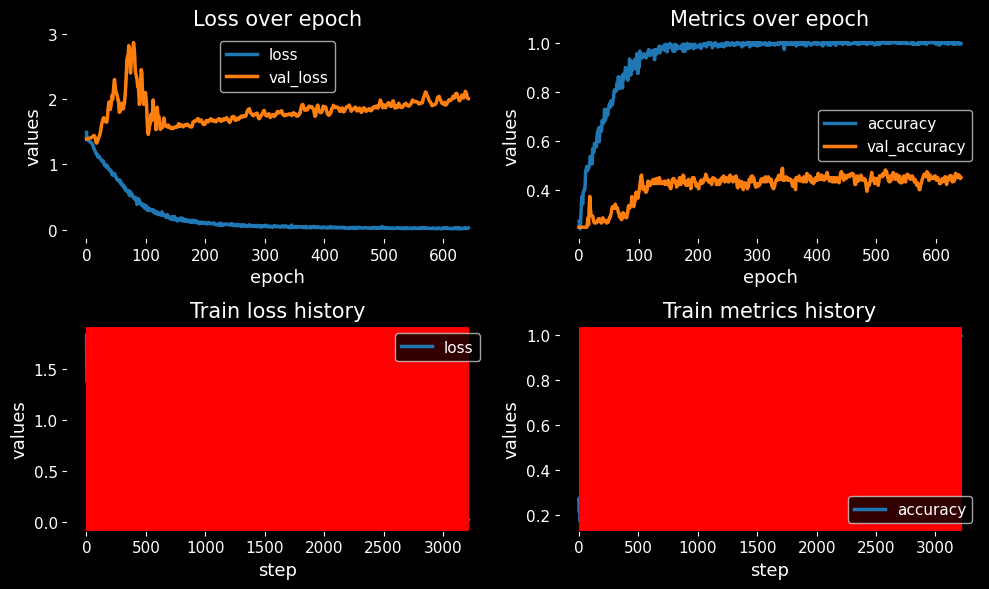


Epoch 209: val_accuracy did not improve from 0.55903

Epoch 186: val_accuracy did not improve from 0.43403

Epoch 210: val_accuracy did not improve from 0.55903
Initializing submodel : `model` !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-8_subj-3_run-10_scenario-3/saving/model.json !

Epoch 187: val_accuracy did not improve from 0.43403

Epoch 211: val_accuracy did not improve from 0.55903
Model atcnet_orig_norm-no_clean_ch-8_subj-3_run-10_scenario-3 initialized successfully !
Optimizer 'model_optimizer' initilized successfully !
Submodel model compiled !
  Loss : {'reduction': 'none', 'name': 'loss', 'from_logits': True, 'fn': 'sparse_categorical_crossentropy'}
  Optimizer : {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsi

 51%|█████████████████████████████████████████▋                                        | 63/124 [18:59<47:14, 46.46s/it]


Epoch 212: val_accuracy did not improve from 0.55903

Epoch 189: val_accuracy did not improve from 0.43403

Epoch 213: val_accuracy did not improve from 0.55903

Epoch 190: val_accuracy did not improve from 0.43403

Epoch 214: val_accuracy did not improve from 0.55903

Epoch 191: val_accuracy did not improve from 0.43403

Epoch 215: val_accuracy did not improve from 0.55903

Epoch 192: val_accuracy did not improve from 0.43403
Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 64
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 1000
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 216: val_accuracy did not improve from 0.55903

Epoch 193: val_accuracy did not improve from 0.43403

Epoch 217: val_accuracy did not improve 

2024-02-16 10:44:06.053521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 204: val_accuracy did not improve from 0.43750

Epoch 228: val_accuracy did not improve from 0.55903

Epoch 205: val_accuracy did not improve from 0.43750

Epoch 229: val_accuracy did not improve from 0.55903

Epoch 206: val_accuracy did not improve from 0.43750

Epoch 230: val_accuracy did not improve from 0.55903
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s

 51%|█████████████████████████████████████████▋                                        | 63/124 [19:10<47:14, 46.46s/it]


Epoch 244: val_accuracy did not improve from 0.55903


2024-02-16 10:44:11.851996: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 221: val_accuracy did not improve from 0.43750

Epoch 245: val_accuracy did not improve from 0.55903

Epoch 222: val_accuracy did not improve from 0.43750

Epoch 246: val_accuracy did not improve from 0.55903

Epoch 223: val_accuracy did not improve from 0.43750

Epoch 247: val_accuracy did not improve from 0.55903

Epoch 224: val_accuracy did not improve from 0.43750

Epoch 248: val_accuracy did not improve from 0.55903

Epoch 225: val_accuracy did not improve from 0.43750

Epoch 249: val_accuracy did not improve from 0.55903

Epoch 226: val_accuracy did not improve from 0.43750


2024-02-16 10:44:13.620976: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 250: val_accuracy did not improve from 0.55903

Epoch 227: val_accuracy did not improve from 0.43750

Epoch 251: val_accuracy did not improve from 0.55903

Epoch 228: val_accuracy did not improve from 0.43750

Epoch 252: val_accuracy did not improve from 0.55903

Epoch 229: val_accuracy did not improve from 0.43750

Epoch 253: val_accuracy did not improve from 0.55903


2024-02-16 10:44:14.945016: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789d40720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:44:14.945042: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:44:14.949640: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076655.039488 3178852 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 230: val_accuracy did not improve from 0.43750

Epoch 254: val_accuracy did not improve from 0.55903

Epoch 231: val_accuracy did not improve from 0.43750

Epoch 255: val_accuracy did not improve from 0.55903

Epoch 232: val_accuracy did not improve from 0.43750

Epoch 256: val_accuracy did not improve from 0.55903

Epoch 233: val_accuracy did not improve from 0.43750

Epoch 257: val_accuracy did not improve from 0.55903

Epoch 234: val_accuracy did not improve from 0.43750

Epoch 258: val_accuracy did not improve from 0.55903

Epoch 235: val_accuracy did not improve from 0.43750

Epoch 259: val_accuracy did not improve from 0.55903

Epoch 236: val_accuracy did not improve from 0.43750

Epoch 260: val_accuracy did not improve from 0.55903

Epoch 237: val_accuracy did not improve from 0.43750

Epoch 261: val_accuracy did not improve from 0.55903

Epoch 238: val_accuracy did not improve from 0.43750

Epoch 262: val_accuracy did not improve from 0.55903

Epoch 239: val_accuracy did

2024-02-16 10:44:19.734933: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 267: val_accuracy did not improve from 0.55903

Epoch 244: val_accuracy did not improve from 0.43750

Epoch 268: val_accuracy did not improve from 0.55903

Epoch 245: val_accuracy did not improve from 0.43750

Epoch 269: val_accuracy did not improve from 0.55903

Epoch 246: val_accuracy did not improve from 0.43750

Epoch 270: val_accuracy did not improve from 0.55903

Epoch 247: val_accuracy did not improve from 0.43750

Epoch 271: val_accuracy did not improve from 0.55903

Epoch 248: val_accuracy did not improve from 0.43750

Epoch 272: val_accuracy did not improve from 0.55903


2024-02-16 10:44:21.587303: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 249: val_accuracy did not improve from 0.43750

Epoch 273: val_accuracy did not improve from 0.55903

Epoch 250: val_accuracy did not improve from 0.43750

Epoch 274: val_accuracy did not improve from 0.55903

Epoch 251: val_accuracy did not improve from 0.43750

Epoch 275: val_accuracy did not improve from 0.55903

Epoch 252: val_accuracy did not improve from 0.43750

Epoch 276: val_accuracy did not improve from 0.55903


2024-02-16 10:44:22.968957: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3785c03da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:44:22.968984: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:44:22.973238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076663.065988 3180767 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 253: val_accuracy did not improve from 0.43750

Epoch 277: val_accuracy did not improve from 0.55903

Epoch 254: val_accuracy did not improve from 0.43750

Epoch 278: val_accuracy did not improve from 0.55903

Epoch 255: val_accuracy did not improve from 0.43750

Epoch 279: val_accuracy did not improve from 0.55903

Epoch 256: val_accuracy did not improve from 0.43750

Epoch 280: val_accuracy did not improve from 0.55903

Epoch 1: val_accuracy improved from -inf to 0.27083, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-8_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 257: val_accuracy did not improve from 0.43750

Saving at epoch 1 !

Epoch 281: val_accuracy did not improve from 0.55903

Epoch 258: val_accuracy did not improve from 0.43750

Epoch 282: val_accuracy did not improve from 0.55903

Epoch 259: val_accuracy did not improve from 0.43750

Epoch 2: val_accuracy did not improve from 0.27083

Saving at epoch 2 !

Epoch 283: val_accuracy did not i

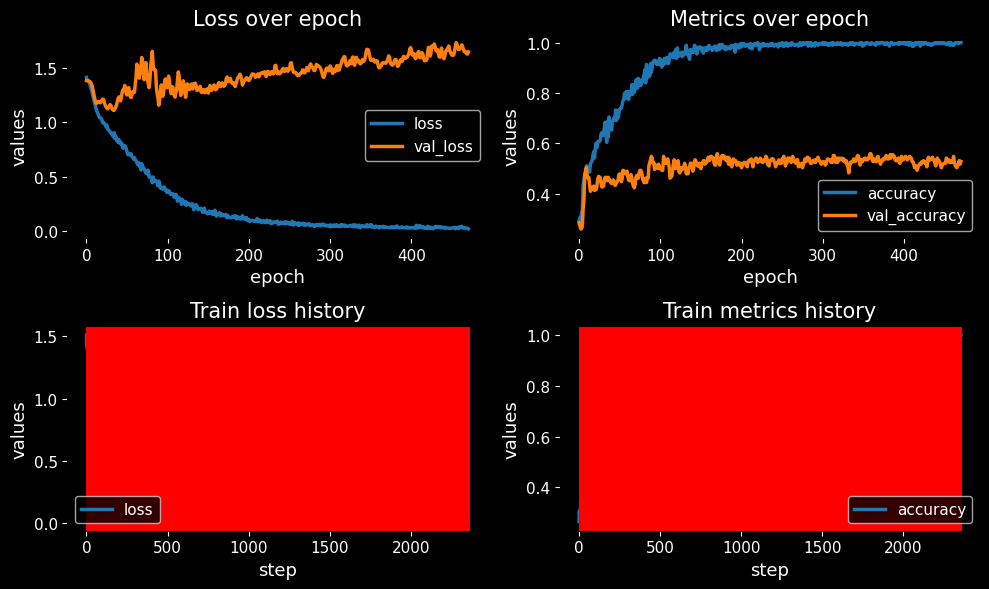


Epoch 152: val_accuracy did not improve from 0.42014

Epoch 458: val_accuracy did not improve from 0.43750

Epoch 193: val_accuracy did not improve from 0.46875

Epoch 153: val_accuracy did not improve from 0.42014

Epoch 459: val_accuracy did not improve from 0.43750

Epoch 194: val_accuracy did not improve from 0.46875

Epoch 154: val_accuracy did not improve from 0.42014

Epoch 460: val_accuracy did not improve from 0.43750
Model `atcnet_orig_norm-no_clean_ch-7_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5590277777777778, 'test_subj-BCI-IV 2a-3_accuracy': 0.5590277777777778}

Epoch 195: val_accuracy did not improve from 0.46875


 52%|█████████████████████████████████████████▎                                      | 64/124 [20:36<1:01:24, 61.41s/it]


Epoch 155: val_accuracy did not improve from 0.42014

Epoch 461: val_accuracy did not improve from 0.43750

Epoch 196: val_accuracy did not improve from 0.46875

Epoch 156: val_accuracy did not improve from 0.42014

Epoch 462: val_accuracy did not improve from 0.43750

Epoch 197: val_accuracy did not improve from 0.46875

Epoch 157: val_accuracy did not improve from 0.42014

Epoch 463: val_accuracy did not improve from 0.43750

Epoch 198: val_accuracy did not improve from 0.46875

Epoch 158: val_accuracy did not improve from 0.42014

Epoch 464: val_accuracy did not improve from 0.43750

Epoch 199: val_accuracy did not improve from 0.46875

Epoch 159: val_accuracy did not improve from 0.42014

Epoch 465: val_accuracy did not improve from 0.43750

Epoch 200: val_accuracy did not improve from 0.46875

Epoch 160: val_accuracy did not improve from 0.42014

Epoch 466: val_accuracy did not improve from 0.43750

Epoch 201: val_accuracy did not improve from 0.46875

Epoch 161: val_accuracy did

2024-02-16 10:45:43.345942: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 170: val_accuracy did not improve from 0.42014

Epoch 476: val_accuracy did not improve from 0.43750

Epoch 211: val_accuracy did not improve from 0.46875

Epoch 171: val_accuracy did not improve from 0.42014

Epoch 477: val_accuracy did not improve from 0.43750

Epoch 212: val_accuracy did not improve from 0.46875

Epoch 172: val_accuracy did not improve from 0.42014

Epoch 478: val_accuracy did not improve from 0.43750

Epoch 213: val_accuracy did not improve from 0.46875
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid

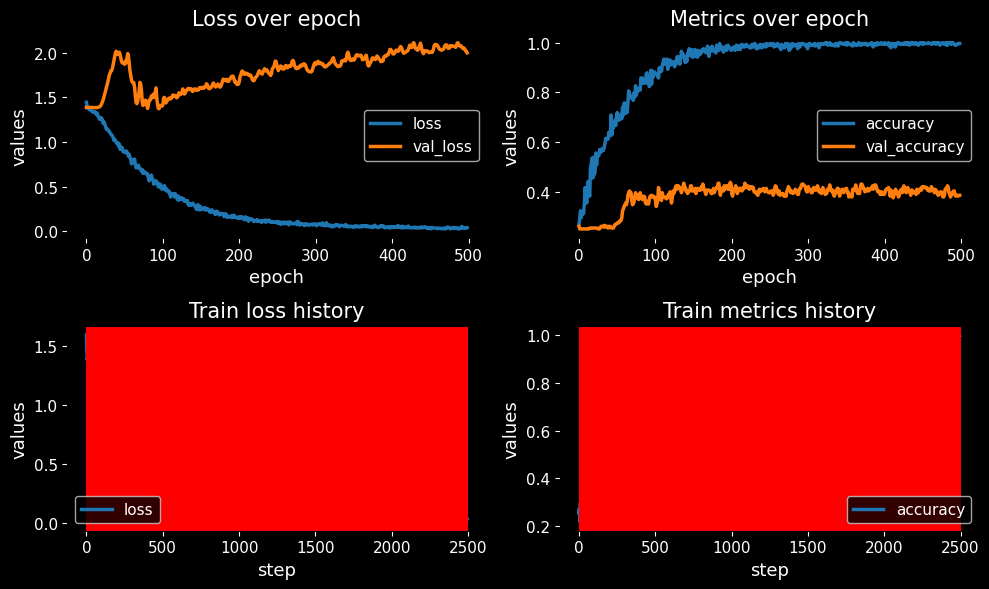


Epoch 205: val_accuracy did not improve from 0.42014

Epoch 246: val_accuracy did not improve from 0.46875

Epoch 206: val_accuracy did not improve from 0.42014

Epoch 247: val_accuracy did not improve from 0.46875

Epoch 207: val_accuracy did not improve from 0.42014
Model `atcnet_orig_norm-no_clean_ch-8_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4375, 'test_subj-BCI-IV 2a-1_accuracy': 0.4375}


 52%|██████████████████████████████████████████▉                                       | 65/124 [20:54<47:49, 48.64s/it]


Epoch 248: val_accuracy did not improve from 0.46875

Epoch 208: val_accuracy did not improve from 0.42014

Epoch 249: val_accuracy did not improve from 0.46875

Epoch 209: val_accuracy did not improve from 0.42014


2024-02-16 10:45:56.983820: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 250: val_accuracy did not improve from 0.46875

Epoch 210: val_accuracy did not improve from 0.42014

Epoch 251: val_accuracy did not improve from 0.46875

Epoch 211: val_accuracy did not improve from 0.42014

Epoch 252: val_accuracy did not improve from 0.46875

Epoch 212: val_accuracy did not improve from 0.42014

Epoch 253: val_accuracy did not improve from 0.46875

Epoch 213: val_accuracy did not improve from 0.42014

Epoch 254: val_accuracy did not improve from 0.46875

Epoch 214: val_accuracy did not improve from 0.42014

Epoch 255: val_accuracy did not improve from 0.46875


2024-02-16 10:45:58.702873: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 215: val_accuracy did not improve from 0.42014

Epoch 256: val_accuracy did not improve from 0.46875

Epoch 216: val_accuracy did not improve from 0.42014

Epoch 257: val_accuracy did not improve from 0.46875

Epoch 217: val_accuracy did not improve from 0.42014

Epoch 258: val_accuracy did not improve from 0.46875

Epoch 218: val_accuracy did not improve from 0.42014


2024-02-16 10:46:00.040942: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3779bfc280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:46:00.040970: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:46:00.046298: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076760.134283 3221399 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 259: val_accuracy did not improve from 0.46875

Epoch 219: val_accuracy did not improve from 0.42014

Epoch 260: val_accuracy did not improve from 0.46875

Epoch 220: val_accuracy did not improve from 0.42014

Epoch 261: val_accuracy did not improve from 0.46875

Epoch 221: val_accuracy did not improve from 0.42014

Epoch 262: val_accuracy did not improve from 0.46875
Loading dataset bciiv2a...

Epoch 222: val_accuracy did not improve from 0.42014


2024-02-16 10:46:01.604810: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 263: val_accuracy did not improve from 0.46875

Epoch 223: val_accuracy did not improve from 0.42014

Epoch 264: val_accuracy did not improve from 0.46875

Epoch 224: val_accuracy did not improve from 0.42014

Epoch 265: val_accuracy did not improve from 0.46875
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and

2024-02-16 10:46:15.237525: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 262: val_accuracy did not improve from 0.42014

Epoch 303: val_accuracy did not improve from 0.46875

Epoch 11: val_accuracy improved from 0.26042 to 0.26389, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-9_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 263: val_accuracy did not improve from 0.42014

Epoch 304: val_accuracy did not improve from 0.46875

Epoch 264: val_accuracy did not improve from 0.42014

Epoch 12: val_accuracy improved from 0.26389 to 0.26736, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-9_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 305: val_accuracy did not improve from 0.46875

Epoch 265: val_accuracy did not improve from 0.42014

Epoch 306: val_accuracy did not improve from 0.46875

Epoch 13: val_accuracy did not improve from 0.26736

Epoch 266: val_accuracy did not improve from 0.42014

Epoch 307: val_accuracy did not improve from 0.46875

Epoch 14: val_accuracy did not improve from 0.26736


2024-02-16 10:46:17.086694: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 267: val_accuracy did not improve from 0.42014

Epoch 308: val_accuracy did not improve from 0.46875

Epoch 15: val_accuracy did not improve from 0.26736

Epoch 268: val_accuracy did not improve from 0.42014

Epoch 309: val_accuracy did not improve from 0.46875

Epoch 16: val_accuracy did not improve from 0.26736

Epoch 269: val_accuracy did not improve from 0.42014

Epoch 310: val_accuracy did not improve from 0.46875

Epoch 17: val_accuracy did not improve from 0.26736

Epoch 270: val_accuracy did not improve from 0.42014

Epoch 311: val_accuracy did not improve from 0.46875

Epoch 18: val_accuracy did not improve from 0.26736


2024-02-16 10:46:18.489901: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789c03ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:46:18.489927: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:46:18.494634: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076778.587235 3227271 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 271: val_accuracy did not improve from 0.42014

Epoch 312: val_accuracy did not improve from 0.46875

Epoch 19: val_accuracy did not improve from 0.26736

Epoch 272: val_accuracy did not improve from 0.42014

Epoch 313: val_accuracy did not improve from 0.46875

Epoch 20: val_accuracy did not improve from 0.26736

Epoch 273: val_accuracy did not improve from 0.42014

Epoch 314: val_accuracy did not improve from 0.46875

Epoch 21: val_accuracy did not improve from 0.26736

Epoch 274: val_accuracy did not improve from 0.42014

Epoch 315: val_accuracy did not improve from 0.46875

Epoch 22: val_accuracy did not improve from 0.26736

Epoch 275: val_accuracy did not improve from 0.42014

Epoch 316: val_accuracy did not improve from 0.46875

Epoch 23: val_accuracy did not improve from 0.26736

Epoch 276: val_accuracy did not improve from 0.42014

Epoch 317: val_accuracy did not improve from 0.46875

Epoch 24: val_accuracy did not improve from 0.26736

Epoch 277: val_accuracy did not i

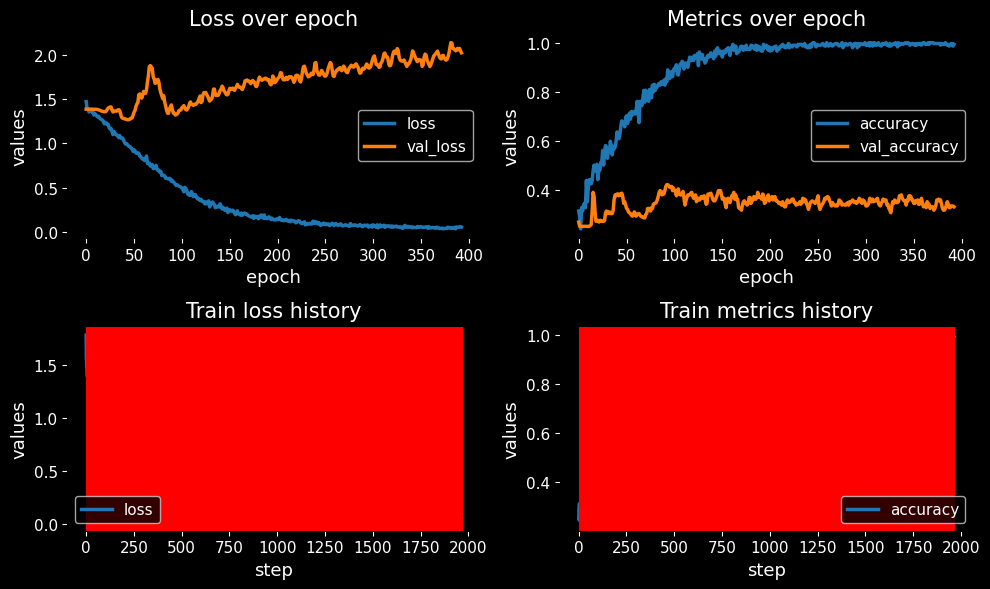


Epoch 144: val_accuracy did not improve from 0.43403

Epoch 443: val_accuracy did not improve from 0.46875

Epoch 94: val_accuracy did not improve from 0.38542

Epoch 145: val_accuracy did not improve from 0.43403

Epoch 444: val_accuracy did not improve from 0.46875

Epoch 95: val_accuracy did not improve from 0.38542

Epoch 146: val_accuracy did not improve from 0.43403

Epoch 445: val_accuracy did not improve from 0.46875

Epoch 96: val_accuracy did not improve from 0.38542
Model `atcnet_orig_norm-no_clean_ch-9_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4201388888888889, 'test_subj-BCI-IV 2a-1_accuracy': 0.4201388888888889}


 53%|███████████████████████████████████████████▋                                      | 66/124 [22:05<53:18, 55.14s/it]


Epoch 147: val_accuracy did not improve from 0.43403

Epoch 446: val_accuracy did not improve from 0.46875

Epoch 97: val_accuracy did not improve from 0.38542

Epoch 148: val_accuracy did not improve from 0.43403

Epoch 447: val_accuracy did not improve from 0.46875

Epoch 98: val_accuracy did not improve from 0.38542

Epoch 149: val_accuracy did not improve from 0.43403

Epoch 448: val_accuracy did not improve from 0.46875

Epoch 99: val_accuracy did not improve from 0.38542

Epoch 150: val_accuracy did not improve from 0.43403

Epoch 449: val_accuracy did not improve from 0.46875

Epoch 100: val_accuracy did not improve from 0.38542

Epoch 151: val_accuracy did not improve from 0.43403

Epoch 450: val_accuracy did not improve from 0.46875

Epoch 101: val_accuracy did not improve from 0.38542

Epoch 152: val_accuracy did not improve from 0.43403

Epoch 451: val_accuracy did not improve from 0.46875
Epoch 450 : Early stopping !
Epoch 451: early stopping
Training finished after 3min 6

2024-02-16 10:47:12.126845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 112: val_accuracy did not improve from 0.38542


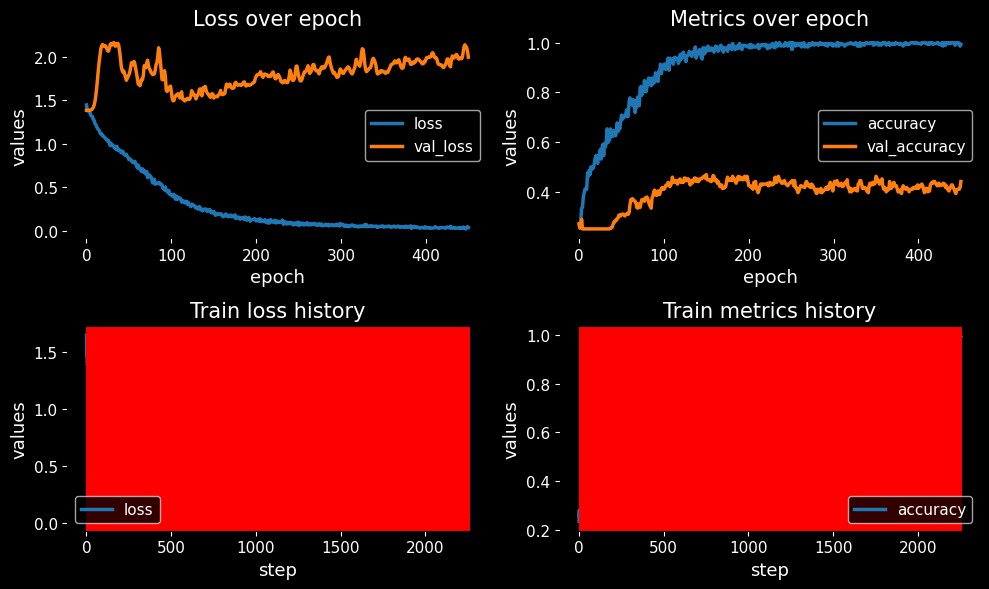


Epoch 163: val_accuracy did not improve from 0.43403

Epoch 113: val_accuracy did not improve from 0.38542

Epoch 164: val_accuracy did not improve from 0.43403

Epoch 114: val_accuracy did not improve from 0.38542

Epoch 165: val_accuracy did not improve from 0.43403
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and

 54%|████████████████████████████████████████████▎                                     | 67/124 [22:11<38:35, 40.61s/it]


Epoch 166: val_accuracy did not improve from 0.43403

Epoch 116: val_accuracy did not improve from 0.38542

Epoch 167: val_accuracy did not improve from 0.43403

Epoch 117: val_accuracy did not improve from 0.38542
Initializing submodel : `model` !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-10_subj-3_run-10_scenario-3/saving/model.json !

Epoch 168: val_accuracy did not improve from 0.43403

Epoch 118: val_accuracy did not improve from 0.38542
Model atcnet_orig_norm-no_clean_ch-10_subj-3_run-10_scenario-3 initialized successfully !
Optimizer 'model_optimizer' initilized successfully !
Submodel model compiled !
  Loss : {'reduction': 'none', 'name': 'loss', 'from_logits': True, 'fn': 'sparse_categorical_crossentropy'}
  Optimizer : {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'lear

2024-02-16 10:47:18.505137: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 182: val_accuracy did not improve from 0.43403

Epoch 132: val_accuracy improved from 0.38542 to 0.39931, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-10_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 183: val_accuracy did not improve from 0.43403

Epoch 133: val_accuracy did not improve from 0.39931

Epoch 184: val_accuracy did not improve from 0.43403
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # s

2024-02-16 10:47:25.460525: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 202: val_accuracy did not improve from 0.43403

Epoch 151: val_accuracy did not improve from 0.40972

Epoch 203: val_accuracy did not improve from 0.43403

Epoch 152: val_accuracy did not improve from 0.40972

Epoch 204: val_accuracy did not improve from 0.43403

Epoch 153: val_accuracy did not improve from 0.40972

Epoch 205: val_accuracy did not improve from 0.43403

Epoch 154: val_accuracy did not improve from 0.40972

Epoch 206: val_accuracy did not improve from 0.43403

Epoch 155: val_accuracy did not improve from 0.40972

Epoch 207: val_accuracy did not improve from 0.43403

Epoch 156: val_accuracy did not improve from 0.40972


2024-02-16 10:47:27.293710: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 208: val_accuracy did not improve from 0.43403

Epoch 157: val_accuracy did not improve from 0.40972

Epoch 209: val_accuracy did not improve from 0.43403

Epoch 158: val_accuracy did not improve from 0.40972

Epoch 210: val_accuracy did not improve from 0.43403

Epoch 159: val_accuracy did not improve from 0.40972

Epoch 211: val_accuracy did not improve from 0.43403

Epoch 160: val_accuracy did not improve from 0.40972


2024-02-16 10:47:28.663574: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dbfb4c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:47:28.663598: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:47:28.668386: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076848.762998 3256940 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 212: val_accuracy did not improve from 0.43403

Epoch 161: val_accuracy did not improve from 0.40972

Epoch 213: val_accuracy did not improve from 0.43403

Epoch 162: val_accuracy did not improve from 0.40972

Epoch 214: val_accuracy did not improve from 0.43403

Epoch 163: val_accuracy did not improve from 0.40972

Epoch 215: val_accuracy did not improve from 0.43403

Epoch 164: val_accuracy did not improve from 0.40972

Epoch 216: val_accuracy did not improve from 0.43403

Epoch 165: val_accuracy did not improve from 0.40972

Epoch 217: val_accuracy did not improve from 0.43403

Epoch 166: val_accuracy did not improve from 0.40972

Epoch 218: val_accuracy did not improve from 0.43403

Epoch 167: val_accuracy did not improve from 0.40972


 54%|████████████████████████████████████████████▎                                     | 67/124 [22:30<38:35, 40.61s/it]


Epoch 219: val_accuracy did not improve from 0.43403

Epoch 168: val_accuracy did not improve from 0.40972

Epoch 220: val_accuracy did not improve from 0.43403

Epoch 169: val_accuracy did not improve from 0.40972


2024-02-16 10:47:32.203886: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 221: val_accuracy did not improve from 0.43403

Epoch 170: val_accuracy did not improve from 0.40972

Epoch 222: val_accuracy did not improve from 0.43403

Epoch 171: val_accuracy did not improve from 0.40972

Epoch 223: val_accuracy did not improve from 0.43403

Epoch 172: val_accuracy did not improve from 0.40972

Epoch 224: val_accuracy did not improve from 0.43403

Epoch 173: val_accuracy did not improve from 0.40972

Epoch 225: val_accuracy did not improve from 0.43403

Epoch 174: val_accuracy did not improve from 0.40972


2024-02-16 10:47:34.029814: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 226: val_accuracy did not improve from 0.43403

Epoch 175: val_accuracy did not improve from 0.40972

Epoch 227: val_accuracy did not improve from 0.43403

Epoch 176: val_accuracy did not improve from 0.40972

Epoch 228: val_accuracy did not improve from 0.43403

Epoch 177: val_accuracy did not improve from 0.40972

Epoch 229: val_accuracy did not improve from 0.43403

Epoch 178: val_accuracy did not improve from 0.40972


2024-02-16 10:47:35.322107: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc03d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:47:35.322133: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:47:35.327060: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076855.413110 3258581 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 230: val_accuracy did not improve from 0.43403

Epoch 179: val_accuracy did not improve from 0.40972

Epoch 231: val_accuracy did not improve from 0.43403

Epoch 180: val_accuracy did not improve from 0.40972

Epoch 232: val_accuracy did not improve from 0.43403

Epoch 181: val_accuracy did not improve from 0.40972

Epoch 233: val_accuracy did not improve from 0.43403

Epoch 182: val_accuracy did not improve from 0.40972

Epoch 234: val_accuracy did not improve from 0.43403

Epoch 183: val_accuracy did not improve from 0.40972

Epoch 235: val_accuracy did not improve from 0.43403

Epoch 184: val_accuracy did not improve from 0.40972

Epoch 236: val_accuracy did not improve from 0.43403

Epoch 185: val_accuracy did not improve from 0.40972

Epoch 237: val_accuracy did not improve from 0.43403

Epoch 186: val_accuracy did not improve from 0.40972

Epoch 238: val_accuracy did not improve from 0.43403

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to pretrained_m

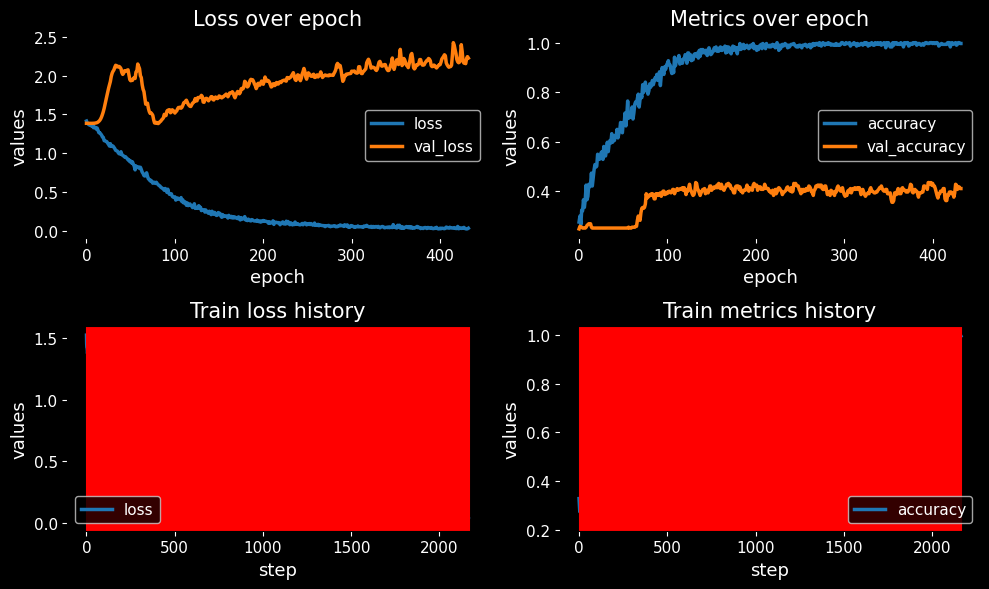


Epoch 173: val_accuracy did not improve from 0.40625

Epoch 393: val_accuracy did not improve from 0.40972

Epoch 191: val_accuracy did not improve from 0.47917

Epoch 174: val_accuracy did not improve from 0.40625

Epoch 394: val_accuracy did not improve from 0.40972

Epoch 192: val_accuracy did not improve from 0.47917

Epoch 175: val_accuracy did not improve from 0.40625

Epoch 395: val_accuracy did not improve from 0.40972
Model `atcnet_orig_norm-no_clean_ch-9_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4340277777777778, 'test_subj-BCI-IV 2a-3_accuracy': 0.4340277777777778}


 55%|████████████████████████████████████████████▉                                     | 68/124 [23:52<54:36, 58.51s/it]


Epoch 193: val_accuracy did not improve from 0.47917

Epoch 176: val_accuracy did not improve from 0.40625

Epoch 396: val_accuracy did not improve from 0.40972

Epoch 194: val_accuracy did not improve from 0.47917

Epoch 177: val_accuracy did not improve from 0.40625

Epoch 397: val_accuracy did not improve from 0.40972

Epoch 195: val_accuracy did not improve from 0.47917

Epoch 178: val_accuracy did not improve from 0.40625

Epoch 398: val_accuracy did not improve from 0.40972

Epoch 196: val_accuracy did not improve from 0.47917

Epoch 179: val_accuracy did not improve from 0.40625

Epoch 399: val_accuracy did not improve from 0.40972

Epoch 197: val_accuracy did not improve from 0.47917

Epoch 180: val_accuracy did not improve from 0.40625

Epoch 400: val_accuracy did not improve from 0.40972

Epoch 198: val_accuracy did not improve from 0.47917

Epoch 181: val_accuracy did not improve from 0.40625

Epoch 401: val_accuracy did not improve from 0.40972

Epoch 199: val_accuracy did

2024-02-16 10:48:59.066917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 411: val_accuracy did not improve from 0.40972

Epoch 209: val_accuracy did not improve from 0.47917

Epoch 192: val_accuracy did not improve from 0.40625

Epoch 412: val_accuracy did not improve from 0.40972

Epoch 210: val_accuracy did not improve from 0.47917

Epoch 193: val_accuracy did not improve from 0.40625

Epoch 413: val_accuracy did not improve from 0.40972

Epoch 211: val_accuracy did not improve from 0.47917
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions

2024-02-16 10:49:12.907050: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 248: val_accuracy did not improve from 0.47917

Epoch 231: val_accuracy did not improve from 0.40625

Epoch 249: val_accuracy did not improve from 0.47917

Epoch 232: val_accuracy did not improve from 0.40625

Epoch 250: val_accuracy did not improve from 0.47917

Epoch 233: val_accuracy did not improve from 0.40625


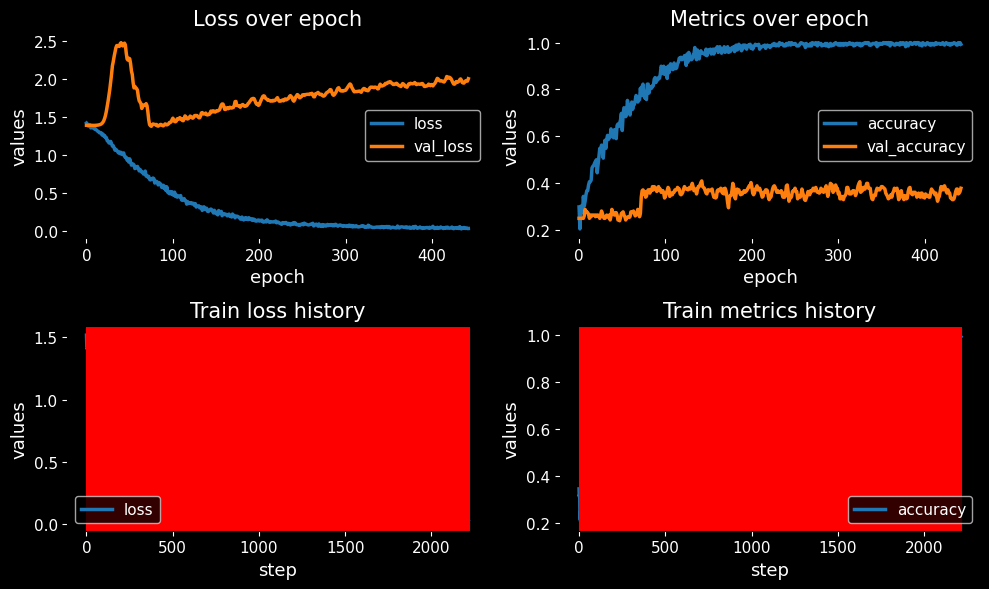


Epoch 251: val_accuracy did not improve from 0.47917

Epoch 234: val_accuracy did not improve from 0.40625

Epoch 252: val_accuracy did not improve from 0.47917

Epoch 235: val_accuracy did not improve from 0.40625

Epoch 253: val_accuracy did not improve from 0.47917


2024-02-16 10:49:14.693736: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 236: val_accuracy did not improve from 0.40625
Model `atcnet_orig_norm-no_clean_ch-10_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4097222222222222, 'test_subj-BCI-IV 2a-1_accuracy': 0.4097222222222222}


 56%|█████████████████████████████████████████████▋                                    | 69/124 [24:13<43:22, 47.31s/it]


Epoch 254: val_accuracy did not improve from 0.47917

Epoch 237: val_accuracy did not improve from 0.40625

Epoch 255: val_accuracy did not improve from 0.47917

Epoch 238: val_accuracy did not improve from 0.40625

Epoch 256: val_accuracy did not improve from 0.47917

Epoch 239: val_accuracy did not improve from 0.40625


2024-02-16 10:49:15.972252: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789c0e5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:49:15.972275: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:49:15.976741: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076956.062939 3300604 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 257: val_accuracy did not improve from 0.47917

Epoch 240: val_accuracy did not improve from 0.40625

Epoch 258: val_accuracy did not improve from 0.47917

Epoch 241: val_accuracy did not improve from 0.40625

Epoch 259: val_accuracy did not improve from 0.47917

Epoch 242: val_accuracy did not improve from 0.40625

Epoch 260: val_accuracy did not improve from 0.47917

Epoch 243: val_accuracy did not improve from 0.40625

Epoch 261: val_accuracy did not improve from 0.47917

Epoch 244: val_accuracy did not improve from 0.40625

Epoch 262: val_accuracy did not improve from 0.47917

Epoch 245: val_accuracy did not improve from 0.40625

Epoch 263: val_accuracy did not improve from 0.47917

Epoch 246: val_accuracy did not improve from 0.40625

Epoch 264: val_accuracy did not improve from 0.47917

Epoch 247: val_accuracy did not improve from 0.40625

Epoch 265: val_accuracy did not improve from 0.47917

Epoch 248: val_accuracy did not improve from 0.40625

Epoch 266: val_accuracy did

2024-02-16 10:49:20.116381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 269: val_accuracy did not improve from 0.47917

Epoch 252: val_accuracy did not improve from 0.40625

Epoch 270: val_accuracy did not improve from 0.47917

Epoch 253: val_accuracy did not improve from 0.40625

Epoch 271: val_accuracy did not improve from 0.47917
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Epoch 254: val_accuracy did not improve from 0.40625

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s

2024-02-16 10:49:33.773760: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 291: val_accuracy did not improve from 0.40625

Epoch 15: val_accuracy did not improve from 0.33333

Epoch 309: val_accuracy did not improve from 0.47917

Epoch 292: val_accuracy did not improve from 0.40625

Epoch 310: val_accuracy did not improve from 0.47917

Epoch 16: val_accuracy did not improve from 0.33333

Epoch 293: val_accuracy did not improve from 0.40625

Epoch 311: val_accuracy did not improve from 0.47917

Epoch 17: val_accuracy did not improve from 0.33333

Epoch 294: val_accuracy did not improve from 0.40625

Epoch 312: val_accuracy did not improve from 0.47917

Epoch 18: val_accuracy did not improve from 0.33333

Epoch 295: val_accuracy did not improve from 0.40625

Epoch 19: val_accuracy did not improve from 0.33333

Epoch 313: val_accuracy did not improve from 0.47917

Epoch 296: val_accuracy did not improve from 0.40625


2024-02-16 10:49:35.625707: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 20: val_accuracy did not improve from 0.33333

Epoch 314: val_accuracy did not improve from 0.47917

Epoch 297: val_accuracy did not improve from 0.40625

Epoch 21: val_accuracy did not improve from 0.33333

Epoch 315: val_accuracy did not improve from 0.47917

Epoch 298: val_accuracy did not improve from 0.40625

Epoch 22: val_accuracy did not improve from 0.33333

Epoch 316: val_accuracy did not improve from 0.47917

Epoch 299: val_accuracy did not improve from 0.40625

Epoch 23: val_accuracy did not improve from 0.33333

Epoch 317: val_accuracy did not improve from 0.47917

Epoch 300: val_accuracy did not improve from 0.40625


2024-02-16 10:49:37.078108: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c03080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:49:37.078136: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:49:37.083330: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708076977.177160 3308276 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 24: val_accuracy did not improve from 0.33333

Epoch 318: val_accuracy did not improve from 0.47917

Epoch 301: val_accuracy did not improve from 0.40625

Epoch 25: val_accuracy did not improve from 0.33333

Epoch 319: val_accuracy did not improve from 0.47917

Epoch 302: val_accuracy did not improve from 0.40625

Epoch 26: val_accuracy did not improve from 0.33333

Epoch 320: val_accuracy did not improve from 0.47917

Epoch 303: val_accuracy did not improve from 0.40625

Epoch 27: val_accuracy did not improve from 0.33333

Epoch 321: val_accuracy did not improve from 0.47917

Epoch 304: val_accuracy did not improve from 0.40625

Epoch 28: val_accuracy did not improve from 0.33333

Epoch 322: val_accuracy did not improve from 0.47917

Epoch 305: val_accuracy did not improve from 0.40625

Epoch 29: val_accuracy did not improve from 0.33333

Epoch 323: val_accuracy did not improve from 0.47917

Epoch 306: val_accuracy did not improve from 0.40625

Epoch 30: val_accuracy did not im

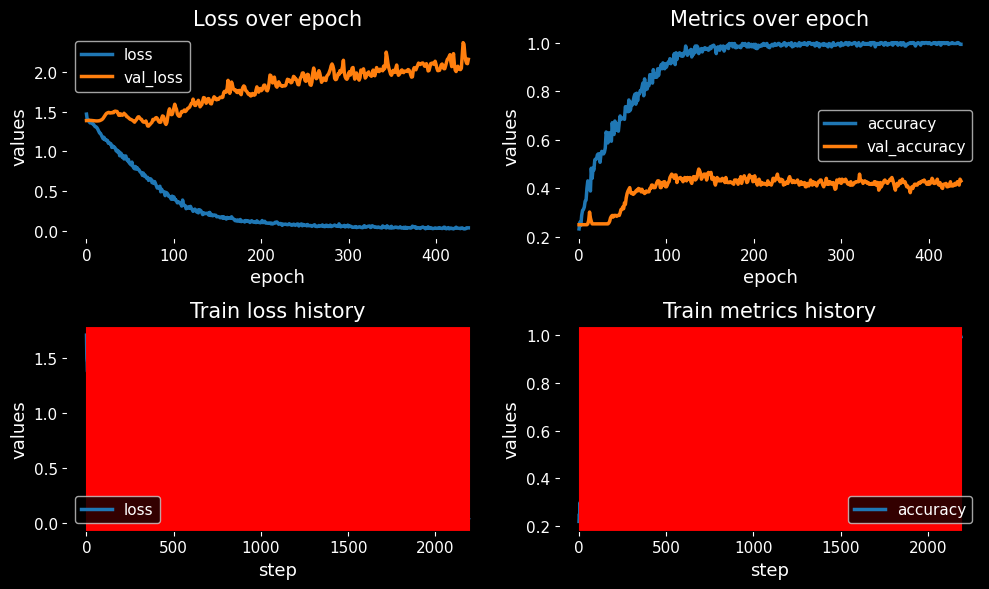


Epoch 145: val_accuracy did not improve from 0.51389

Epoch 86: val_accuracy did not improve from 0.38542

Epoch 146: val_accuracy did not improve from 0.51389

Epoch 87: val_accuracy did not improve from 0.38542

Epoch 147: val_accuracy did not improve from 0.51389

Epoch 88: val_accuracy did not improve from 0.38542
Model `atcnet_orig_norm-no_clean_ch-10_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4791666666666667, 'test_subj-BCI-IV 2a-3_accuracy': 0.4791666666666667}


 56%|██████████████████████████████████████████████▎                                   | 70/124 [25:23<48:47, 54.21s/it]

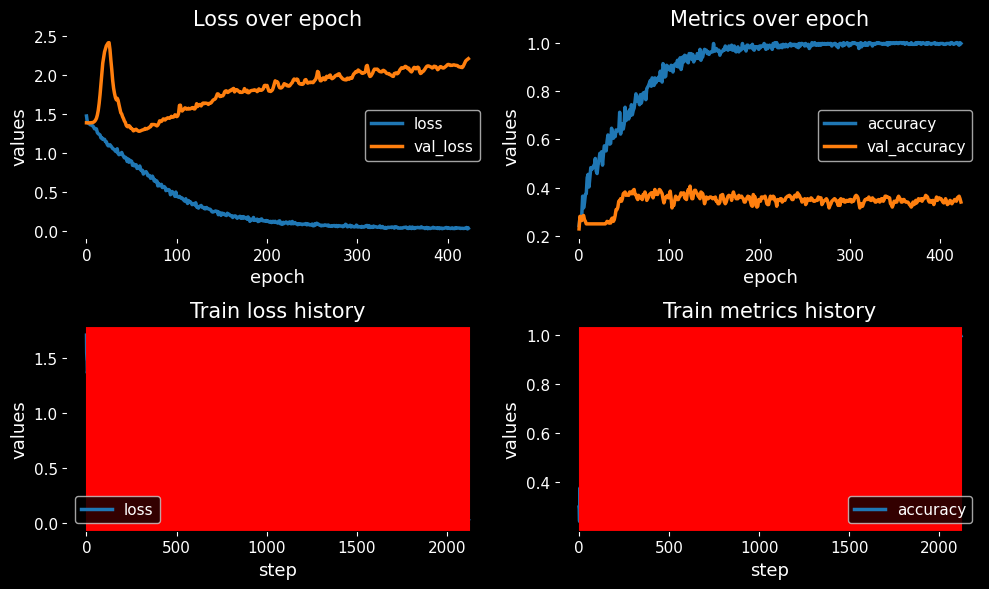


Epoch 148: val_accuracy did not improve from 0.51389

Epoch 89: val_accuracy did not improve from 0.38542

Epoch 149: val_accuracy did not improve from 0.51389

Epoch 90: val_accuracy did not improve from 0.38542

Epoch 150: val_accuracy did not improve from 0.51389

Epoch 91: val_accuracy did not improve from 0.38542
Model `atcnet_orig_norm-no_clean_ch-11_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.40625, 'test_subj-BCI-IV 2a-1_accuracy': 0.40625}


 57%|██████████████████████████████████████████████▉                                   | 71/124 [25:24<33:47, 38.25s/it]


Epoch 151: val_accuracy did not improve from 0.51389

Epoch 92: val_accuracy did not improve from 0.38542

Epoch 152: val_accuracy did not improve from 0.51389

Epoch 93: val_accuracy did not improve from 0.38542

Epoch 153: val_accuracy did not improve from 0.51389

Epoch 94: val_accuracy did not improve from 0.38542

Epoch 154: val_accuracy did not improve from 0.51389

Epoch 95: val_accuracy did not improve from 0.38542

Epoch 155: val_accuracy did not improve from 0.51389

Epoch 96: val_accuracy did not improve from 0.38542

Epoch 156: val_accuracy did not improve from 0.51389

Epoch 97: val_accuracy did not improve from 0.38542

Epoch 157: val_accuracy did not improve from 0.51389

Epoch 98: val_accuracy did not improve from 0.38542

Epoch 158: val_accuracy did not improve from 0.51389

Epoch 99: val_accuracy did not improve from 0.38542

Epoch 159: val_accuracy did not improve from 0.51389

Epoch 100: val_accuracy did not improve from 0.38542

Epoch 160: val_accuracy did not imp

2024-02-16 10:50:30.466957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 105: val_accuracy did not improve from 0.38542

Epoch 165: val_accuracy did not improve from 0.51389

Epoch 106: val_accuracy did not improve from 0.38542

Epoch 166: val_accuracy did not improve from 0.51389

Epoch 107: val_accuracy did not improve from 0.38542
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and

2024-02-16 10:50:35.578919: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 121: val_accuracy did not improve from 0.38542

Epoch 180: val_accuracy did not improve from 0.52431

Epoch 122: val_accuracy did not improve from 0.38542

Epoch 181: val_accuracy did not improve from 0.52431
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcn

 57%|██████████████████████████████████████████████▉                                   | 71/124 [25:40<33:47, 38.25s/it]


Epoch 197: val_accuracy did not improve from 0.52431

Epoch 139: val_accuracy did not improve from 0.38542

Epoch 198: val_accuracy did not improve from 0.52431

Epoch 140: val_accuracy did not improve from 0.38542

Epoch 199: val_accuracy did not improve from 0.52431

Epoch 141: val_accuracy did not improve from 0.38542

Epoch 200: val_accuracy did not improve from 0.52431

Epoch 142: val_accuracy did not improve from 0.38542

Epoch 201: val_accuracy did not improve from 0.52431

Epoch 143: val_accuracy did not improve from 0.38542

Epoch 202: val_accuracy did not improve from 0.52431

Epoch 144: val_accuracy did not improve from 0.38542

Epoch 203: val_accuracy did not improve from 0.52431


2024-02-16 10:50:43.765281: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 145: val_accuracy did not improve from 0.38542

Epoch 204: val_accuracy did not improve from 0.52431

Epoch 146: val_accuracy did not improve from 0.38542

Epoch 205: val_accuracy did not improve from 0.52431

Epoch 147: val_accuracy did not improve from 0.38542

Epoch 206: val_accuracy did not improve from 0.52431

Epoch 148: val_accuracy did not improve from 0.38542

Epoch 207: val_accuracy did not improve from 0.52431

Epoch 149: val_accuracy did not improve from 0.38542

Epoch 208: val_accuracy did not improve from 0.52431


2024-02-16 10:50:45.536736: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 150: val_accuracy did not improve from 0.38542

Epoch 209: val_accuracy did not improve from 0.52431

Epoch 151: val_accuracy did not improve from 0.38542

Epoch 210: val_accuracy did not improve from 0.52431

Epoch 152: val_accuracy did not improve from 0.38542

Epoch 211: val_accuracy did not improve from 0.52431

Epoch 153: val_accuracy did not improve from 0.38542

Epoch 212: val_accuracy did not improve from 0.52431


2024-02-16 10:50:46.853816: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c03600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:50:46.853842: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:50:46.858866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077046.949951 3336291 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 154: val_accuracy did not improve from 0.38542

Epoch 213: val_accuracy did not improve from 0.52431

Epoch 155: val_accuracy did not improve from 0.38542

Epoch 214: val_accuracy did not improve from 0.52431

Epoch 156: val_accuracy did not improve from 0.38542

Epoch 215: val_accuracy did not improve from 0.52431

Epoch 157: val_accuracy did not improve from 0.38542

Epoch 216: val_accuracy did not improve from 0.52431

Epoch 158: val_accuracy did not improve from 0.38542

Epoch 217: val_accuracy did not improve from 0.52431

Epoch 159: val_accuracy did not improve from 0.38542

Epoch 218: val_accuracy did not improve from 0.52431

Epoch 160: val_accuracy did not improve from 0.38542


2024-02-16 10:50:49.366150: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 219: val_accuracy did not improve from 0.52431

Epoch 161: val_accuracy did not improve from 0.38542

Epoch 220: val_accuracy did not improve from 0.52431

Epoch 162: val_accuracy did not improve from 0.38542

Epoch 221: val_accuracy did not improve from 0.52431

Epoch 163: val_accuracy did not improve from 0.38542

Epoch 222: val_accuracy did not improve from 0.52431

Epoch 164: val_accuracy did not improve from 0.38542

Epoch 223: val_accuracy did not improve from 0.52431

Epoch 165: val_accuracy did not improve from 0.38542

Epoch 224: val_accuracy did not improve from 0.52431


2024-02-16 10:50:51.197732: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 166: val_accuracy did not improve from 0.38542

Epoch 225: val_accuracy did not improve from 0.52431

Epoch 167: val_accuracy did not improve from 0.38542

Epoch 226: val_accuracy did not improve from 0.52431

Epoch 168: val_accuracy did not improve from 0.38542

Epoch 227: val_accuracy did not improve from 0.52431

Epoch 169: val_accuracy did not improve from 0.38542

Epoch 228: val_accuracy did not improve from 0.52431


2024-02-16 10:50:52.583825: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3785c08ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:50:52.583852: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:50:52.588582: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077052.683030 3337632 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 170: val_accuracy did not improve from 0.38542

Epoch 229: val_accuracy did not improve from 0.52431

Epoch 171: val_accuracy did not improve from 0.38542

Epoch 230: val_accuracy did not improve from 0.52431

Epoch 172: val_accuracy did not improve from 0.38542

Epoch 231: val_accuracy did not improve from 0.52431

Epoch 173: val_accuracy did not improve from 0.38542

Epoch 232: val_accuracy did not improve from 0.52431

Epoch 174: val_accuracy did not improve from 0.38542

Epoch 233: val_accuracy did not improve from 0.52431

Epoch 175: val_accuracy did not improve from 0.38542

Epoch 234: val_accuracy did not improve from 0.52431

Epoch 176: val_accuracy did not improve from 0.38542

Epoch 235: val_accuracy did not improve from 0.52431

Epoch 177: val_accuracy did not improve from 0.38542

Epoch 236: val_accuracy did not improve from 0.52431

Epoch 178: val_accuracy did not improve from 0.38542

Epoch 237: val_accuracy did not improve from 0.52431

Epoch 179: val_accuracy did

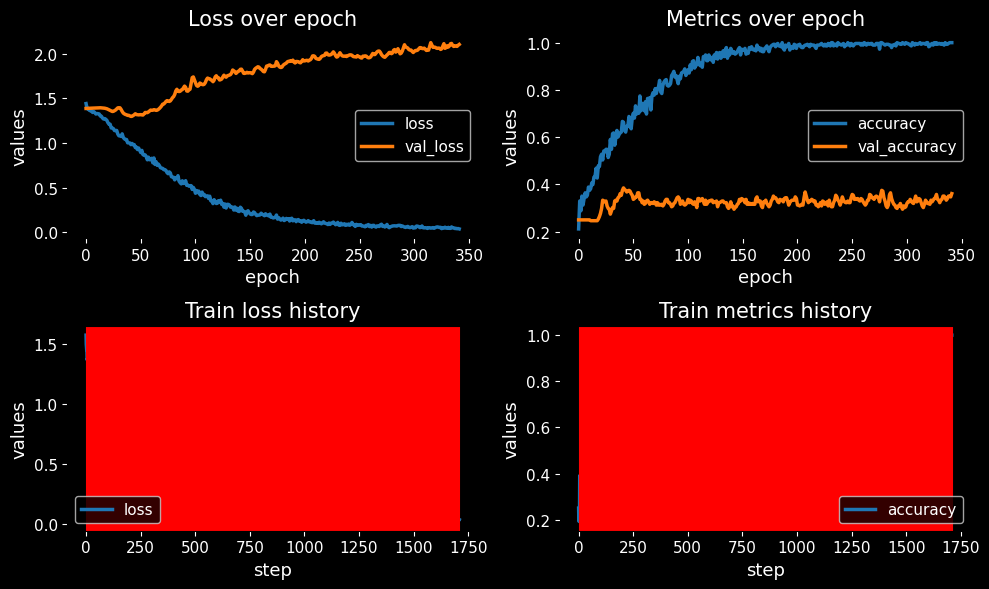


Epoch 410: val_accuracy did not improve from 0.52431

Epoch 140: val_accuracy did not improve from 0.48958

Epoch 165: val_accuracy did not improve from 0.52083

Epoch 411: val_accuracy did not improve from 0.52431

Epoch 141: val_accuracy did not improve from 0.48958

Epoch 166: val_accuracy did not improve from 0.52083

Epoch 412: val_accuracy did not improve from 0.52431

Epoch 142: val_accuracy did not improve from 0.48958

Epoch 167: val_accuracy did not improve from 0.52083
Model `atcnet_orig_norm-no_clean_ch-12_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.3854166666666667, 'test_subj-BCI-IV 2a-1_accuracy': 0.3854166666666667}


 58%|███████████████████████████████████████████████▌                                  | 72/124 [26:57<47:27, 54.77s/it]


Epoch 413: val_accuracy did not improve from 0.52431

Epoch 143: val_accuracy did not improve from 0.48958

Epoch 168: val_accuracy did not improve from 0.52083

Epoch 414: val_accuracy did not improve from 0.52431

Epoch 144: val_accuracy did not improve from 0.48958

Epoch 169: val_accuracy did not improve from 0.52083

Epoch 415: val_accuracy did not improve from 0.52431

Epoch 145: val_accuracy did not improve from 0.48958

Epoch 170: val_accuracy did not improve from 0.52083

Epoch 416: val_accuracy did not improve from 0.52431

Epoch 146: val_accuracy did not improve from 0.48958

Epoch 171: val_accuracy did not improve from 0.52083

Epoch 417: val_accuracy did not improve from 0.52431

Epoch 147: val_accuracy did not improve from 0.48958

Epoch 172: val_accuracy did not improve from 0.52083

Epoch 418: val_accuracy did not improve from 0.52431

Epoch 148: val_accuracy did not improve from 0.48958

Epoch 173: val_accuracy did not improve from 0.52083

Epoch 419: val_accuracy did

2024-02-16 10:52:04.764035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 183: val_accuracy did not improve from 0.52083

Epoch 429: val_accuracy did not improve from 0.52431

Epoch 159: val_accuracy did not improve from 0.48958

Epoch 184: val_accuracy did not improve from 0.52083

Epoch 430: val_accuracy did not improve from 0.52431

Epoch 160: val_accuracy did not improve from 0.48958

Epoch 185: val_accuracy did not improve from 0.52083
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in v

2024-02-16 10:52:18.678727: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 222: val_accuracy did not improve from 0.52083

Epoch 198: val_accuracy did not improve from 0.48958

Epoch 468: val_accuracy did not improve from 0.52431

Epoch 223: val_accuracy did not improve from 0.52083

Epoch 199: val_accuracy did not improve from 0.48958

Epoch 469: val_accuracy did not improve from 0.52431

Epoch 224: val_accuracy did not improve from 0.52083

Epoch 200: val_accuracy did not improve from 0.48958

Epoch 470: val_accuracy did not improve from 0.52431

Epoch 225: val_accuracy did not improve from 0.52083

Epoch 201: val_accuracy did not improve from 0.48958

Epoch 471: val_accuracy did not improve from 0.52431

Epoch 226: val_accuracy did not improve from 0.52083

Epoch 202: val_accuracy did not improve from 0.48958

Epoch 472: val_accuracy did not improve from 0.52431

Epoch 227: val_accuracy did not improve from 0.52083


2024-02-16 10:52:20.539555: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 203: val_accuracy did not improve from 0.48958

Epoch 473: val_accuracy did not improve from 0.52431

Epoch 228: val_accuracy did not improve from 0.52083

Epoch 204: val_accuracy did not improve from 0.48958

Epoch 474: val_accuracy did not improve from 0.52431
Epoch 473 : Early stopping !
Epoch 474: early stopping
Training finished after 3min 18sec !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-11_subj-3_run-10_scenario-3/saving/model.json !

Epoch 229: val_accuracy did not improve from 0.52083

Epoch 205: val_accuracy did not improve from 0.48958

Epoch 230: val_accuracy did not improve from 0.52083

Epoch 206: val_accuracy did not improve from 0.48958
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 231: val_accuracy did not improve from 0.52083


2024-02-16 10:52:21.923897: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c03210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:52:21.923924: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:52:21.928272: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077142.018763 3374930 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 207: val_accuracy did not improve from 0.48958

Epoch 232: val_accuracy did not improve from 0.52083

Epoch 208: val_accuracy did not improve from 0.48958

Epoch 233: val_accuracy did not improve from 0.52083

Epoch 209: val_accuracy did not improve from 0.48958

Epoch 234: val_accuracy did not improve from 0.52083

Epoch 210: val_accuracy did not improve from 0.48958

Epoch 235: val_accuracy did not improve from 0.52083

Epoch 211: val_accuracy did not improve from 0.48958

Epoch 236: val_accuracy did not improve from 0.52083

Epoch 212: val_accuracy did not improve from 0.48958

Epoch 237: val_accuracy did not improve from 0.52083

Epoch 213: val_accuracy did not improve from 0.48958

Epoch 238: val_accuracy did not improve from 0.52083

Epoch 214: val_accuracy did not improve from 0.48958


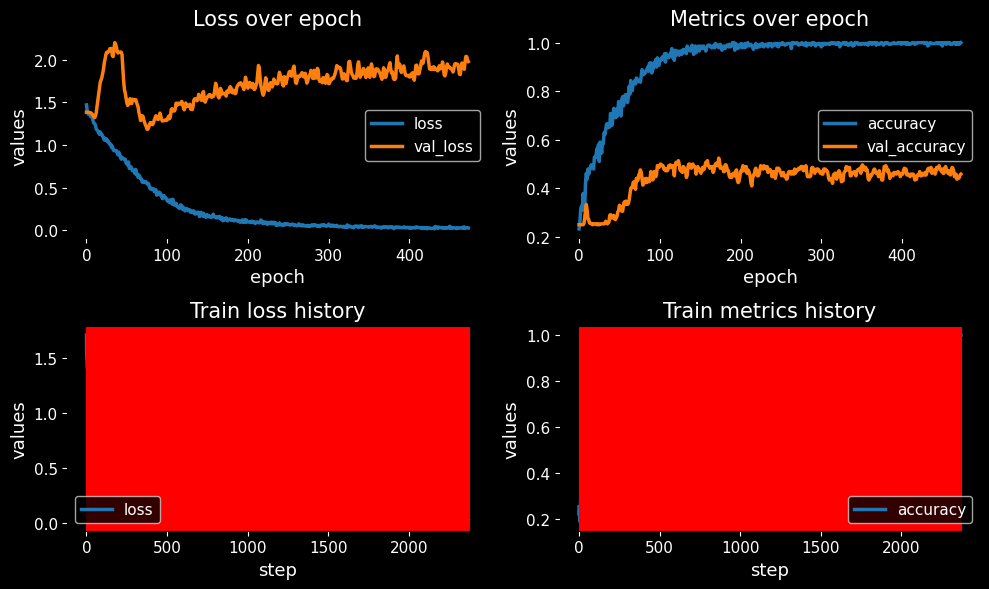


Epoch 239: val_accuracy did not improve from 0.52083

Epoch 215: val_accuracy did not improve from 0.48958

Epoch 240: val_accuracy did not improve from 0.52083

Epoch 216: val_accuracy did not improve from 0.48958
Model `atcnet_orig_norm-no_clean_ch-11_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5243055555555556, 'test_subj-BCI-IV 2a-3_accuracy': 0.5243055555555556}


 59%|████████████████████████████████████████████████▎                                 | 73/124 [27:24<39:15, 46.19s/it]


Epoch 241: val_accuracy did not improve from 0.52083

Epoch 217: val_accuracy did not improve from 0.48958

Epoch 242: val_accuracy did not improve from 0.52083

Epoch 218: val_accuracy did not improve from 0.48958

Epoch 243: val_accuracy did not improve from 0.52083

Epoch 219: val_accuracy did not improve from 0.48958

Epoch 244: val_accuracy did not improve from 0.52083

Epoch 220: val_accuracy did not improve from 0.48958

Epoch 245: val_accuracy did not improve from 0.52083

Epoch 221: val_accuracy did not improve from 0.48958

Epoch 246: val_accuracy did not improve from 0.52083

Epoch 222: val_accuracy did not improve from 0.48958

Epoch 247: val_accuracy did not improve from 0.52083

Epoch 223: val_accuracy did not improve from 0.48958

Epoch 248: val_accuracy did not improve from 0.52083

Epoch 224: val_accuracy did not improve from 0.48958

Epoch 249: val_accuracy did not improve from 0.52083

Epoch 225: val_accuracy did not improve from 0.48958

Epoch 250: val_accuracy did

2024-02-16 10:52:30.905556: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 257: val_accuracy did not improve from 0.52083

Epoch 233: val_accuracy did not improve from 0.48958

Epoch 258: val_accuracy did not improve from 0.52083

Epoch 234: val_accuracy did not improve from 0.48958

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-13_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 259: val_accuracy did not improve from 0.52083

Epoch 235: val_accuracy did not improve from 0.48958
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - #

2024-02-16 10:52:44.674211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 30: val_accuracy did not improve from 0.40278

Epoch 273: val_accuracy did not improve from 0.48958

Epoch 297: val_accuracy did not improve from 0.52083

Epoch 31: val_accuracy did not improve from 0.40278

Epoch 274: val_accuracy did not improve from 0.48958

Epoch 298: val_accuracy did not improve from 0.52083

Epoch 32: val_accuracy did not improve from 0.40278

Epoch 275: val_accuracy did not improve from 0.48958

Epoch 299: val_accuracy did not improve from 0.52083

Epoch 33: val_accuracy did not improve from 0.40278

Epoch 276: val_accuracy did not improve from 0.48958

Epoch 300: val_accuracy did not improve from 0.52083

Epoch 34: val_accuracy did not improve from 0.40278

Epoch 277: val_accuracy did not improve from 0.48958

Epoch 301: val_accuracy did not improve from 0.52083


2024-02-16 10:52:46.517831: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 35: val_accuracy did not improve from 0.40278

Epoch 278: val_accuracy did not improve from 0.48958

Epoch 302: val_accuracy did not improve from 0.52083

Epoch 36: val_accuracy did not improve from 0.40278

Epoch 279: val_accuracy did not improve from 0.48958

Epoch 303: val_accuracy did not improve from 0.52083

Epoch 37: val_accuracy did not improve from 0.40278

Epoch 280: val_accuracy did not improve from 0.48958

Epoch 304: val_accuracy did not improve from 0.52083

Epoch 38: val_accuracy did not improve from 0.40278

Epoch 281: val_accuracy did not improve from 0.48958

Epoch 305: val_accuracy did not improve from 0.52083


2024-02-16 10:52:47.926095: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781be8e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:52:47.926118: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:52:47.930926: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077168.025939 3385379 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 39: val_accuracy did not improve from 0.40278

Epoch 306: val_accuracy did not improve from 0.52083

Epoch 282: val_accuracy did not improve from 0.48958

Epoch 40: val_accuracy did not improve from 0.40278

Epoch 307: val_accuracy did not improve from 0.52083

Epoch 283: val_accuracy did not improve from 0.48958

Epoch 41: val_accuracy did not improve from 0.40278

Epoch 284: val_accuracy did not improve from 0.48958

Epoch 308: val_accuracy did not improve from 0.52083

Epoch 42: val_accuracy did not improve from 0.40278

Epoch 285: val_accuracy did not improve from 0.48958

Epoch 309: val_accuracy did not improve from 0.52083

Epoch 43: val_accuracy did not improve from 0.40278

Epoch 286: val_accuracy did not improve from 0.48958

Epoch 310: val_accuracy did not improve from 0.52083

Epoch 44: val_accuracy did not improve from 0.40278

Epoch 287: val_accuracy did not improve from 0.48958

Epoch 311: val_accuracy did not improve from 0.52083

Epoch 45: val_accuracy did not im

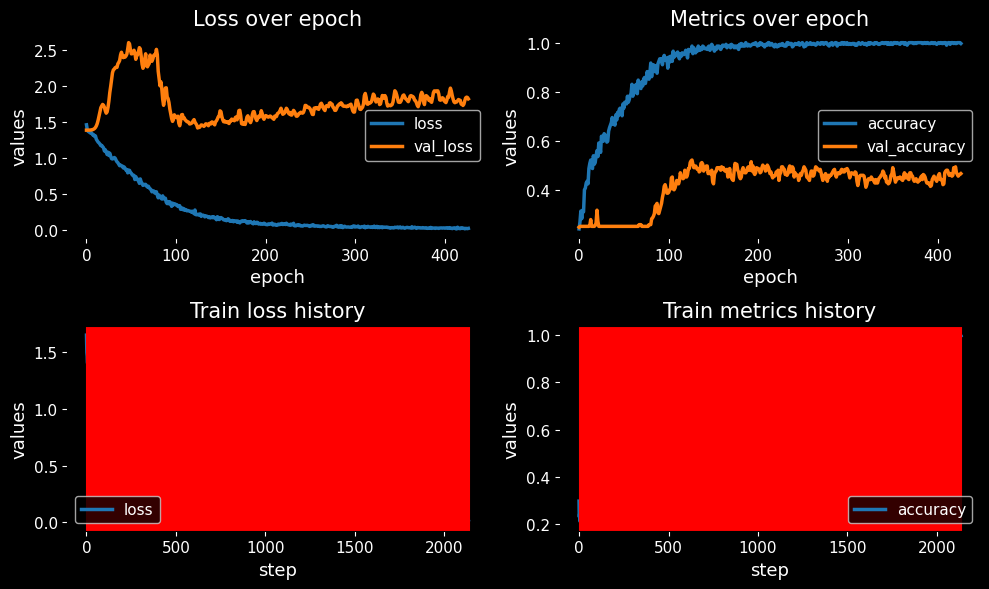


Epoch 67: val_accuracy did not improve from 0.45833

Epoch 160: val_accuracy did not improve from 0.55556

Epoch 413: val_accuracy did not improve from 0.48958

Epoch 68: val_accuracy did not improve from 0.45833

Epoch 414: val_accuracy did not improve from 0.48958

Epoch 161: val_accuracy did not improve from 0.55556

Epoch 69: val_accuracy did not improve from 0.45833

Epoch 415: val_accuracy did not improve from 0.48958
Epoch 414 : Early stopping !
Epoch 415: early stopping
Training finished after 2min 56sec !

Epoch 162: val_accuracy did not improve from 0.55556
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-13_subj-1_run-10_scenario-3/saving/model.json !
Model `atcnet_orig_norm-no_clean_ch-12_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5208333333333334, 'test_subj-BCI-IV 2a-3_accuracy': 0.5208333333333334}


 60%|████████████████████████████████████████████████▉                                 | 74/124 [28:34<44:33, 53.47s/it]


Epoch 70: val_accuracy did not improve from 0.45833

Epoch 163: val_accuracy did not improve from 0.55556

Epoch 71: val_accuracy did not improve from 0.45833

Epoch 164: val_accuracy did not improve from 0.55556
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 72: val_accuracy did not improve from 0.45833

Epoch 165: val_accuracy did not improve from 0.55556

Epoch 73: val_accuracy did not improve from 0.45833

Epoch 166: val_accuracy did not improve from 0.55556

Epoch 74: val_accuracy did not improve from 0.45833

Epoch 167: val_accuracy did not improve from 0.55556

Epoch 75: val_accuracy did not improve from 0.45833

Epoch 168: val_accuracy did not improve from 0.55556

Epoch 76: val_accuracy did not improve from 0.45833

Epoch 169: val_accuracy did not improve from 0.55556

Epoch 77: val_accuracy did not improve from 0.45833

Epoch 170: val_accuracy did not improve from 0.55556

Epoch 78: val_accuracy did not improve from 0

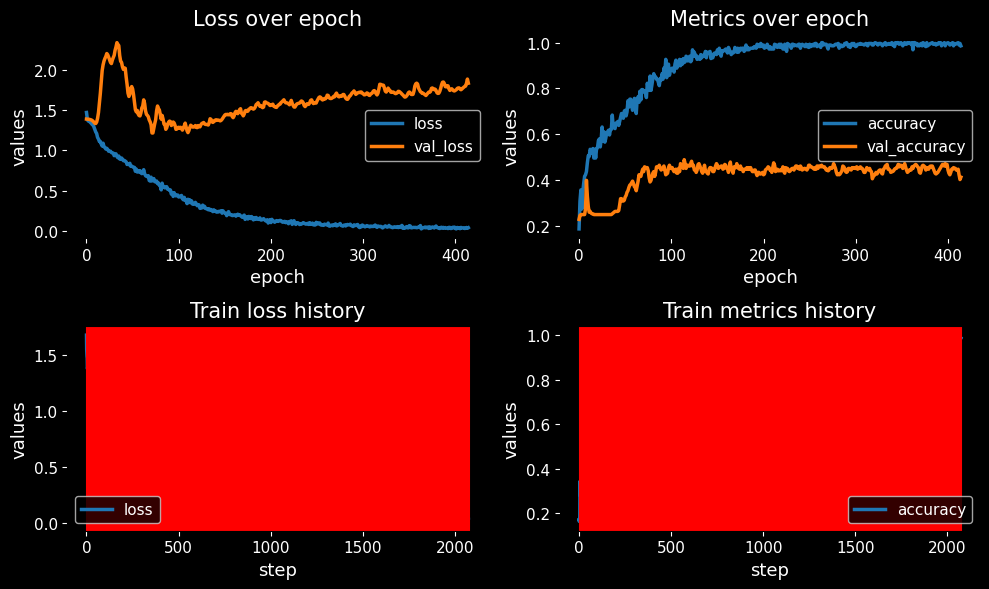


Epoch 79: val_accuracy did not improve from 0.45833

Epoch 172: val_accuracy did not improve from 0.55556

Epoch 80: val_accuracy did not improve from 0.45833

Epoch 173: val_accuracy did not improve from 0.55556

Epoch 81: val_accuracy did not improve from 0.45833

Epoch 174: val_accuracy did not improve from 0.55556
Model `atcnet_orig_norm-no_clean_ch-13_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4895833333333333, 'test_subj-BCI-IV 2a-1_accuracy': 0.4895833333333333}


 60%|█████████████████████████████████████████████████▌                                | 75/124 [28:38<31:32, 38.62s/it]


Epoch 82: val_accuracy did not improve from 0.45833

Epoch 175: val_accuracy did not improve from 0.55556

Epoch 83: val_accuracy did not improve from 0.45833

Epoch 176: val_accuracy did not improve from 0.55556

Epoch 84: val_accuracy did not improve from 0.45833

Epoch 177: val_accuracy did not improve from 0.55556

Epoch 85: val_accuracy did not improve from 0.45833

Epoch 178: val_accuracy did not improve from 0.55556
Loading dataset bciiv2a...


2024-02-16 10:53:41.384846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 86: val_accuracy did not improve from 0.45833

Epoch 179: val_accuracy did not improve from 0.55556

Epoch 87: val_accuracy did not improve from 0.45833

Epoch 180: val_accuracy did not improve from 0.55556

Epoch 88: val_accuracy did not improve from 0.45833

Epoch 181: val_accuracy did not improve from 0.55556
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) i

2024-02-16 10:53:46.499342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 102: val_accuracy did not improve from 0.45833

Epoch 195: val_accuracy did not improve from 0.55556

Epoch 103: val_accuracy did not improve from 0.45833

Epoch 196: val_accuracy did not improve from 0.55556

Epoch 104: val_accuracy did not improve from 0.45833

Epoch 197: val_accuracy did not improve from 0.55556
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s

 60%|█████████████████████████████████████████████████▌                                | 75/124 [28:50<31:32, 38.62s/it]


Epoch 210: val_accuracy did not improve from 0.55556

Epoch 117: val_accuracy did not improve from 0.45833

Epoch 211: val_accuracy did not improve from 0.55556

Epoch 118: val_accuracy did not improve from 0.45833

Epoch 119: val_accuracy did not improve from 0.45833

Epoch 212: val_accuracy did not improve from 0.55556

Epoch 120: val_accuracy did not improve from 0.45833

Epoch 213: val_accuracy did not improve from 0.55556

Epoch 121: val_accuracy did not improve from 0.45833

Epoch 214: val_accuracy did not improve from 0.55556

Epoch 122: val_accuracy did not improve from 0.45833

Epoch 215: val_accuracy did not improve from 0.55556

Epoch 123: val_accuracy did not improve from 0.45833

Epoch 216: val_accuracy did not improve from 0.55556

Epoch 124: val_accuracy did not improve from 0.45833

Epoch 217: val_accuracy did not improve from 0.55556

Epoch 125: val_accuracy did not improve from 0.45833

Epoch 218: val_accuracy did not improve from 0.55556


2024-02-16 10:53:54.708861: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 126: val_accuracy did not improve from 0.45833

Epoch 219: val_accuracy did not improve from 0.55556

Epoch 127: val_accuracy did not improve from 0.45833

Epoch 220: val_accuracy did not improve from 0.55556

Epoch 128: val_accuracy did not improve from 0.45833

Epoch 221: val_accuracy did not improve from 0.55556

Epoch 222: val_accuracy did not improve from 0.55556

Epoch 129: val_accuracy did not improve from 0.45833

Epoch 223: val_accuracy did not improve from 0.55556

Epoch 130: val_accuracy did not improve from 0.45833

Epoch 224: val_accuracy did not improve from 0.55556

Epoch 131: val_accuracy did not improve from 0.45833


2024-02-16 10:53:56.503640: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 132: val_accuracy did not improve from 0.45833

Epoch 225: val_accuracy did not improve from 0.55556

Epoch 226: val_accuracy did not improve from 0.55556

Epoch 133: val_accuracy did not improve from 0.45833

Epoch 134: val_accuracy did not improve from 0.45833

Epoch 227: val_accuracy did not improve from 0.55556


2024-02-16 10:53:57.841932: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3785bf3610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:53:57.841955: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:53:57.846252: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077237.938168 3412661 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 135: val_accuracy did not improve from 0.45833

Epoch 228: val_accuracy did not improve from 0.55556

Epoch 229: val_accuracy did not improve from 0.55556

Epoch 136: val_accuracy did not improve from 0.45833

Epoch 230: val_accuracy did not improve from 0.55556

Epoch 137: val_accuracy did not improve from 0.45833

Epoch 231: val_accuracy did not improve from 0.55556

Epoch 138: val_accuracy did not improve from 0.45833

Epoch 232: val_accuracy did not improve from 0.55556

Epoch 139: val_accuracy did not improve from 0.45833

Epoch 233: val_accuracy did not improve from 0.55556

Epoch 140: val_accuracy did not improve from 0.45833

Epoch 234: val_accuracy did not improve from 0.55556

Epoch 141: val_accuracy did not improve from 0.45833


2024-02-16 10:54:00.183055: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 235: val_accuracy did not improve from 0.55556

Epoch 142: val_accuracy did not improve from 0.45833

Epoch 236: val_accuracy did not improve from 0.55556

Epoch 143: val_accuracy did not improve from 0.45833

Epoch 237: val_accuracy did not improve from 0.55556

Epoch 144: val_accuracy did not improve from 0.45833

Epoch 238: val_accuracy did not improve from 0.55556

Epoch 145: val_accuracy did not improve from 0.45833

Epoch 239: val_accuracy did not improve from 0.55556

Epoch 146: val_accuracy did not improve from 0.45833


2024-02-16 10:54:02.015439: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 240: val_accuracy did not improve from 0.55556

Epoch 147: val_accuracy did not improve from 0.45833

Epoch 241: val_accuracy did not improve from 0.55556

Epoch 148: val_accuracy did not improve from 0.45833

Epoch 242: val_accuracy did not improve from 0.55556

Epoch 149: val_accuracy did not improve from 0.45833

Epoch 243: val_accuracy did not improve from 0.55556

Epoch 150: val_accuracy did not improve from 0.45833


2024-02-16 10:54:03.404262: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc04240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:54:03.404287: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:54:03.408803: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077243.503290 3414002 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 244: val_accuracy did not improve from 0.55556

Epoch 151: val_accuracy did not improve from 0.45833

Epoch 245: val_accuracy did not improve from 0.55556

Epoch 152: val_accuracy did not improve from 0.45833

Epoch 246: val_accuracy did not improve from 0.55556

Epoch 153: val_accuracy did not improve from 0.45833

Epoch 247: val_accuracy did not improve from 0.55556

Epoch 154: val_accuracy did not improve from 0.45833

Epoch 248: val_accuracy did not improve from 0.55556

Epoch 155: val_accuracy did not improve from 0.45833

Epoch 249: val_accuracy did not improve from 0.55556

Epoch 156: val_accuracy did not improve from 0.45833

Epoch 250: val_accuracy did not improve from 0.55556

Epoch 157: val_accuracy did not improve from 0.45833

Epoch 251: val_accuracy did not improve from 0.55556

Epoch 158: val_accuracy did not improve from 0.45833

Epoch 252: val_accuracy did not improve from 0.55556

Epoch 159: val_accuracy did not improve from 0.45833

Epoch 253: val_accuracy did

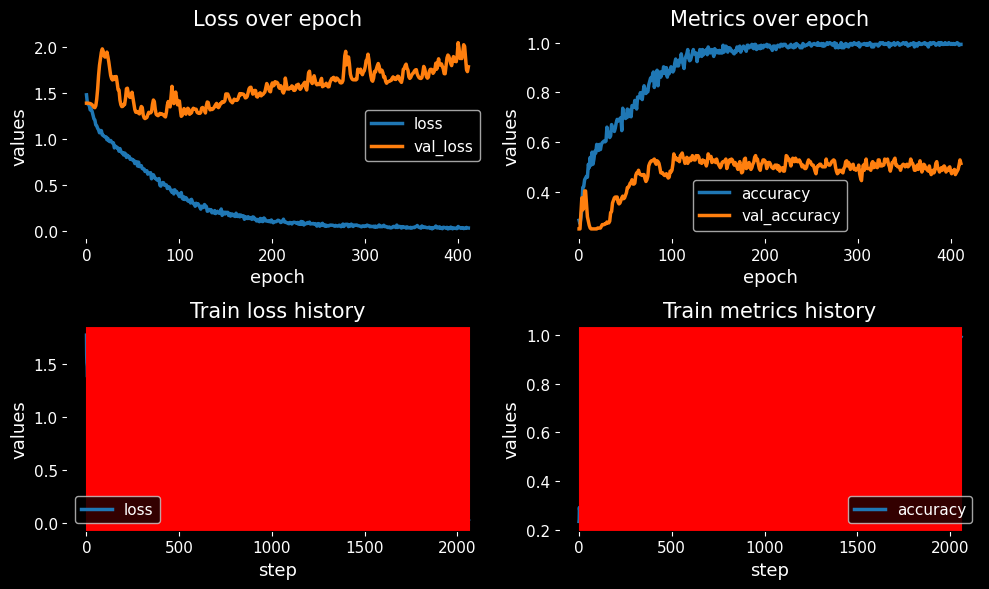


Epoch 151: val_accuracy did not improve from 0.49653

Epoch 147: val_accuracy did not improve from 0.37500

Epoch 329: val_accuracy did not improve from 0.45833

Epoch 152: val_accuracy did not improve from 0.49653

Epoch 148: val_accuracy did not improve from 0.37500

Epoch 330: val_accuracy did not improve from 0.45833

Epoch 153: val_accuracy did not improve from 0.49653

Epoch 149: val_accuracy did not improve from 0.37500

Epoch 331: val_accuracy did not improve from 0.45833
Model `atcnet_orig_norm-no_clean_ch-13_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5555555555555556, 'test_subj-BCI-IV 2a-3_accuracy': 0.5555555555555556}


 61%|██████████████████████████████████████████████████▎                               | 76/124 [30:07<42:55, 53.65s/it]


Epoch 154: val_accuracy did not improve from 0.49653

Epoch 150: val_accuracy did not improve from 0.37500

Epoch 332: val_accuracy did not improve from 0.45833

Epoch 155: val_accuracy did not improve from 0.49653

Epoch 151: val_accuracy did not improve from 0.37500

Epoch 333: val_accuracy did not improve from 0.45833

Epoch 156: val_accuracy did not improve from 0.49653

Epoch 152: val_accuracy did not improve from 0.37500

Epoch 334: val_accuracy did not improve from 0.45833

Epoch 157: val_accuracy did not improve from 0.49653

Epoch 153: val_accuracy did not improve from 0.37500

Epoch 335: val_accuracy did not improve from 0.45833

Epoch 158: val_accuracy did not improve from 0.49653

Epoch 154: val_accuracy did not improve from 0.37500

Epoch 336: val_accuracy did not improve from 0.45833

Epoch 159: val_accuracy did not improve from 0.49653

Epoch 155: val_accuracy did not improve from 0.37500

Epoch 337: val_accuracy did not improve from 0.45833

Epoch 160: val_accuracy did

2024-02-16 10:55:14.081026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 165: val_accuracy did not improve from 0.37500

Epoch 347: val_accuracy did not improve from 0.45833

Epoch 170: val_accuracy did not improve from 0.50000

Epoch 166: val_accuracy did not improve from 0.37500

Epoch 348: val_accuracy did not improve from 0.45833

Epoch 171: val_accuracy did not improve from 0.50000

Epoch 167: val_accuracy did not improve from 0.37500

Epoch 349: val_accuracy did not improve from 0.45833
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions

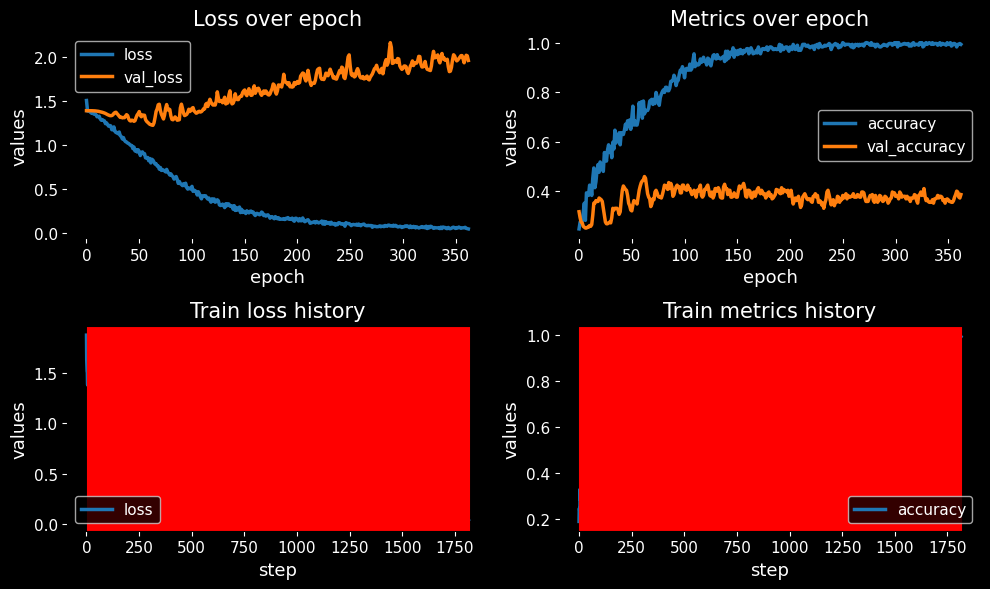


Epoch 191: val_accuracy did not improve from 0.37500

Epoch 195: val_accuracy did not improve from 0.50000

Epoch 192: val_accuracy did not improve from 0.37500

Epoch 196: val_accuracy did not improve from 0.50000

Epoch 193: val_accuracy did not improve from 0.37500

Epoch 197: val_accuracy did not improve from 0.50000
Model `atcnet_orig_norm-no_clean_ch-14_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4583333333333333, 'test_subj-BCI-IV 2a-1_accuracy': 0.4583333333333333}


 62%|██████████████████████████████████████████████████▉                               | 77/124 [30:22<32:57, 42.08s/it]


Epoch 194: val_accuracy did not improve from 0.37500

Epoch 198: val_accuracy did not improve from 0.50000

Epoch 199: val_accuracy did not improve from 0.50000

Epoch 195: val_accuracy did not improve from 0.37500

Epoch 196: val_accuracy did not improve from 0.37500

Epoch 200: val_accuracy did not improve from 0.50000

Epoch 197: val_accuracy did not improve from 0.37500

Epoch 201: val_accuracy did not improve from 0.50000

Epoch 202: val_accuracy did not improve from 0.50000

Epoch 198: val_accuracy did not improve from 0.37500

Epoch 203: val_accuracy did not improve from 0.50000

Epoch 199: val_accuracy did not improve from 0.37500

Epoch 204: val_accuracy did not improve from 0.50000

Epoch 200: val_accuracy improved from 0.37500 to 0.38542, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-15_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 205: val_accuracy did not improve from 0.50000

Epoch 201: val_accuracy did not improve from 0.38542

Epoch 206: va

2024-02-16 10:55:27.585339: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 209: val_accuracy did not improve from 0.50000

Epoch 205: val_accuracy did not improve from 0.38542

Epoch 210: val_accuracy did not improve from 0.50000

Epoch 206: val_accuracy did not improve from 0.38542

Epoch 211: val_accuracy did not improve from 0.50000

Epoch 207: val_accuracy did not improve from 0.38542

Epoch 212: val_accuracy did not improve from 0.50000

Epoch 208: val_accuracy did not improve from 0.38542

Epoch 213: val_accuracy did not improve from 0.50000
Loading dataset bciiv2a...

Epoch 209: val_accuracy did not improve from 0.38542


2024-02-16 10:55:29.143259: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5
2024-02-16 10:55:29.320712: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 214: val_accuracy did not improve from 0.50000

Epoch 210: val_accuracy did not improve from 0.38542

Epoch 215: val_accuracy did not improve from 0.50000

Epoch 211: val_accuracy did not improve from 0.38542

Epoch 216: val_accuracy did not improve from 0.50000
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and

2024-02-16 10:55:30.650338: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bf9e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:55:30.650369: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:55:30.655196: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077330.744379 3450697 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 218: val_accuracy did not improve from 0.50000

Epoch 214: val_accuracy did not improve from 0.38542
Initializing submodel : `model` !

Epoch 219: val_accuracy did not improve from 0.50000
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-1_run-10_scenario-3/saving/model.json !
Model atcnet_orig_norm-no_clean_ch-16_subj-1_run-10_scenario-3 initialized successfully !
Optimizer 'model_optimizer' initilized successfully !
Submodel model compiled !
  Loss : {'reduction': 'none', 'name': 'loss', 'from_logits': True, 'fn': 'sparse_categorical_crossentropy'}
  Optimizer : {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'accuracy', 'dtype': 'float32', 'fn': <function spars

2024-02-16 10:55:42.913245: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 253: val_accuracy did not improve from 0.50694

Epoch 8: val_accuracy did not improve from 0.25347

Epoch 249: val_accuracy did not improve from 0.38542

Epoch 254: val_accuracy did not improve from 0.50694

Epoch 9: val_accuracy did not improve from 0.25347

Epoch 250: val_accuracy did not improve from 0.38542

Epoch 255: val_accuracy did not improve from 0.50694

Epoch 10: val_accuracy did not improve from 0.25347

Epoch 251: val_accuracy did not improve from 0.38542

Epoch 256: val_accuracy did not improve from 0.50694

Epoch 11: val_accuracy did not improve from 0.25347

Epoch 252: val_accuracy did not improve from 0.38542

Epoch 257: val_accuracy did not improve from 0.50694

Epoch 12: val_accuracy did not improve from 0.25347

Epoch 253: val_accuracy did not improve from 0.38542


2024-02-16 10:55:44.743911: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 258: val_accuracy did not improve from 0.50694

Epoch 13: val_accuracy did not improve from 0.25347

Epoch 254: val_accuracy did not improve from 0.38542

Epoch 259: val_accuracy did not improve from 0.50694

Epoch 14: val_accuracy did not improve from 0.25347

Epoch 255: val_accuracy did not improve from 0.38542

Epoch 260: val_accuracy did not improve from 0.50694

Epoch 15: val_accuracy did not improve from 0.25347

Epoch 256: val_accuracy did not improve from 0.38542

Epoch 261: val_accuracy did not improve from 0.50694

Epoch 16: val_accuracy did not improve from 0.25347

Epoch 257: val_accuracy did not improve from 0.38542


2024-02-16 10:55:46.186032: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc03760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:55:46.186057: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:55:46.190849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077346.279969 3454962 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 262: val_accuracy did not improve from 0.50694

Epoch 17: val_accuracy did not improve from 0.25347

Epoch 258: val_accuracy did not improve from 0.38542

Epoch 263: val_accuracy did not improve from 0.50694

Epoch 18: val_accuracy did not improve from 0.25347

Epoch 259: val_accuracy did not improve from 0.38542

Epoch 264: val_accuracy did not improve from 0.50694

Epoch 19: val_accuracy did not improve from 0.25347

Epoch 260: val_accuracy did not improve from 0.38542

Epoch 265: val_accuracy did not improve from 0.50694

Epoch 261: val_accuracy did not improve from 0.38542

Epoch 20: val_accuracy did not improve from 0.25347

Epoch 266: val_accuracy did not improve from 0.50694

Epoch 21: val_accuracy did not improve from 0.25347

Epoch 262: val_accuracy did not improve from 0.38542

Epoch 267: val_accuracy did not improve from 0.50694

Epoch 263: val_accuracy did not improve from 0.38542

Epoch 22: val_accuracy did not improve from 0.25347

Epoch 264: val_accuracy did not i

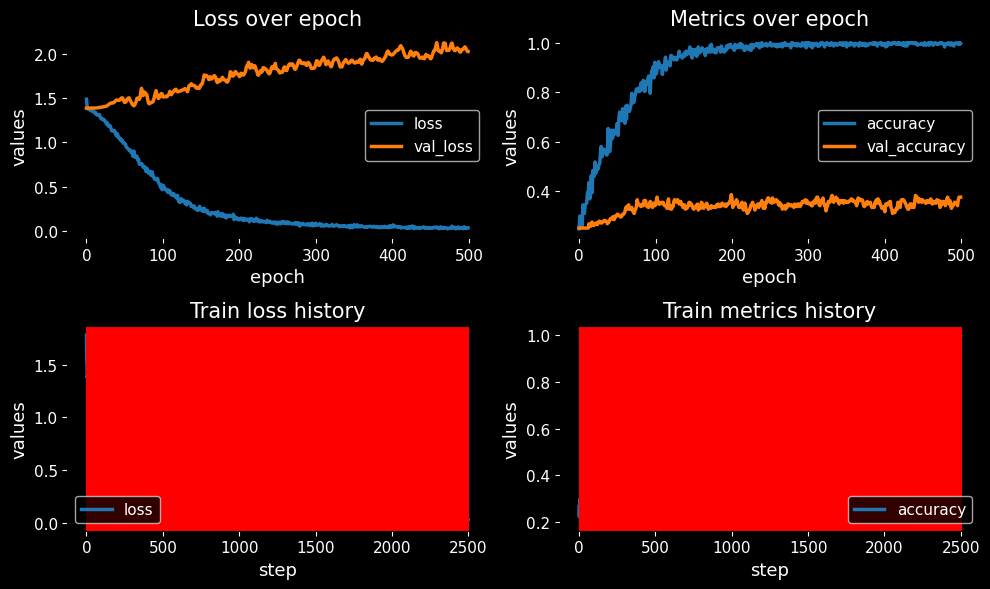


Epoch 264: val_accuracy did not improve from 0.49653

Epoch 223: val_accuracy did not improve from 0.36458

Epoch 515: val_accuracy did not improve from 0.51389

Epoch 265: val_accuracy did not improve from 0.49653

Epoch 224: val_accuracy did not improve from 0.36458

Epoch 516: val_accuracy did not improve from 0.51389

Epoch 266: val_accuracy did not improve from 0.49653

Epoch 225: val_accuracy did not improve from 0.36458
Model `atcnet_orig_norm-no_clean_ch-15_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.3854166666666667, 'test_subj-BCI-IV 2a-1_accuracy': 0.3854166666666667}

Epoch 517: val_accuracy did not improve from 0.51389


 63%|███████████████████████████████████████████████████▌                              | 78/124 [32:17<49:05, 64.03s/it]


Epoch 267: val_accuracy did not improve from 0.49653

Epoch 226: val_accuracy did not improve from 0.36458

Epoch 518: val_accuracy did not improve from 0.51389

Epoch 268: val_accuracy did not improve from 0.49653

Epoch 227: val_accuracy did not improve from 0.36458

Epoch 519: val_accuracy did not improve from 0.51389

Epoch 269: val_accuracy did not improve from 0.49653

Epoch 228: val_accuracy did not improve from 0.36458

Epoch 520: val_accuracy did not improve from 0.51389

Epoch 270: val_accuracy did not improve from 0.49653

Epoch 229: val_accuracy did not improve from 0.36458

Epoch 521: val_accuracy did not improve from 0.51389

Epoch 271: val_accuracy did not improve from 0.49653

Epoch 230: val_accuracy did not improve from 0.36458

Epoch 522: val_accuracy did not improve from 0.51389

Epoch 272: val_accuracy did not improve from 0.49653

Epoch 231: val_accuracy did not improve from 0.36458

Epoch 523: val_accuracy did not improve from 0.51389

Epoch 273: val_accuracy did

2024-02-16 10:57:24.409299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 282: val_accuracy did not improve from 0.49653

Epoch 241: val_accuracy did not improve from 0.36458

Epoch 533: val_accuracy did not improve from 0.51389

Epoch 283: val_accuracy did not improve from 0.49653

Epoch 242: val_accuracy did not improve from 0.36458

Epoch 534: val_accuracy did not improve from 0.51389

Epoch 284: val_accuracy did not improve from 0.49653

Epoch 243: val_accuracy did not improve from 0.36458

Epoch 535: val_accuracy did not improve from 0.51389
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid

2024-02-16 10:57:38.298837: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 572: val_accuracy did not improve from 0.51389

Epoch 281: val_accuracy did not improve from 0.36458

Epoch 322: val_accuracy did not improve from 0.49653

Epoch 573: val_accuracy did not improve from 0.51389

Epoch 282: val_accuracy did not improve from 0.36458

Epoch 323: val_accuracy did not improve from 0.49653

Epoch 574: val_accuracy did not improve from 0.51389

Epoch 283: val_accuracy did not improve from 0.36458

Epoch 324: val_accuracy did not improve from 0.49653

Epoch 575: val_accuracy did not improve from 0.51389

Epoch 284: val_accuracy did not improve from 0.36458

Epoch 325: val_accuracy did not improve from 0.49653

Epoch 576: val_accuracy did not improve from 0.51389

Epoch 285: val_accuracy did not improve from 0.36458

Epoch 326: val_accuracy did not improve from 0.49653


2024-02-16 10:57:40.158097: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 577: val_accuracy did not improve from 0.51389

Epoch 327: val_accuracy did not improve from 0.49653

Epoch 286: val_accuracy did not improve from 0.36458

Epoch 578: val_accuracy did not improve from 0.51389

Epoch 328: val_accuracy did not improve from 0.49653

Epoch 287: val_accuracy did not improve from 0.36458

Epoch 579: val_accuracy did not improve from 0.51389

Epoch 288: val_accuracy did not improve from 0.36458

Epoch 329: val_accuracy did not improve from 0.49653

Epoch 580: val_accuracy did not improve from 0.51389

Epoch 289: val_accuracy did not improve from 0.36458

Epoch 330: val_accuracy did not improve from 0.49653


2024-02-16 10:57:41.590012: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789c05450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:57:41.590037: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:57:41.594994: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077461.685347 3504667 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 581: val_accuracy did not improve from 0.51389

Epoch 290: val_accuracy did not improve from 0.36458

Epoch 331: val_accuracy did not improve from 0.49653

Epoch 582: val_accuracy did not improve from 0.51389

Epoch 291: val_accuracy did not improve from 0.36458

Epoch 332: val_accuracy did not improve from 0.49653

Epoch 583: val_accuracy did not improve from 0.51389

Epoch 292: val_accuracy did not improve from 0.36458

Epoch 333: val_accuracy did not improve from 0.49653

Epoch 584: val_accuracy did not improve from 0.51389

Epoch 293: val_accuracy did not improve from 0.36458

Epoch 334: val_accuracy did not improve from 0.49653

Epoch 585: val_accuracy did not improve from 0.51389

Epoch 294: val_accuracy did not improve from 0.36458

Epoch 335: val_accuracy did not improve from 0.49653

Epoch 586: val_accuracy did not improve from 0.51389

Epoch 295: val_accuracy did not improve from 0.36458

Epoch 336: val_accuracy did not improve from 0.49653

Epoch 587: val_accuracy did

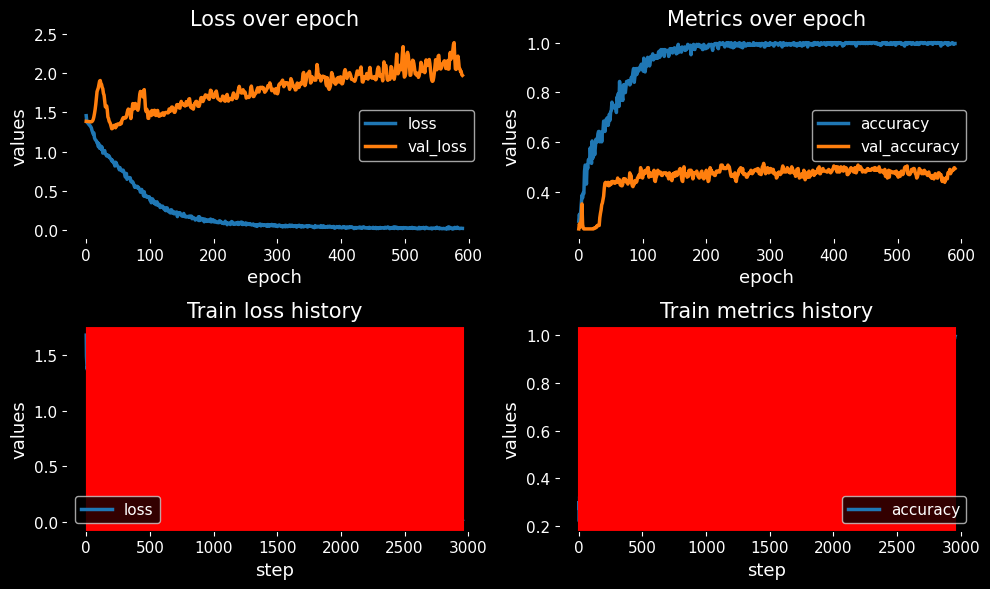


Epoch 312: val_accuracy did not improve from 0.36458

Epoch 353: val_accuracy did not improve from 0.49653

Epoch 313: val_accuracy did not improve from 0.36458

Epoch 354: val_accuracy did not improve from 0.49653

Epoch 314: val_accuracy did not improve from 0.36458

Epoch 355: val_accuracy did not improve from 0.49653
Model `atcnet_orig_norm-no_clean_ch-14_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5138888888888888, 'test_subj-BCI-IV 2a-3_accuracy': 0.5138888888888888}


 64%|████████████████████████████████████████████████████▏                             | 79/124 [32:49<40:42, 54.29s/it]


Epoch 315: val_accuracy did not improve from 0.36458

Epoch 356: val_accuracy did not improve from 0.49653

Epoch 316: val_accuracy did not improve from 0.36458

Epoch 357: val_accuracy did not improve from 0.49653

Epoch 317: val_accuracy did not improve from 0.36458

Epoch 1: val_accuracy improved from -inf to 0.19444, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 358: val_accuracy did not improve from 0.49653

Saving at epoch 1 !

Epoch 318: val_accuracy did not improve from 0.36458

Epoch 359: val_accuracy did not improve from 0.49653

Epoch 319: val_accuracy did not improve from 0.36458

Epoch 360: val_accuracy did not improve from 0.49653

Epoch 2: val_accuracy improved from 0.19444 to 0.25000, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 320: val_accuracy did not improve from 0.36458

Epoch 361: val_accuracy did not improve

2024-02-16 10:57:55.961733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 331: val_accuracy did not improve from 0.36458

Epoch 372: val_accuracy did not improve from 0.49653

Epoch 332: val_accuracy did not improve from 0.36458

Epoch 373: val_accuracy did not improve from 0.49653

Epoch 12: val_accuracy did not improve from 0.25000

Saving at epoch 12 !

Epoch 333: val_accuracy did not improve from 0.36458

Epoch 374: val_accuracy did not improve from 0.49653
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1


2024-02-16 10:58:09.730716: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 411: val_accuracy did not improve from 0.49653

Epoch 40: val_accuracy did not improve from 0.40625

Epoch 371: val_accuracy did not improve from 0.36458

Epoch 412: val_accuracy did not improve from 0.49653

Epoch 41: val_accuracy did not improve from 0.40625

Epoch 372: val_accuracy did not improve from 0.36458

Epoch 413: val_accuracy did not improve from 0.49653

Epoch 42: val_accuracy did not improve from 0.40625

Epoch 373: val_accuracy did not improve from 0.36458

Epoch 414: val_accuracy did not improve from 0.49653

Epoch 43: val_accuracy did not improve from 0.40625

Epoch 374: val_accuracy did not improve from 0.36458

Epoch 415: val_accuracy did not improve from 0.49653

Epoch 44: val_accuracy did not improve from 0.40625

Epoch 375: val_accuracy did not improve from 0.36458

Epoch 416: val_accuracy did not improve from 0.49653
Epoch 415 : Early stopping !
Epoch 416: early stopping
Training finished after 2min 53sec !
Submodel model saved in pretrained_models/atcnet_

2024-02-16 10:58:11.598881: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 45: val_accuracy did not improve from 0.40625

Epoch 376: val_accuracy did not improve from 0.36458
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 46: val_accuracy did not improve from 0.40625

Epoch 377: val_accuracy did not improve from 0.36458

Epoch 47: val_accuracy did not improve from 0.40625

Epoch 378: val_accuracy did not improve from 0.36458

Epoch 48: val_accuracy did not improve from 0.40625

Epoch 379: val_accuracy did not improve from 0.36458


2024-02-16 10:58:13.005510: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dbfaa10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:58:13.005534: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:58:13.010501: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077493.100801 3517254 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 49: val_accuracy did not improve from 0.40625

Epoch 380: val_accuracy did not improve from 0.36458

Epoch 50: val_accuracy did not improve from 0.40625

Epoch 381: val_accuracy did not improve from 0.36458

Epoch 51: val_accuracy did not improve from 0.40625

Epoch 382: val_accuracy did not improve from 0.36458

Epoch 52: val_accuracy did not improve from 0.40625

Epoch 383: val_accuracy did not improve from 0.36458

Epoch 53: val_accuracy did not improve from 0.40625


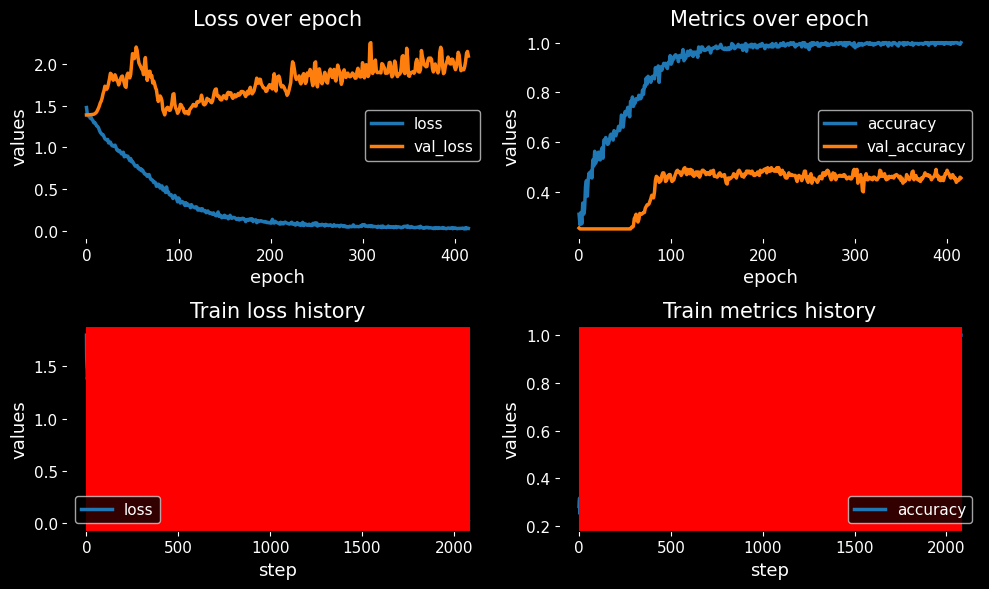


Epoch 384: val_accuracy did not improve from 0.36458

Epoch 54: val_accuracy did not improve from 0.40625

Epoch 385: val_accuracy did not improve from 0.36458

Epoch 55: val_accuracy did not improve from 0.40625

Epoch 386: val_accuracy did not improve from 0.36458
Model `atcnet_orig_norm-no_clean_ch-15_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4965277777777778, 'test_subj-BCI-IV 2a-3_accuracy': 0.4965277777777778}


 65%|████████████████████████████████████████████████████▉                             | 80/124 [33:14<33:22, 45.51s/it]


Epoch 56: val_accuracy did not improve from 0.40625

Epoch 387: val_accuracy did not improve from 0.36458

Epoch 57: val_accuracy did not improve from 0.40625

Epoch 388: val_accuracy did not improve from 0.36458

Epoch 58: val_accuracy did not improve from 0.40625

Epoch 389: val_accuracy did not improve from 0.36458

Epoch 59: val_accuracy did not improve from 0.40625

Epoch 390: val_accuracy did not improve from 0.36458

Epoch 60: val_accuracy did not improve from 0.40625

Epoch 391: val_accuracy did not improve from 0.36458

Epoch 61: val_accuracy did not improve from 0.40625

Epoch 392: val_accuracy did not improve from 0.36458

Epoch 62: val_accuracy did not improve from 0.40625

Epoch 393: val_accuracy did not improve from 0.36458

Epoch 63: val_accuracy did not improve from 0.40625

Epoch 394: val_accuracy did not improve from 0.36458

Epoch 64: val_accuracy did not improve from 0.40625

Epoch 395: val_accuracy did not improve from 0.36458

Epoch 65: val_accuracy did not impro

2024-02-16 10:58:20.995953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 402: val_accuracy did not improve from 0.36458

Epoch 72: val_accuracy improved from 0.40625 to 0.40972, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 403: val_accuracy did not improve from 0.36458

Epoch 73: val_accuracy improved from 0.40972 to 0.43056, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 73 !

Epoch 404: val_accuracy did not improve from 0.36458
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) 

2024-02-16 10:58:34.708640: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 108: val_accuracy improved from 0.46875 to 0.47222, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 442: val_accuracy did not improve from 0.36458

Epoch 26: val_accuracy improved from 0.39236 to 0.40972, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 443: val_accuracy did not improve from 0.36458

Epoch 109: val_accuracy did not improve from 0.47222

Epoch 27: val_accuracy did not improve from 0.40972

Epoch 444: val_accuracy did not improve from 0.36458

Epoch 110: val_accuracy did not improve from 0.47222

Epoch 28: val_accuracy improved from 0.40972 to 0.41319, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 445: val_accuracy did not improve from 0.36458
Epoch 444 : Early stopping !
Epoch 445: early stopping
Training finished after 3min 2sec !
Submod

2024-02-16 10:58:36.538706: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 113: val_accuracy did not improve from 0.47569

Epoch 31: val_accuracy did not improve from 0.41319

Epoch 114: val_accuracy did not improve from 0.47569

Epoch 32: val_accuracy did not improve from 0.41319

Epoch 115: val_accuracy did not improve from 0.47569

Epoch 33: val_accuracy did not improve from 0.41319

Epoch 116: val_accuracy did not improve from 0.47569


2024-02-16 10:58:37.936603: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781bfbf00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:58:37.936634: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:58:37.941240: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077518.035523 3527079 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 34: val_accuracy did not improve from 0.41319

Epoch 117: val_accuracy did not improve from 0.47569

Epoch 35: val_accuracy did not improve from 0.41319

Epoch 118: val_accuracy did not improve from 0.47569

Epoch 36: val_accuracy did not improve from 0.41319

Epoch 119: val_accuracy did not improve from 0.47569

Epoch 37: val_accuracy did not improve from 0.41319

Epoch 120: val_accuracy did not improve from 0.47569

Epoch 38: val_accuracy did not improve from 0.41319


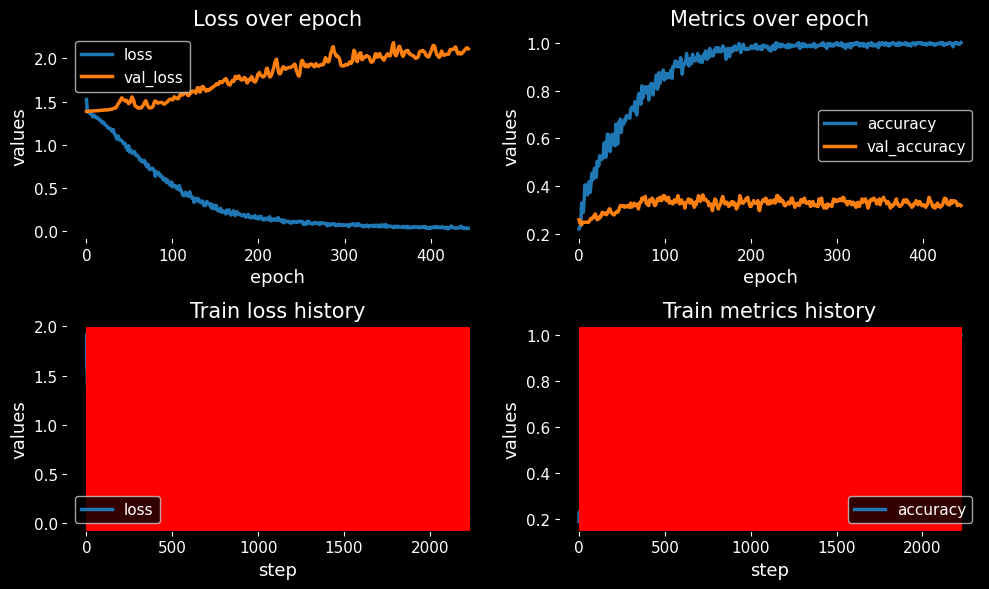


Epoch 121: val_accuracy did not improve from 0.47569

Epoch 39: val_accuracy did not improve from 0.41319

Epoch 122: val_accuracy did not improve from 0.47569

Epoch 40: val_accuracy did not improve from 0.41319

Epoch 123: val_accuracy did not improve from 0.47569
Model `atcnet_orig_norm-no_clean_ch-16_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.3645833333333333, 'test_subj-BCI-IV 2a-1_accuracy': 0.3645833333333333}


 65%|█████████████████████████████████████████████████████▌                            | 81/124 [33:38<28:10, 39.32s/it]


Epoch 41: val_accuracy did not improve from 0.41319

Epoch 124: val_accuracy did not improve from 0.47569

Epoch 42: val_accuracy did not improve from 0.41319

Epoch 125: val_accuracy did not improve from 0.47569

Epoch 43: val_accuracy did not improve from 0.41319

Epoch 126: val_accuracy did not improve from 0.47569

Epoch 44: val_accuracy did not improve from 0.41319

Epoch 127: val_accuracy did not improve from 0.47569

Epoch 45: val_accuracy did not improve from 0.41319

Epoch 128: val_accuracy did not improve from 0.47569

Epoch 46: val_accuracy did not improve from 0.41319

Epoch 129: val_accuracy did not improve from 0.47569

Epoch 47: val_accuracy did not improve from 0.41319

Epoch 130: val_accuracy did not improve from 0.47569

Epoch 48: val_accuracy did not improve from 0.41319

Epoch 131: val_accuracy did not improve from 0.47569

Epoch 49: val_accuracy did not improve from 0.41319

Epoch 132: val_accuracy did not improve from 0.47569

Epoch 50: val_accuracy did not impro

2024-02-16 10:58:45.866226: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 139: val_accuracy did not improve from 0.47569

Epoch 57: val_accuracy did not improve from 0.41319

Epoch 140: val_accuracy did not improve from 0.47569

Epoch 58: val_accuracy did not improve from 0.41319

Epoch 141: val_accuracy did not improve from 0.47569

Epoch 59: val_accuracy did not improve from 0.41319
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) i

2024-02-16 10:58:59.673343: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 178: val_accuracy did not improve from 0.48958

Epoch 32: val_accuracy did not improve from 0.32639

Epoch 179: val_accuracy did not improve from 0.48958

Epoch 96: val_accuracy did not improve from 0.44792

Epoch 33: val_accuracy did not improve from 0.32639

Epoch 180: val_accuracy did not improve from 0.48958

Epoch 97: val_accuracy did not improve from 0.44792

Epoch 34: val_accuracy did not improve from 0.32639

Epoch 181: val_accuracy did not improve from 0.48958

Epoch 98: val_accuracy did not improve from 0.44792

Epoch 35: val_accuracy did not improve from 0.32639

Epoch 182: val_accuracy did not improve from 0.48958

Epoch 99: val_accuracy did not improve from 0.44792

Epoch 36: val_accuracy did not improve from 0.32639

Epoch 183: val_accuracy did not improve from 0.48958


2024-02-16 10:59:01.546268: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 100: val_accuracy did not improve from 0.44792

Epoch 37: val_accuracy did not improve from 0.32639

Epoch 184: val_accuracy did not improve from 0.48958

Epoch 101: val_accuracy did not improve from 0.44792

Epoch 38: val_accuracy did not improve from 0.32639

Epoch 185: val_accuracy did not improve from 0.48958

Epoch 102: val_accuracy did not improve from 0.44792

Epoch 39: val_accuracy did not improve from 0.32639

Epoch 186: val_accuracy did not improve from 0.48958

Epoch 103: val_accuracy did not improve from 0.44792

Epoch 40: val_accuracy did not improve from 0.32639

Epoch 187: val_accuracy did not improve from 0.48958

Epoch 104: val_accuracy did not improve from 0.44792


2024-02-16 10:59:02.996626: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789bfbb60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 10:59:02.996650: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 10:59:03.001616: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077543.101260 3536499 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 41: val_accuracy improved from 0.32639 to 0.35417, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 188: val_accuracy did not improve from 0.48958

Epoch 105: val_accuracy did not improve from 0.44792

Epoch 42: val_accuracy improved from 0.35417 to 0.38889, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 189: val_accuracy did not improve from 0.48958

Epoch 106: val_accuracy did not improve from 0.44792

Epoch 43: val_accuracy improved from 0.38889 to 0.42361, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 43 !

Epoch 107: val_accuracy did not improve from 0.44792

Epoch 190: val_accuracy did not improve from 0.48958

Epoch 191: val_accuracy did not improve from 0.48958

Epoch 108: val_accuracy did not improve from 0.44792

Epoch 44: val_accura

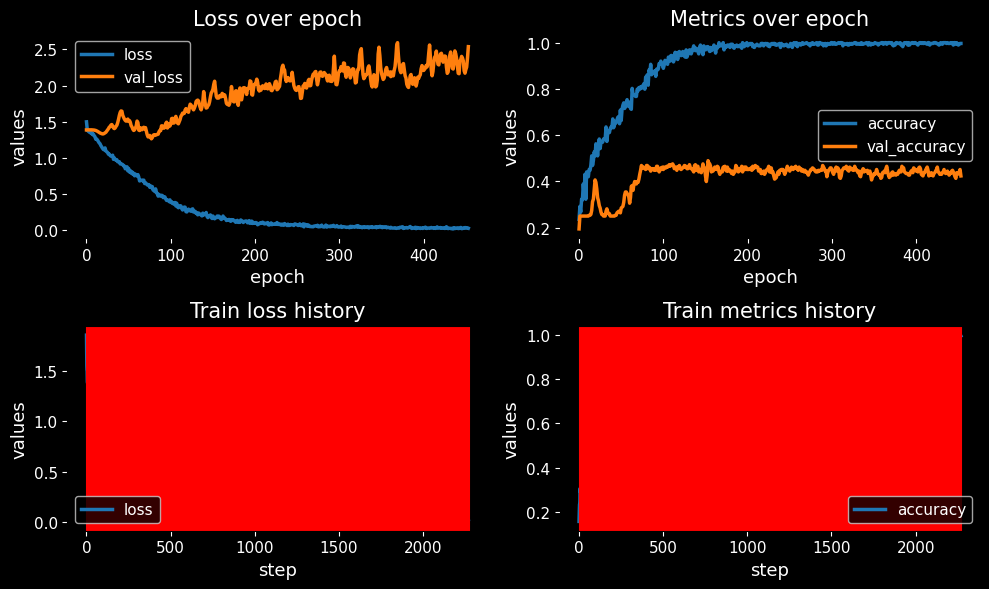


Epoch 214: val_accuracy did not improve from 0.46875

Epoch 307: val_accuracy did not improve from 0.52431

Epoch 382: val_accuracy did not improve from 0.45833

Epoch 215: val_accuracy did not improve from 0.46875

Epoch 308: val_accuracy did not improve from 0.52431

Epoch 383: val_accuracy did not improve from 0.45833

Epoch 216: val_accuracy did not improve from 0.46875

Epoch 309: val_accuracy did not improve from 0.52431

Epoch 384: val_accuracy did not improve from 0.45833
Model `atcnet_orig_norm-no_clean_ch-16_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4895833333333333, 'test_subj-BCI-IV 2a-3_accuracy': 0.4895833333333333}


 66%|██████████████████████████████████████████████████████▏                           | 82/124 [35:42<45:13, 64.61s/it]


Epoch 217: val_accuracy did not improve from 0.46875

Epoch 310: val_accuracy did not improve from 0.52431

Epoch 385: val_accuracy did not improve from 0.45833

Epoch 218: val_accuracy did not improve from 0.46875

Epoch 386: val_accuracy did not improve from 0.45833

Epoch 311: val_accuracy did not improve from 0.52431

Epoch 219: val_accuracy did not improve from 0.46875

Epoch 312: val_accuracy did not improve from 0.52431

Epoch 387: val_accuracy did not improve from 0.45833

Epoch 220: val_accuracy did not improve from 0.46875

Epoch 388: val_accuracy did not improve from 0.45833

Epoch 313: val_accuracy did not improve from 0.52431

Epoch 221: val_accuracy did not improve from 0.46875

Epoch 314: val_accuracy did not improve from 0.52431

Epoch 389: val_accuracy did not improve from 0.45833

Epoch 222: val_accuracy did not improve from 0.46875

Epoch 315: val_accuracy did not improve from 0.52431

Epoch 390: val_accuracy did not improve from 0.45833

Epoch 223: val_accuracy did

2024-02-16 11:00:49.475623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 400: val_accuracy did not improve from 0.45833

Epoch 325: val_accuracy did not improve from 0.52431

Epoch 233: val_accuracy did not improve from 0.46875

Epoch 401: val_accuracy did not improve from 0.45833

Epoch 326: val_accuracy did not improve from 0.52431

Epoch 234: val_accuracy did not improve from 0.46875

Epoch 327: val_accuracy did not improve from 0.52431

Epoch 402: val_accuracy did not improve from 0.45833
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions

2024-02-16 11:01:03.272777: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 272: val_accuracy did not improve from 0.46875

Epoch 440: val_accuracy did not improve from 0.45833

Epoch 365: val_accuracy did not improve from 0.52431

Epoch 273: val_accuracy did not improve from 0.46875

Epoch 441: val_accuracy did not improve from 0.45833

Epoch 366: val_accuracy did not improve from 0.52431

Epoch 367: val_accuracy did not improve from 0.52431

Epoch 442: val_accuracy did not improve from 0.45833

Epoch 274: val_accuracy did not improve from 0.46875

Epoch 443: val_accuracy did not improve from 0.45833

Epoch 368: val_accuracy did not improve from 0.52431

Epoch 275: val_accuracy did not improve from 0.46875

Epoch 369: val_accuracy did not improve from 0.52431

Epoch 444: val_accuracy did not improve from 0.45833

Epoch 276: val_accuracy did not improve from 0.46875


2024-02-16 11:01:05.138622: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 370: val_accuracy did not improve from 0.52431

Epoch 445: val_accuracy did not improve from 0.45833

Epoch 277: val_accuracy did not improve from 0.46875

Epoch 371: val_accuracy did not improve from 0.52431

Epoch 446: val_accuracy did not improve from 0.45833

Epoch 278: val_accuracy did not improve from 0.46875

Epoch 447: val_accuracy did not improve from 0.45833
Epoch 446 : Early stopping !
Epoch 447: early stopping
Training finished after 3min 6sec !

Epoch 372: val_accuracy did not improve from 0.52431
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-1_run-10_scenario-3/saving/model.json !

Epoch 279: val_accuracy did not improve from 0.46875

Epoch 373: val_accuracy did not improve from 0.52431

Epoch 280: val_accuracy did not improve from 0.46875
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>


2024-02-16 11:01:06.584986: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dbfb6e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:01:06.585012: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:01:06.589836: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077666.678695 3587067 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 374: val_accuracy did not improve from 0.52431

Epoch 281: val_accuracy did not improve from 0.46875

Epoch 375: val_accuracy did not improve from 0.52431

Epoch 282: val_accuracy did not improve from 0.46875

Epoch 376: val_accuracy did not improve from 0.52431

Epoch 283: val_accuracy did not improve from 0.46875

Epoch 377: val_accuracy did not improve from 0.52431

Epoch 284: val_accuracy did not improve from 0.46875

Epoch 378: val_accuracy did not improve from 0.52431

Epoch 285: val_accuracy did not improve from 0.46875

Epoch 379: val_accuracy did not improve from 0.52431

Epoch 286: val_accuracy did not improve from 0.46875

Epoch 380: val_accuracy did not improve from 0.52431

Epoch 287: val_accuracy did not improve from 0.46875

Epoch 381: val_accuracy did not improve from 0.52431

Epoch 288: val_accuracy did not improve from 0.46875


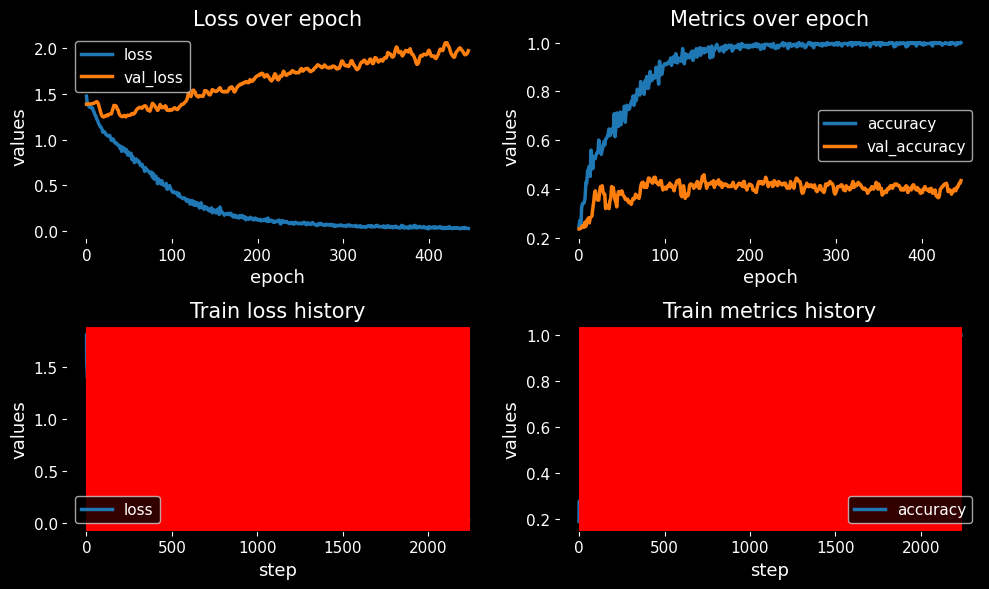


Epoch 382: val_accuracy did not improve from 0.52431

Epoch 289: val_accuracy did not improve from 0.46875

Epoch 383: val_accuracy did not improve from 0.52431

Epoch 290: val_accuracy did not improve from 0.46875

Epoch 384: val_accuracy did not improve from 0.52431

Epoch 291: val_accuracy did not improve from 0.46875
Model `atcnet_orig_norm-no_clean_ch-17_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4583333333333333, 'test_subj-BCI-IV 2a-1_accuracy': 0.4583333333333333}


 67%|██████████████████████████████████████████████████████▉                           | 83/124 [36:09<36:20, 53.18s/it]


Epoch 385: val_accuracy did not improve from 0.52431

Epoch 292: val_accuracy did not improve from 0.46875

Epoch 386: val_accuracy did not improve from 0.52431

Epoch 293: val_accuracy did not improve from 0.46875

Epoch 387: val_accuracy did not improve from 0.52431

Epoch 294: val_accuracy did not improve from 0.46875

Epoch 388: val_accuracy did not improve from 0.52431

Epoch 295: val_accuracy did not improve from 0.46875

Epoch 389: val_accuracy did not improve from 0.52431

Epoch 296: val_accuracy did not improve from 0.46875

Epoch 390: val_accuracy did not improve from 0.52431

Epoch 297: val_accuracy did not improve from 0.46875

Epoch 391: val_accuracy did not improve from 0.52431

Epoch 298: val_accuracy did not improve from 0.46875

Epoch 392: val_accuracy did not improve from 0.52431

Epoch 299: val_accuracy did not improve from 0.46875

Epoch 393: val_accuracy did not improve from 0.52431

Epoch 300: val_accuracy did not improve from 0.46875

Epoch 394: val_accuracy did

2024-02-16 11:01:15.989016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 400: val_accuracy did not improve from 0.52431

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-18_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 1 !

Epoch 308: val_accuracy did not improve from 0.46875

Epoch 401: val_accuracy did not improve from 0.52431

Epoch 309: val_accuracy did not improve from 0.46875

Epoch 402: val_accuracy did not improve from 0.52431

Epoch 2: val_accuracy did not improve from 0.25000
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # s

2024-02-16 11:01:29.765459: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 347: val_accuracy did not improve from 0.46875

Epoch 30: val_accuracy did not improve from 0.38542

Epoch 440: val_accuracy did not improve from 0.52431

Epoch 348: val_accuracy did not improve from 0.46875

Epoch 31: val_accuracy did not improve from 0.38542

Epoch 441: val_accuracy did not improve from 0.52431

Epoch 349: val_accuracy did not improve from 0.46875

Epoch 32: val_accuracy did not improve from 0.38542

Epoch 442: val_accuracy did not improve from 0.52431

Epoch 350: val_accuracy did not improve from 0.46875

Epoch 33: val_accuracy did not improve from 0.38542

Epoch 443: val_accuracy did not improve from 0.52431

Epoch 351: val_accuracy did not improve from 0.46875

Epoch 34: val_accuracy did not improve from 0.38542

Epoch 444: val_accuracy did not improve from 0.52431


2024-02-16 11:01:31.625342: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 352: val_accuracy did not improve from 0.46875

Epoch 35: val_accuracy did not improve from 0.38542

Epoch 445: val_accuracy did not improve from 0.52431

Epoch 353: val_accuracy did not improve from 0.46875

Epoch 36: val_accuracy did not improve from 0.38542

Epoch 446: val_accuracy did not improve from 0.52431
Epoch 445 : Early stopping !
Epoch 446: early stopping
Training finished after 3min 7sec !
Submodel model saved in pretrained_models/atcnet_orig_norm-no_clean_ch-17_subj-3_run-10_scenario-3/saving/model.json !

Epoch 354: val_accuracy did not improve from 0.46875

Epoch 37: val_accuracy did not improve from 0.38542
Unknown json data (<class 'function'>) : <function sparse_categorical_accuracy at 0x7f3a0e446200>

Epoch 355: val_accuracy did not improve from 0.46875

Epoch 38: val_accuracy did not improve from 0.38542


2024-02-16 11:01:33.006916: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789bfadc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:01:33.006939: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:01:33.011805: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077693.103491 3597643 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 356: val_accuracy did not improve from 0.46875

Epoch 39: val_accuracy did not improve from 0.38542

Epoch 357: val_accuracy did not improve from 0.46875

Epoch 40: val_accuracy did not improve from 0.38542

Epoch 358: val_accuracy did not improve from 0.46875

Epoch 41: val_accuracy did not improve from 0.38542

Epoch 359: val_accuracy did not improve from 0.46875

Epoch 42: val_accuracy did not improve from 0.38542

Epoch 360: val_accuracy did not improve from 0.46875

Epoch 43: val_accuracy did not improve from 0.38542

Epoch 361: val_accuracy did not improve from 0.46875

Epoch 44: val_accuracy did not improve from 0.38542

Epoch 362: val_accuracy did not improve from 0.46875


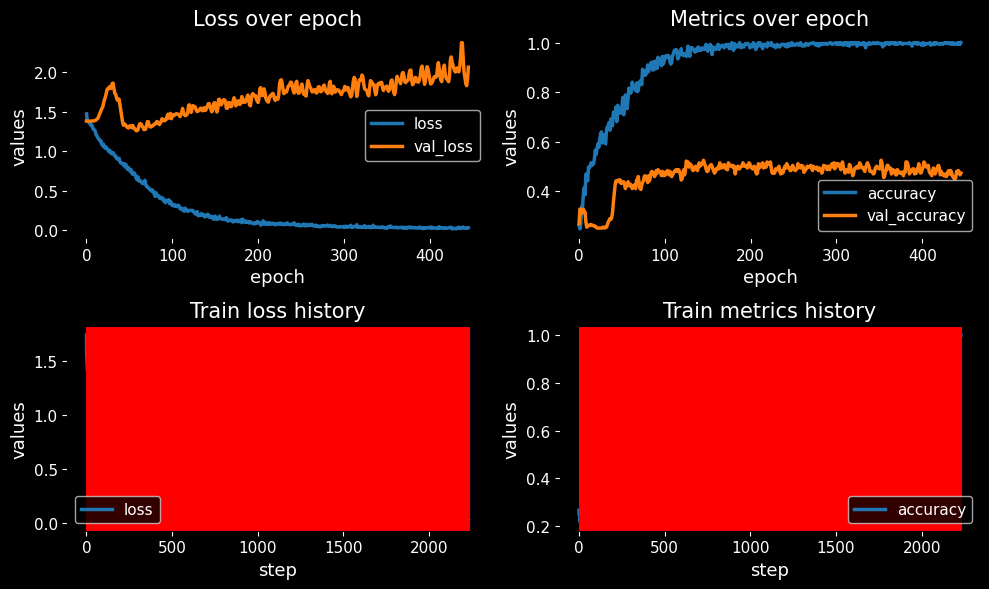


Epoch 45: val_accuracy did not improve from 0.38542

Epoch 363: val_accuracy did not improve from 0.46875

Epoch 46: val_accuracy did not improve from 0.38542

Epoch 364: val_accuracy did not improve from 0.46875

Epoch 47: val_accuracy did not improve from 0.38542

Epoch 365: val_accuracy did not improve from 0.46875
Model `atcnet_orig_norm-no_clean_ch-17_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5243055555555556, 'test_subj-BCI-IV 2a-3_accuracy': 0.5243055555555556}


 68%|███████████████████████████████████████████████████████▌                          | 84/124 [36:35<30:00, 45.00s/it]


Epoch 48: val_accuracy did not improve from 0.38542

Epoch 366: val_accuracy did not improve from 0.46875

Epoch 49: val_accuracy did not improve from 0.38542

Epoch 367: val_accuracy did not improve from 0.46875

Epoch 50: val_accuracy did not improve from 0.38542

Epoch 368: val_accuracy did not improve from 0.46875

Epoch 51: val_accuracy did not improve from 0.38542

Epoch 369: val_accuracy did not improve from 0.46875

Epoch 52: val_accuracy did not improve from 0.38542

Epoch 370: val_accuracy did not improve from 0.46875

Epoch 53: val_accuracy did not improve from 0.38542

Epoch 371: val_accuracy did not improve from 0.46875

Epoch 54: val_accuracy did not improve from 0.38542

Epoch 372: val_accuracy did not improve from 0.46875

Epoch 55: val_accuracy did not improve from 0.38542

Epoch 373: val_accuracy did not improve from 0.46875

Epoch 56: val_accuracy did not improve from 0.38542

Epoch 374: val_accuracy did not improve from 0.46875

Epoch 57: val_accuracy did not impro

2024-02-16 11:01:41.904634: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 381: val_accuracy did not improve from 0.46875

Epoch 64: val_accuracy did not improve from 0.38542

Epoch 382: val_accuracy did not improve from 0.46875

Epoch 65: val_accuracy did not improve from 0.38542

Epoch 383: val_accuracy did not improve from 0.46875

Epoch 1: val_accuracy improved from -inf to 0.24306, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-19_subj-1_run-10_scenario-3/saving/best_weights.keras

Epoch 66: val_accuracy improved from 0.38542 to 0.38889, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-18_subj-3_run-10_scenario-3/saving/best_weights.keras
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Saving at epoch 1 !

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == 

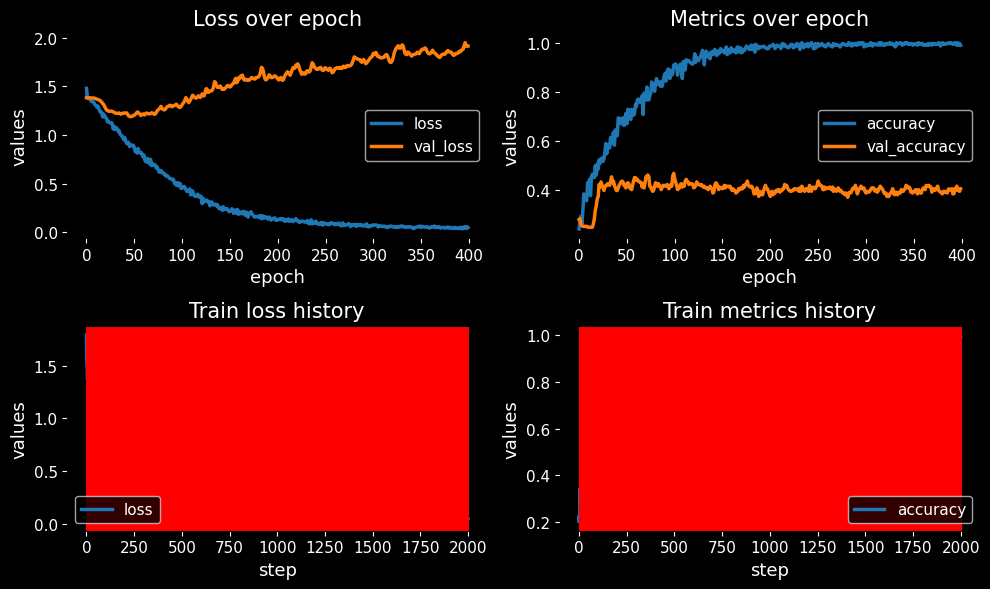


Epoch 90: val_accuracy did not improve from 0.49653

Epoch 15: val_accuracy did not improve from 0.32292

Saving at epoch 15 !

Epoch 91: val_accuracy did not improve from 0.49653

Epoch 92: val_accuracy did not improve from 0.49653
Model `atcnet_orig_norm-no_clean_ch-18_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.46875, 'test_subj-BCI-IV 2a-1_accuracy': 0.46875}


 69%|████████████████████████████████████████████████████████▏                         | 85/124 [36:51<23:36, 36.33s/it]


Epoch 16: val_accuracy did not improve from 0.32292

Saving at epoch 16 !

Epoch 93: val_accuracy improved from 0.49653 to 0.50347, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-18_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 17: val_accuracy did not improve from 0.32292

Saving at epoch 17 !

Epoch 94: val_accuracy did not improve from 0.50347

Epoch 95: val_accuracy did not improve from 0.50347

Epoch 18: val_accuracy did not improve from 0.32292

Saving at epoch 18 !

Epoch 96: val_accuracy did not improve from 0.50347

Epoch 97: val_accuracy did not improve from 0.50347

Epoch 19: val_accuracy did not improve from 0.32292

Saving at epoch 19 !

Epoch 98: val_accuracy did not improve from 0.50347

Epoch 99: val_accuracy did not improve from 0.50347

Epoch 20: val_accuracy did not improve from 0.32292


2024-02-16 11:01:55.319542: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 100: val_accuracy did not improve from 0.50347

Epoch 21: val_accuracy did not improve from 0.32292

Saving at epoch 21 !

Epoch 101: val_accuracy did not improve from 0.50347

Epoch 22: val_accuracy did not improve from 0.32292

Saving at epoch 22 !

Epoch 102: val_accuracy did not improve from 0.50347

Epoch 103: val_accuracy did not improve from 0.50347

Epoch 23: val_accuracy did not improve from 0.32292

Saving at epoch 23 !

Epoch 104: val_accuracy did not improve from 0.50347


2024-02-16 11:01:57.005298: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 105: val_accuracy did not improve from 0.50347

Epoch 24: val_accuracy did not improve from 0.32292

Saving at epoch 24 !

Epoch 106: val_accuracy did not improve from 0.50347

Epoch 107: val_accuracy did not improve from 0.50347

Epoch 25: val_accuracy did not improve from 0.32292

Saving at epoch 25 !
Loading dataset bciiv2a...


2024-02-16 11:01:58.018208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 108: val_accuracy did not improve from 0.50347


2024-02-16 11:01:58.296294: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3779c04c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:01:58.296318: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:01:58.300921: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077718.389959 3607689 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 26: val_accuracy did not improve from 0.32292

Saving at epoch 26 !

Epoch 109: val_accuracy did not improve from 0.50347

Epoch 110: val_accuracy did not improve from 0.50347
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 1
  - # session(s) in test  : 1
  - # session(s) in train and valid : 0
  - # session(s) in train and test  : 0

Building model with config : {'nom': 'atcnet_orig_norm-no_clean_ch-20_subj-

2024-02-16 11:02:11.636331: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 147: val_accuracy did not improve from 0.50347

Epoch 11: val_accuracy did not improve from 0.25347

Epoch 148: val_accuracy did not improve from 0.50347

Epoch 12: val_accuracy did not improve from 0.25347

Epoch 47: val_accuracy did not improve from 0.42014

Epoch 149: val_accuracy did not improve from 0.50347

Epoch 13: val_accuracy did not improve from 0.25347

Epoch 48: val_accuracy did not improve from 0.42014

Saving at epoch 48 !

Epoch 150: val_accuracy did not improve from 0.50347

Epoch 14: val_accuracy did not improve from 0.25347

Epoch 151: val_accuracy did not improve from 0.50347

Epoch 15: val_accuracy did not improve from 0.25347

Epoch 49: val_accuracy did not improve from 0.42014

Saving at epoch 49 !

Epoch 152: val_accuracy did not improve from 0.50347

Epoch 16: val_accuracy did not improve from 0.25347


2024-02-16 11:02:13.499321: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 153: val_accuracy did not improve from 0.50347

Epoch 17: val_accuracy did not improve from 0.25347

Epoch 50: val_accuracy did not improve from 0.42014

Saving at epoch 50 !

Epoch 154: val_accuracy did not improve from 0.50347

Epoch 18: val_accuracy did not improve from 0.25347

Epoch 155: val_accuracy did not improve from 0.50347

Epoch 19: val_accuracy did not improve from 0.25347

Epoch 51: val_accuracy did not improve from 0.42014

Epoch 156: val_accuracy did not improve from 0.50347


2024-02-16 11:02:14.913627: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f378dc03120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:02:14.913653: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:02:14.918443: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077735.012509 3611516 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 20: val_accuracy did not improve from 0.25347

Epoch 52: val_accuracy did not improve from 0.42014

Saving at epoch 52 !

Epoch 157: val_accuracy did not improve from 0.50347

Epoch 21: val_accuracy did not improve from 0.25347

Epoch 158: val_accuracy did not improve from 0.50347

Epoch 22: val_accuracy did not improve from 0.25347

Epoch 53: val_accuracy did not improve from 0.42014

Epoch 159: val_accuracy did not improve from 0.50347

Epoch 23: val_accuracy did not improve from 0.25347

Epoch 54: val_accuracy did not improve from 0.42014

Epoch 160: val_accuracy did not improve from 0.50347

Epoch 24: val_accuracy did not improve from 0.25347

Epoch 55: val_accuracy did not improve from 0.42014

Saving at epoch 55 !

Epoch 161: val_accuracy did not improve from 0.50347

Epoch 25: val_accuracy did not improve from 0.25347

Epoch 162: val_accuracy did not improve from 0.50347

Epoch 56: val_accuracy did not improve from 0.42014

Saving at epoch 56 !

Epoch 26: val_accuracy did

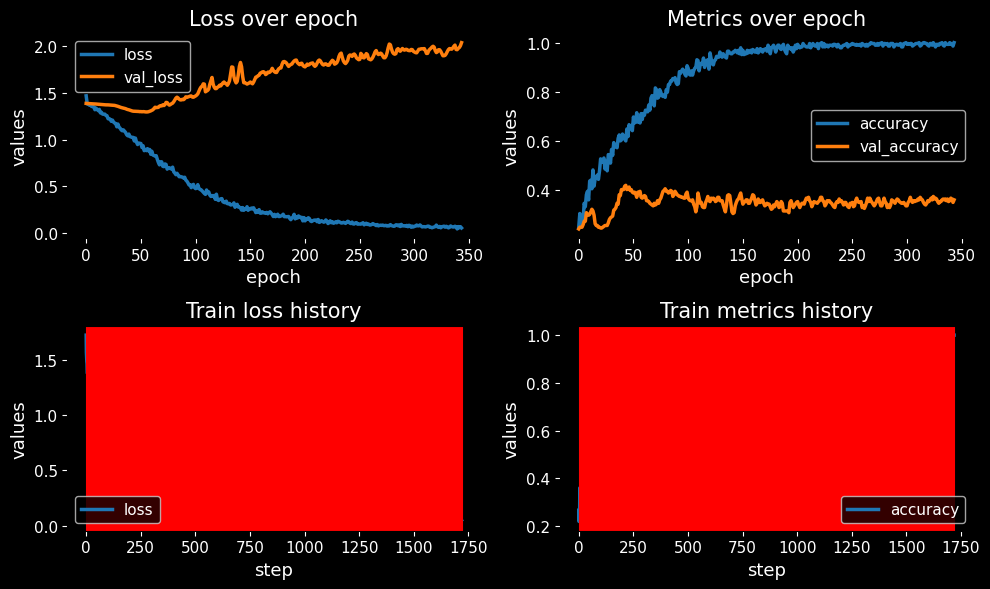


Epoch 319: val_accuracy did not improve from 0.48264

Epoch 268: val_accuracy did not improve from 0.40278

Epoch 460: val_accuracy did not improve from 0.51042

Epoch 320: val_accuracy did not improve from 0.48264

Epoch 269: val_accuracy did not improve from 0.40278

Epoch 461: val_accuracy did not improve from 0.51042

Epoch 321: val_accuracy did not improve from 0.48264
Model `atcnet_orig_norm-no_clean_ch-19_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4201388888888889, 'test_subj-BCI-IV 2a-1_accuracy': 0.4201388888888889}

Epoch 270: val_accuracy did not improve from 0.40278


 69%|████████████████████████████████████████████████████████▊                         | 86/124 [39:04<41:25, 65.42s/it]


Epoch 462: val_accuracy did not improve from 0.51042

Epoch 322: val_accuracy did not improve from 0.48264

Epoch 271: val_accuracy did not improve from 0.40278

Epoch 463: val_accuracy did not improve from 0.51042

Epoch 323: val_accuracy did not improve from 0.48264

Epoch 272: val_accuracy did not improve from 0.40278

Epoch 464: val_accuracy did not improve from 0.51042

Epoch 324: val_accuracy did not improve from 0.48264

Epoch 273: val_accuracy did not improve from 0.40278

Epoch 465: val_accuracy did not improve from 0.51042

Epoch 325: val_accuracy did not improve from 0.48264

Epoch 274: val_accuracy did not improve from 0.40278

Epoch 466: val_accuracy did not improve from 0.51042

Epoch 326: val_accuracy did not improve from 0.48264

Epoch 275: val_accuracy did not improve from 0.40278

Epoch 467: val_accuracy did not improve from 0.51042

Epoch 327: val_accuracy did not improve from 0.48264

Epoch 276: val_accuracy did not improve from 0.40278

Epoch 468: val_accuracy did

2024-02-16 11:04:11.295512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 477: val_accuracy did not improve from 0.51042

Epoch 286: val_accuracy did not improve from 0.40278

Epoch 338: val_accuracy did not improve from 0.48264

Epoch 478: val_accuracy did not improve from 0.51042

Epoch 287: val_accuracy did not improve from 0.40278

Epoch 339: val_accuracy did not improve from 0.48264

Epoch 479: val_accuracy did not improve from 0.51042

Epoch 288: val_accuracy did not improve from 0.40278
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions

2024-02-16 11:04:25.154893: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 516: val_accuracy did not improve from 0.51042

Epoch 377: val_accuracy did not improve from 0.48264

Epoch 326: val_accuracy did not improve from 0.40278

Epoch 517: val_accuracy did not improve from 0.51042

Epoch 378: val_accuracy did not improve from 0.48264

Epoch 327: val_accuracy did not improve from 0.40278

Epoch 518: val_accuracy did not improve from 0.51042

Epoch 379: val_accuracy did not improve from 0.48264

Epoch 328: val_accuracy did not improve from 0.40278

Epoch 519: val_accuracy did not improve from 0.51042

Epoch 380: val_accuracy did not improve from 0.48264

Epoch 329: val_accuracy did not improve from 0.40278

Epoch 520: val_accuracy did not improve from 0.51042

Epoch 381: val_accuracy did not improve from 0.48264

Epoch 330: val_accuracy did not improve from 0.40278

Epoch 521: val_accuracy did not improve from 0.51042


2024-02-16 11:04:27.035741: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 382: val_accuracy did not improve from 0.48264

Epoch 331: val_accuracy did not improve from 0.40278

Epoch 522: val_accuracy did not improve from 0.51042

Epoch 383: val_accuracy did not improve from 0.48264

Epoch 332: val_accuracy did not improve from 0.40278

Epoch 523: val_accuracy did not improve from 0.51042

Epoch 384: val_accuracy did not improve from 0.48264

Epoch 333: val_accuracy did not improve from 0.40278

Epoch 524: val_accuracy did not improve from 0.51042

Epoch 385: val_accuracy did not improve from 0.48264

Epoch 334: val_accuracy did not improve from 0.40278


2024-02-16 11:04:28.460596: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3789c05400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:04:28.460619: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:04:28.465650: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077868.558339 3668335 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 525: val_accuracy did not improve from 0.51042

Epoch 386: val_accuracy did not improve from 0.48264

Epoch 335: val_accuracy did not improve from 0.40278

Epoch 526: val_accuracy did not improve from 0.51042

Epoch 387: val_accuracy did not improve from 0.48264

Epoch 336: val_accuracy did not improve from 0.40278

Epoch 388: val_accuracy did not improve from 0.48264

Epoch 527: val_accuracy did not improve from 0.51042

Epoch 337: val_accuracy did not improve from 0.40278

Epoch 389: val_accuracy did not improve from 0.48264

Epoch 528: val_accuracy did not improve from 0.51042

Epoch 338: val_accuracy did not improve from 0.40278

Epoch 390: val_accuracy did not improve from 0.48264

Epoch 529: val_accuracy did not improve from 0.51042

Epoch 339: val_accuracy did not improve from 0.40278

Epoch 391: val_accuracy did not improve from 0.48264

Epoch 530: val_accuracy did not improve from 0.51042

Epoch 340: val_accuracy did not improve from 0.40278

Epoch 392: val_accuracy did

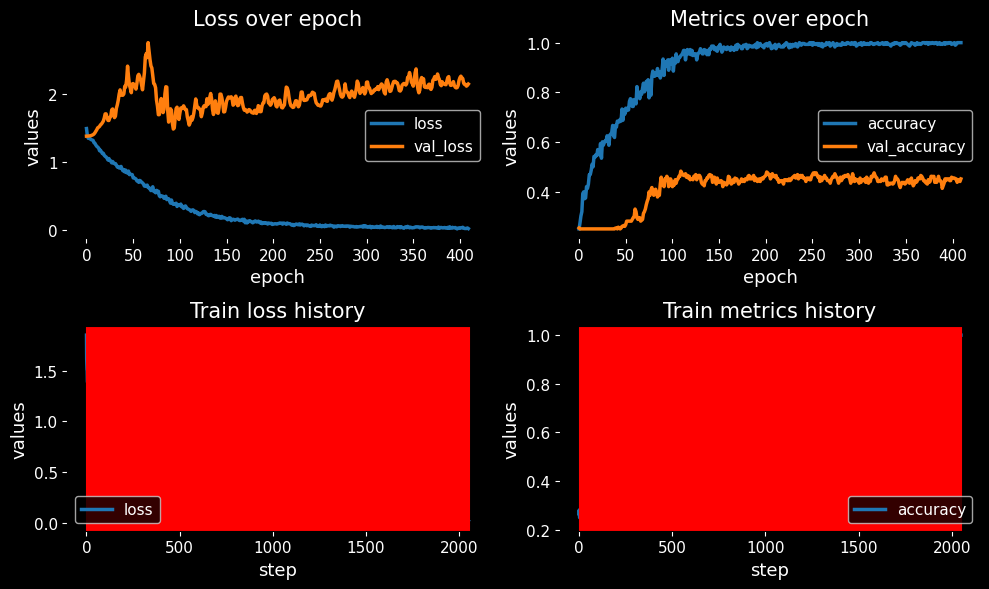


Epoch 367: val_accuracy did not improve from 0.40278

Epoch 558: val_accuracy did not improve from 0.51042

Epoch 5: val_accuracy did not improve from 0.26389

Epoch 368: val_accuracy did not improve from 0.40278

Epoch 559: val_accuracy did not improve from 0.51042

Epoch 6: val_accuracy did not improve from 0.26389

Epoch 369: val_accuracy did not improve from 0.40278

Epoch 560: val_accuracy did not improve from 0.51042

Epoch 7: val_accuracy did not improve from 0.26389
Model `atcnet_orig_norm-no_clean_ch-19_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.4826388888888889, 'test_subj-BCI-IV 2a-3_accuracy': 0.4826388888888889}


 70%|█████████████████████████████████████████████████████████▌                        | 87/124 [39:39<34:46, 56.40s/it]


Epoch 370: val_accuracy did not improve from 0.40278

Epoch 561: val_accuracy did not improve from 0.51042

Epoch 8: val_accuracy did not improve from 0.26389

Epoch 371: val_accuracy did not improve from 0.40278

Epoch 562: val_accuracy did not improve from 0.51042

Epoch 9: val_accuracy did not improve from 0.26389

Epoch 372: val_accuracy did not improve from 0.40278

Epoch 563: val_accuracy did not improve from 0.51042

Epoch 10: val_accuracy did not improve from 0.26389

Epoch 373: val_accuracy did not improve from 0.40278

Epoch 564: val_accuracy did not improve from 0.51042

Epoch 11: val_accuracy did not improve from 0.26389

Epoch 374: val_accuracy did not improve from 0.40278

Epoch 565: val_accuracy did not improve from 0.51042

Epoch 12: val_accuracy did not improve from 0.26389

Epoch 375: val_accuracy did not improve from 0.40278

Epoch 566: val_accuracy did not improve from 0.51042

Epoch 13: val_accuracy did not improve from 0.26389

Epoch 376: val_accuracy did not imp

2024-02-16 11:04:46.662822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 576: val_accuracy did not improve from 0.51042

Epoch 23: val_accuracy did not improve from 0.26389

Epoch 386: val_accuracy did not improve from 0.40278

Epoch 577: val_accuracy did not improve from 0.51042

Epoch 24: val_accuracy did not improve from 0.26389

Epoch 387: val_accuracy did not improve from 0.40278

Epoch 578: val_accuracy did not improve from 0.51042

Epoch 25: val_accuracy did not improve from 0.26389

Epoch 388: val_accuracy did not improve from 0.40278
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 

2024-02-16 11:05:00.541087: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 425: val_accuracy did not improve from 0.40278

Epoch 616: val_accuracy did not improve from 0.51042

Epoch 59: val_accuracy did not improve from 0.39931

Epoch 426: val_accuracy did not improve from 0.40278

Epoch 617: val_accuracy did not improve from 0.51042

Epoch 60: val_accuracy did not improve from 0.39931

Epoch 427: val_accuracy did not improve from 0.40278

Epoch 618: val_accuracy did not improve from 0.51042

Epoch 61: val_accuracy did not improve from 0.39931

Epoch 428: val_accuracy did not improve from 0.40278

Epoch 619: val_accuracy did not improve from 0.51042

Epoch 62: val_accuracy did not improve from 0.39931

Epoch 429: val_accuracy did not improve from 0.40278

Epoch 620: val_accuracy did not improve from 0.51042

Epoch 63: val_accuracy did not improve from 0.39931


2024-02-16 11:05:02.400159: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 430: val_accuracy did not improve from 0.40278

Epoch 621: val_accuracy did not improve from 0.51042

Epoch 64: val_accuracy did not improve from 0.39931

Epoch 431: val_accuracy did not improve from 0.40278

Epoch 622: val_accuracy did not improve from 0.51042

Epoch 65: val_accuracy improved from 0.39931 to 0.42361, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-20_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 432: val_accuracy did not improve from 0.40278

Epoch 623: val_accuracy did not improve from 0.51042

Epoch 66: val_accuracy improved from 0.42361 to 0.44444, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-20_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 433: val_accuracy did not improve from 0.40278

Epoch 624: val_accuracy did not improve from 0.51042

Epoch 434: val_accuracy did not improve from 0.40278


2024-02-16 11:05:03.868956: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c16270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:05:03.868978: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:05:03.873494: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077903.968381 3682638 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 67: val_accuracy improved from 0.44444 to 0.45833, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-20_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 625: val_accuracy did not improve from 0.51042

Epoch 435: val_accuracy did not improve from 0.40278

Epoch 68: val_accuracy did not improve from 0.45833

Epoch 626: val_accuracy did not improve from 0.51042

Epoch 436: val_accuracy did not improve from 0.40278

Epoch 69: val_accuracy improved from 0.45833 to 0.46875, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-20_subj-3_run-10_scenario-3/saving/best_weights.keras

Epoch 627: val_accuracy did not improve from 0.51042

Epoch 437: val_accuracy did not improve from 0.40278

Epoch 70: val_accuracy did not improve from 0.46875

Epoch 628: val_accuracy did not improve from 0.51042

Epoch 438: val_accuracy did not improve from 0.40278
Epoch 437 : Early stopping !
Epoch 438: early stopping
Training finished after 3min 3sec !
Submodel model saved 

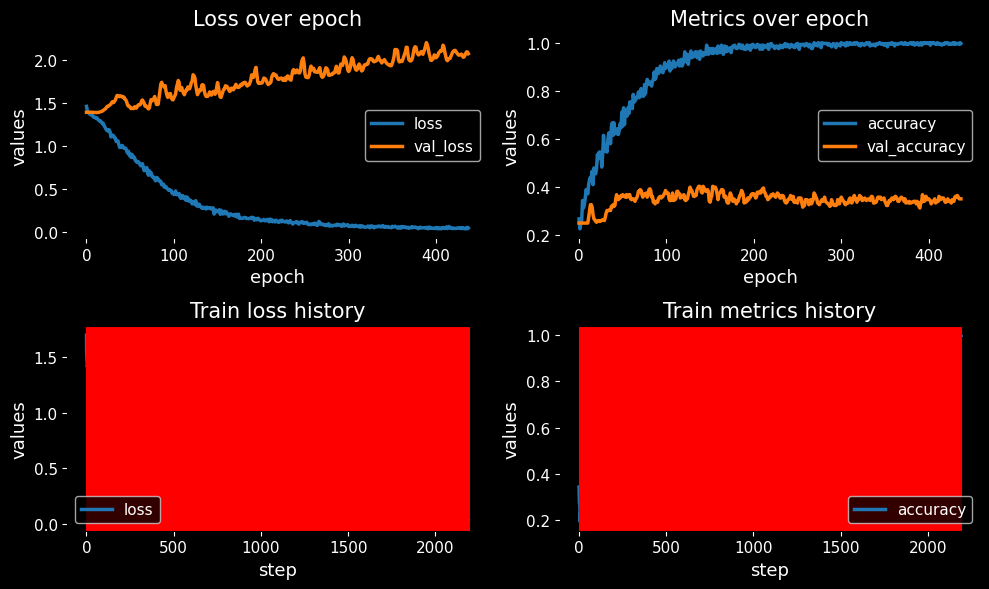


Epoch 639: val_accuracy did not improve from 0.51042

Epoch 79: val_accuracy did not improve from 0.50694

Epoch 640: val_accuracy did not improve from 0.51042

Epoch 80: val_accuracy did not improve from 0.50694

Epoch 641: val_accuracy did not improve from 0.51042
Model `atcnet_orig_norm-no_clean_ch-20_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4027777777777778, 'test_subj-BCI-IV 2a-1_accuracy': 0.4027777777777778}


 71%|██████████████████████████████████████████████████████████▏                       | 88/124 [40:08<28:50, 48.07s/it]


Epoch 81: val_accuracy did not improve from 0.50694

Epoch 642: val_accuracy did not improve from 0.51042

Epoch 82: val_accuracy did not improve from 0.50694

Epoch 643: val_accuracy did not improve from 0.51042

Epoch 83: val_accuracy did not improve from 0.50694

Epoch 644: val_accuracy did not improve from 0.51042

Epoch 84: val_accuracy did not improve from 0.50694

Epoch 645: val_accuracy did not improve from 0.51042

Epoch 85: val_accuracy did not improve from 0.50694

Epoch 646: val_accuracy did not improve from 0.51042

Epoch 86: val_accuracy did not improve from 0.50694

Epoch 647: val_accuracy did not improve from 0.51042

Epoch 87: val_accuracy did not improve from 0.50694

Epoch 648: val_accuracy did not improve from 0.51042

Epoch 88: val_accuracy did not improve from 0.50694

Epoch 649: val_accuracy did not improve from 0.51042

Epoch 89: val_accuracy did not improve from 0.50694

Epoch 650: val_accuracy did not improve from 0.51042

Epoch 90: val_accuracy did not impro

2024-02-16 11:05:15.300660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3072 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5



Epoch 97: val_accuracy did not improve from 0.50694

Epoch 658: val_accuracy did not improve from 0.51042

Epoch 5: val_accuracy did not improve from 0.29167

Epoch 98: val_accuracy did not improve from 0.50694

Epoch 659: val_accuracy did not improve from 0.51042

Epoch 6: val_accuracy did not improve from 0.29167

Epoch 99: val_accuracy did not improve from 0.50694
`val_split is None`, which makes the validation and test sets equal ! Make sure that it is expected

Dataset information

General :
  - sampling rate  : 250
  - # EEG channels : 1
  - Labels (n = 4) : {'right hand (IM)', 'feet (IM)', 'tongue (IM)', 'left hand (IM)'}

# Samples :
  - Train size    : 288
  - Valid size    : 288
  - Test size     : 288
  - valid == test : True

Subjects :
  - # subject(s) in train : 1
  - # subject(s) in valid : 1
  - # subject(s) in test  : 1
  - # subject(s) in train and valid : 1
  - # subject(s) in train and test  : 1

Sessions :
  - # session(s) in train : 1
  - # session(s) in valid : 

2024-02-16 11:05:29.161028: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/ATCNet/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer



Epoch 136: val_accuracy did not improve from 0.50694

Epoch 697: val_accuracy did not improve from 0.51042

Epoch 44: val_accuracy did not improve from 0.29167

Epoch 137: val_accuracy did not improve from 0.50694

Epoch 45: val_accuracy did not improve from 0.29167

Epoch 698: val_accuracy did not improve from 0.51042

Epoch 138: val_accuracy did not improve from 0.50694

Epoch 699: val_accuracy did not improve from 0.51042

Epoch 46: val_accuracy did not improve from 0.29167

Epoch 139: val_accuracy did not improve from 0.50694

Epoch 700: val_accuracy did not improve from 0.51042

Epoch 47: val_accuracy did not improve from 0.29167

Epoch 140: val_accuracy did not improve from 0.50694

Epoch 48: val_accuracy did not improve from 0.29167

Epoch 701: val_accuracy did not improve from 0.51042

Epoch 141: val_accuracy did not improve from 0.50694


2024-02-16 11:05:31.029443: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906



Epoch 49: val_accuracy did not improve from 0.29167

Epoch 702: val_accuracy did not improve from 0.51042

Epoch 142: val_accuracy did not improve from 0.50694

Epoch 703: val_accuracy did not improve from 0.51042

Epoch 50: val_accuracy did not improve from 0.29167

Epoch 143: val_accuracy did not improve from 0.50694

Epoch 51: val_accuracy did not improve from 0.29167

Epoch 704: val_accuracy did not improve from 0.51042

Epoch 144: val_accuracy did not improve from 0.50694

Epoch 52: val_accuracy did not improve from 0.29167

Epoch 705: val_accuracy did not improve from 0.51042


2024-02-16 11:05:32.452952: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3781c038b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 11:05:32.452976: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-02-16 11:05:32.457733: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708077932.552257 3693815 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 145: val_accuracy did not improve from 0.50694

Epoch 53: val_accuracy did not improve from 0.29167

Epoch 706: val_accuracy did not improve from 0.51042

Epoch 146: val_accuracy did not improve from 0.50694

Epoch 54: val_accuracy did not improve from 0.29167

Epoch 707: val_accuracy did not improve from 0.51042

Epoch 147: val_accuracy did not improve from 0.50694

Epoch 55: val_accuracy did not improve from 0.29167

Epoch 708: val_accuracy did not improve from 0.51042

Epoch 148: val_accuracy did not improve from 0.50694

Epoch 56: val_accuracy did not improve from 0.29167

Epoch 709: val_accuracy did not improve from 0.51042

Epoch 149: val_accuracy did not improve from 0.50694

Epoch 57: val_accuracy did not improve from 0.29167

Epoch 710: val_accuracy did not improve from 0.51042

Epoch 150: val_accuracy did not improve from 0.50694

Epoch 58: val_accuracy did not improve from 0.29167

Epoch 711: val_accuracy did not improve from 0.51042

Epoch 151: val_accuracy did not i

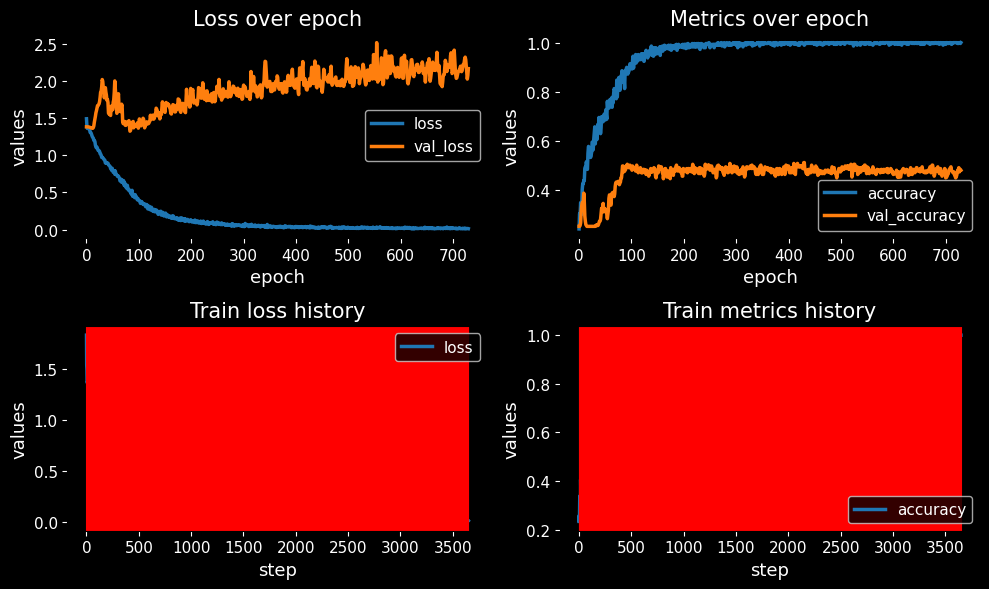


Epoch 91: val_accuracy did not improve from 0.34028

Epoch 185: val_accuracy did not improve from 0.50694

Epoch 92: val_accuracy did not improve from 0.34028

Epoch 186: val_accuracy did not improve from 0.50694

Epoch 8: val_accuracy did not improve from 0.36111

Epoch 93: val_accuracy did not improve from 0.34028

Epoch 187: val_accuracy did not improve from 0.50694
Model `atcnet_orig_norm-no_clean_ch-18_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5104166666666666, 'test_subj-BCI-IV 2a-3_accuracy': 0.5104166666666666}

Epoch 9: val_accuracy did not improve from 0.36111


 72%|██████████████████████████████████████████████████████████▊                       | 89/124 [40:46<26:14, 44.98s/it]


Epoch 94: val_accuracy did not improve from 0.34028


 77%|██████████████████████████████████████████████████████████████▊                   | 95/124 [40:46<06:05, 12.61s/it]


Epoch 188: val_accuracy did not improve from 0.50694


 93%|███████████████████████████████████████████████████████████████████████████      | 115/124 [40:46<00:22,  2.45s/it]


Epoch 10: val_accuracy did not improve from 0.36111

Epoch 95: val_accuracy did not improve from 0.34028

Epoch 189: val_accuracy did not improve from 0.50694

Epoch 11: val_accuracy did not improve from 0.36111

Epoch 96: val_accuracy did not improve from 0.34028

Epoch 190: val_accuracy did not improve from 0.50694

Epoch 12: val_accuracy did not improve from 0.36111

Epoch 97: val_accuracy did not improve from 0.34028

Epoch 191: val_accuracy did not improve from 0.50694

Epoch 13: val_accuracy did not improve from 0.36111

Epoch 98: val_accuracy did not improve from 0.34028

Epoch 192: val_accuracy did not improve from 0.50694

Epoch 14: val_accuracy did not improve from 0.36111

Epoch 99: val_accuracy did not improve from 0.34028

Epoch 193: val_accuracy did not improve from 0.50694

Epoch 15: val_accuracy did not improve from 0.36111

Epoch 100: val_accuracy did not improve from 0.34028

Epoch 194: val_accuracy did not improve from 0.50694

Epoch 16: val_accuracy did not improve

 93%|███████████████████████████████████████████████████████████████████████████      | 115/124 [41:00<00:22,  2.45s/it]


Saving at epoch 48 !

Epoch 133: val_accuracy did not improve from 0.39236

Epoch 229: val_accuracy did not improve from 0.50694

Epoch 134: val_accuracy did not improve from 0.39236

Epoch 230: val_accuracy did not improve from 0.50694

Epoch 49: val_accuracy improved from 0.41319 to 0.41667, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-21_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at epoch 49 !

Epoch 135: val_accuracy did not improve from 0.39236

Epoch 231: val_accuracy did not improve from 0.50694

Epoch 136: val_accuracy did not improve from 0.39236

Epoch 232: val_accuracy did not improve from 0.50694

Epoch 50: val_accuracy did not improve from 0.41667

Epoch 137: val_accuracy did not improve from 0.39236

Epoch 233: val_accuracy did not improve from 0.50694

Epoch 51: val_accuracy improved from 0.41667 to 0.43056, saving model to pretrained_models/atcnet_orig_norm-no_clean_ch-21_subj-3_run-10_scenario-3/saving/best_weights.keras

Saving at ep

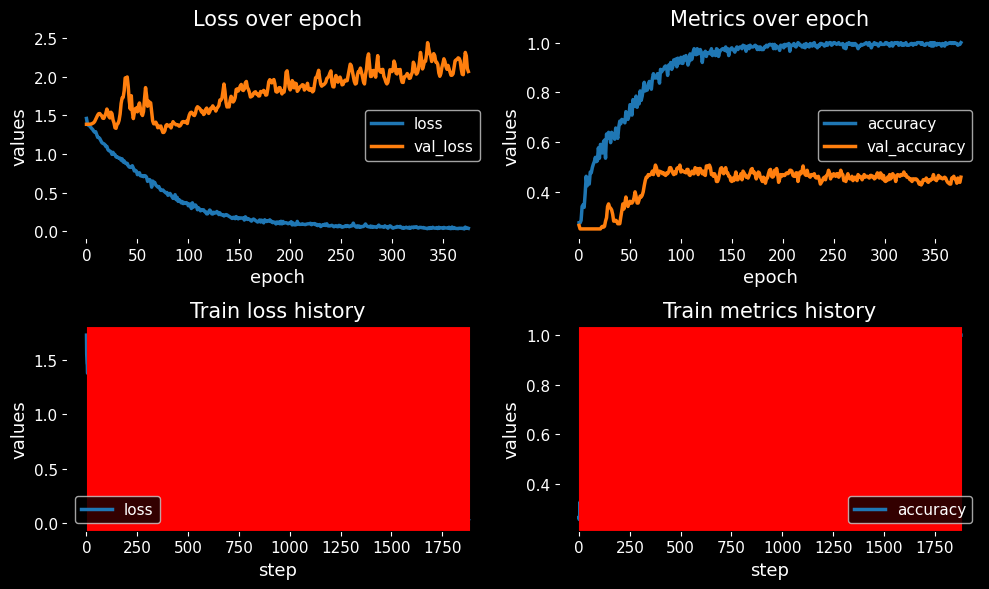


Epoch 289: val_accuracy did not improve from 0.41319

Epoch 198: val_accuracy did not improve from 0.50347

Epoch 290: val_accuracy did not improve from 0.41319

Epoch 199: val_accuracy did not improve from 0.50347

Epoch 291: val_accuracy did not improve from 0.41319
Model `atcnet_orig_norm-no_clean_ch-20_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5069444444444444, 'test_subj-BCI-IV 2a-3_accuracy': 0.5069444444444444}


 98%|███████████████████████████████████████████████████████████████████████████████▋ | 122/124 [41:54<00:09,  4.78s/it]


Epoch 200: val_accuracy did not improve from 0.50347

Epoch 292: val_accuracy did not improve from 0.41319

Epoch 201: val_accuracy did not improve from 0.50347

Epoch 293: val_accuracy did not improve from 0.41319

Epoch 202: val_accuracy did not improve from 0.50347

Epoch 294: val_accuracy did not improve from 0.41319

Epoch 203: val_accuracy did not improve from 0.50347

Epoch 295: val_accuracy did not improve from 0.41319

Epoch 204: val_accuracy did not improve from 0.50347

Epoch 296: val_accuracy did not improve from 0.41319

Epoch 205: val_accuracy did not improve from 0.50347

Epoch 297: val_accuracy did not improve from 0.41319

Epoch 206: val_accuracy did not improve from 0.50347

Epoch 298: val_accuracy did not improve from 0.41319

Epoch 207: val_accuracy did not improve from 0.50347

Epoch 299: val_accuracy did not improve from 0.41319

Epoch 208: val_accuracy did not improve from 0.50347

Epoch 300: val_accuracy did not improve from 0.41319

Epoch 209: val_accuracy did

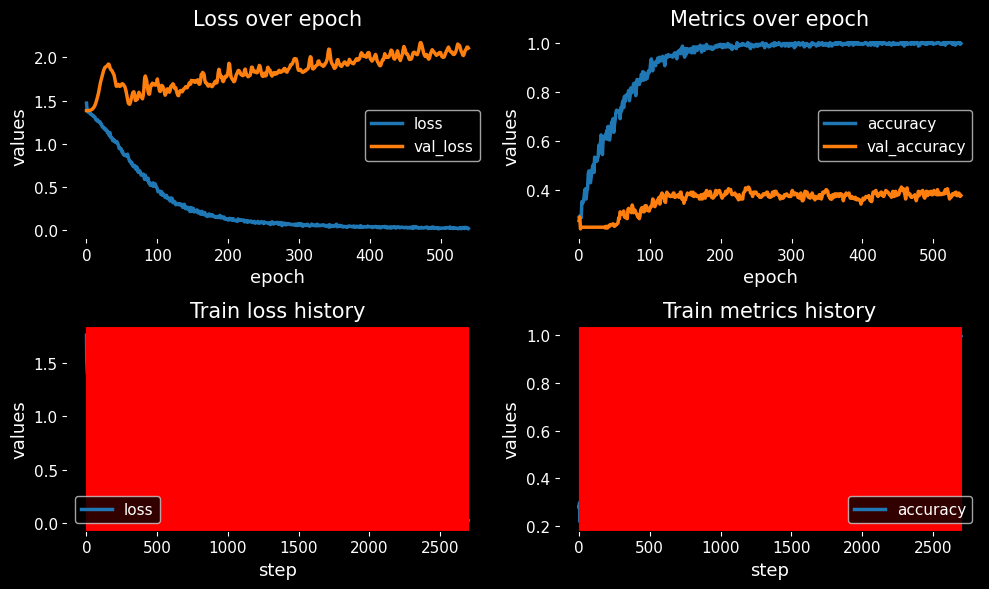


Epoch 460: val_accuracy did not improve from 0.51736

Epoch 461: val_accuracy did not improve from 0.51736

Epoch 462: val_accuracy did not improve from 0.51736
Model `atcnet_orig_norm-no_clean_ch-21_subj-1_run-10_scenario-3` metrics : {'test_accuracy': 0.4131944444444444, 'test_subj-BCI-IV 2a-1_accuracy': 0.4131944444444444}


 99%|████████████████████████████████████████████████████████████████████████████████▎| 123/124 [43:18<00:09,  9.67s/it]


Epoch 463: val_accuracy did not improve from 0.51736

Epoch 464: val_accuracy did not improve from 0.51736

Epoch 465: val_accuracy did not improve from 0.51736

Epoch 466: val_accuracy did not improve from 0.51736

Epoch 467: val_accuracy did not improve from 0.51736

Epoch 468: val_accuracy did not improve from 0.51736

Epoch 469: val_accuracy did not improve from 0.51736

Epoch 470: val_accuracy did not improve from 0.51736

Epoch 471: val_accuracy did not improve from 0.51736

Epoch 472: val_accuracy did not improve from 0.51736

Epoch 473: val_accuracy did not improve from 0.51736

Epoch 474: val_accuracy did not improve from 0.51736

Epoch 475: val_accuracy did not improve from 0.51736

Epoch 476: val_accuracy did not improve from 0.51736

Epoch 477: val_accuracy did not improve from 0.51736

Epoch 478: val_accuracy did not improve from 0.51736

Epoch 479: val_accuracy did not improve from 0.51736

Epoch 480: val_accuracy did not improve from 0.51736

Epoch 481: val_accuracy did

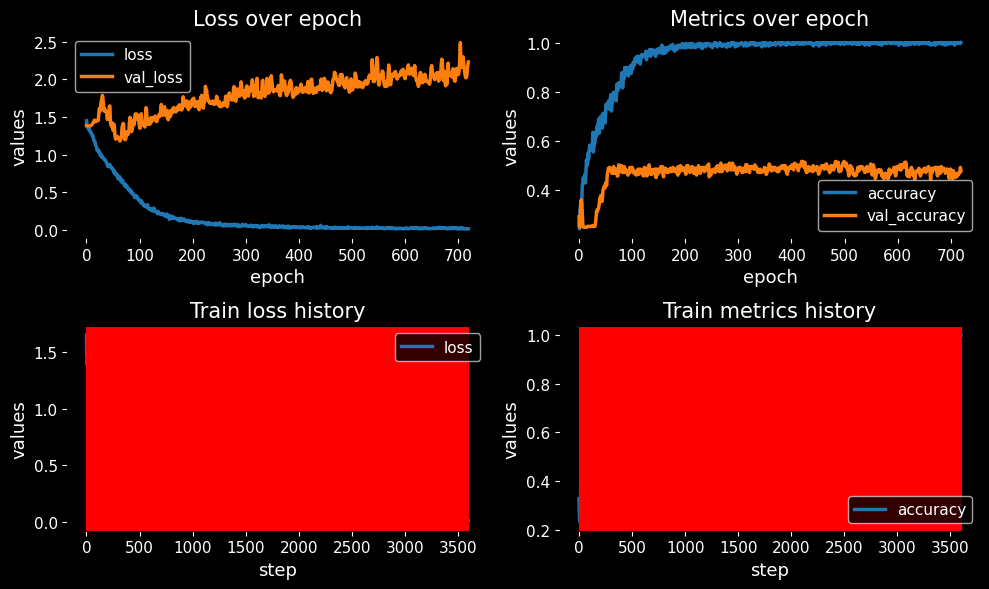

Model `atcnet_orig_norm-no_clean_ch-21_subj-3_run-10_scenario-3` metrics : {'test_accuracy': 0.5173611111111112, 'test_subj-BCI-IV 2a-3_accuracy': 0.5173611111111112}


100%|█████████████████████████████████████████████████████████████████████████████████| 124/124 [44:40<00:00, 21.62s/it]


{'atcnet_orig_norm-no_subj-1_run-10_scenario-3': {'scenario': 3,
  'model_name': 'atcnet_orig_norm-no_subj-1_run-10_scenario-3',
  'model_type': 'classifier',
  'pretrained': None,
  'skip_new': False,
  'scenario_config': {'train_on_multi_subjects': False},
  'dataset_config': {'task': 'classification',
   'test_task': 'classification',
   'dataset': 'bci-iv_2a',
   'subjects': 1,
   'channel': None,
   'loso': 0,
   'val_split': None,
   'test_split': 0.2,
   'per_user_label': False,
   'time_window': 4.5,
   'offset': 1.5,
   'test_sessions': 1},
  'model_config': {'nom': 'atcnet_orig_norm-no_subj-1_run-10_scenario-3',
   'rate': None,
   'architecture_name': 'atcnet',
   'normalization_config': {'normalize': <EEGNormalization.NORMAL: 1>,
    'per_channel': True},
   'keep_spatial_information': 'auto',
   'max_input_length': 4.5,
   'use_fixed_length_input': True},
  'compile_config': {'optimizer': 'adam', 'optimizer_config': {'lr': 0.001}},
  'train_config': {'epochs': 1000,
   'ba

In [1]:
import time
import importlib
import multiprocessing
import numpy as np

from loggers import set_level
from utils import plot, time_to_string
from experiments import scenarios, scenarios_utils, model_utils, data_utils

set_level('info')

#_scenarios = ['_testsplit-50_scenario-1', '_testsplit-50_scenario-2', '_scenario-3', '_scenario-4']
_scenarios = ['_scenario-3']
experimental_models = [
    'eegtcnet2_nc_orig_subj-{subject}_run-{run}'
]

experimental_models = [
    'atcnet_orig_norm-no_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_clean_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-{channel}_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_clean_ch-{channel}_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-1-5_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-13-17_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-21_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-6-12_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-7-11_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-8-12_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-7-11-15_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-7-11-12-15_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-9-19_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-1-5_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-13-17-21_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-1-5-13-17-21_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-3-8-9-10-15_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-2-8-14-4-10-16_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-6-9-12-21_subj-{subject}_run-{run}',
    'atcnet_orig_norm-no_ch-0-7-9-11-19_subj-{subject}_run-{run}',
]
experiments = []
for exp in experimental_models:
    for scenario in _scenarios:
        experiments.extend([exp + scenario])

results = scenarios.run_experiments(
    experiments,
    subject    = [1, 3] if len(_scenarios) == 1 else range(1, 10),
    skip_new   = False,
    run        = 10,
    channel    = range(22),
    gpu        = 0,
    gpu_memory = 1024 * 3,
    max_workers = 4
)
results

In [1]:
import shutil

name = 'eegtcnet_orig_norm-no_task-cli_subj-1_run-None_scenario-3'

for path in ('pretrained_models', 'evaluations'):
    try:
        shutil.rmtree(path + '/' + name)
    except:
        pass
#shutil.rmtree('pretrained_models/eegtcnet2_nc_orig_subj-1_run-None_scenario-3')

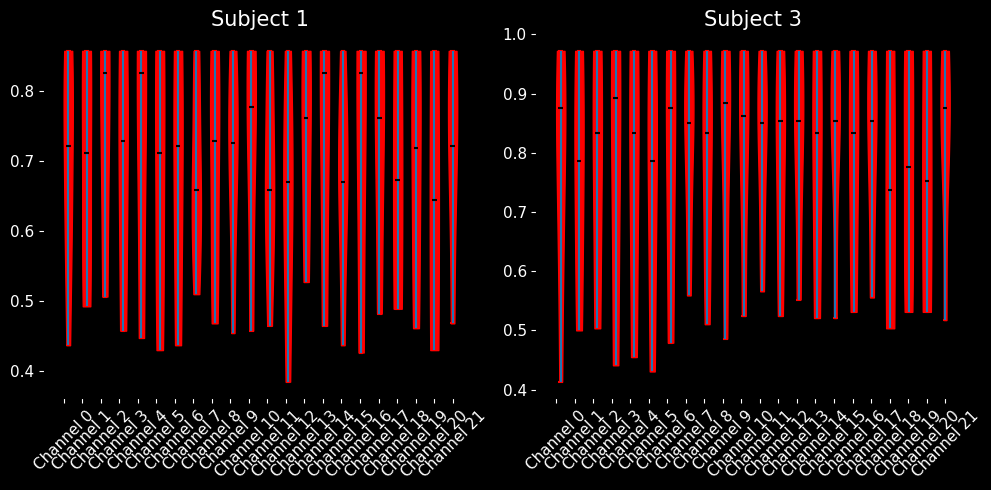

{'atcnet_orig_norm-no_subj-1_run-10_scenario-3': 0.8576388888888888,
 'atcnet_orig_norm-no_subj-3_run-10_scenario-3': 0.9722222222222222,
 'atcnet_orig_norm-no_ch-0_subj-1_run-10_scenario-3': 0.4375,
 'atcnet_orig_norm-no_ch-0_subj-3_run-10_scenario-3': 0.4131944444444444,
 'atcnet_orig_norm-no_ch-1_subj-1_run-10_scenario-3': 0.4930555555555556,
 'atcnet_orig_norm-no_ch-1_subj-3_run-10_scenario-3': 0.5,
 'atcnet_orig_norm-no_ch-2_subj-1_run-10_scenario-3': 0.5069444444444444,
 'atcnet_orig_norm-no_ch-2_subj-3_run-10_scenario-3': 0.5034722222222222,
 'atcnet_orig_norm-no_ch-3_subj-1_run-10_scenario-3': 0.4583333333333333,
 'atcnet_orig_norm-no_ch-3_subj-3_run-10_scenario-3': 0.4409722222222222,
 'atcnet_orig_norm-no_ch-4_subj-1_run-10_scenario-3': 0.4479166666666667,
 'atcnet_orig_norm-no_ch-4_subj-3_run-10_scenario-3': 0.4548611111111111,
 'atcnet_orig_norm-no_ch-5_subj-1_run-10_scenario-3': 0.4305555555555556,
 'atcnet_orig_norm-no_ch-5_subj-3_run-10_scenario-3': 0.4305555555555556,
 

In [6]:
from experiments import get_model_info

from utils import plot_multiple

accuracies = {k : v['metrics']['test_accuracy'] for k, v in results.items()}

data = {}
for name, acc in accuracies.items():
    subj, chans = get_model_info(name, 'subj'), get_model_info(name, 'ch', default = list(range(22)))
    if isinstance(chans, int): chans = [chans]
    data.setdefault('Subject {}'.format(subj), {})
    for ch in chans:
        data['Subject {}'.format(subj)].setdefault('Channel ' + str(ch), []).append(acc)

plot_multiple(** {k : {'x' : v} for k, v in data.items()}, use_subplots = True, plot_type = 'violinplot', xtick_rotation = 45)
accuracies

(1, 22, 16, 2)
[0.117 0.118 0.134 0.158 0.123 0.14  0.195 0.229 0.108 0.153 0.132 0.234
 0.123 0.144 0.133 0.253 0.161 0.164 0.15  0.127 0.158 0.175]
[-0.12  -0.137 -0.116 -0.153 -0.169 -0.181 -0.18  -0.218 -0.126 -0.158
 -0.114 -0.151 -0.232 -0.199 -0.164 -0.208 -0.135 -0.151 -0.155 -0.139
 -0.098 -0.161]
[-0.008  0.004  0.004 -0.01   0.026 -0.006  0.017  0.009 -0.004 -0.003
 -0.005  0.013 -0.011 -0.031  0.002 -0.016  0.023  0.015 -0.005 -0.016
  0.012 -0.003]
[0.066 0.067 0.072 0.082 0.062 0.077 0.083 0.096 0.07  0.093 0.067 0.094
 0.078 0.088 0.073 0.115 0.076 0.081 0.08  0.07  0.058 0.094]


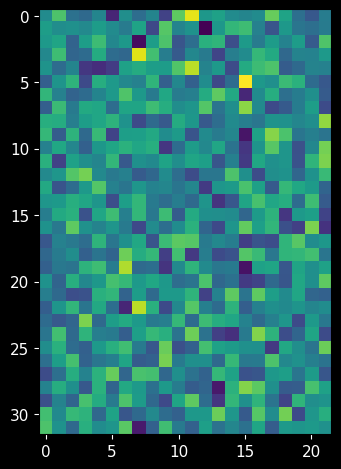

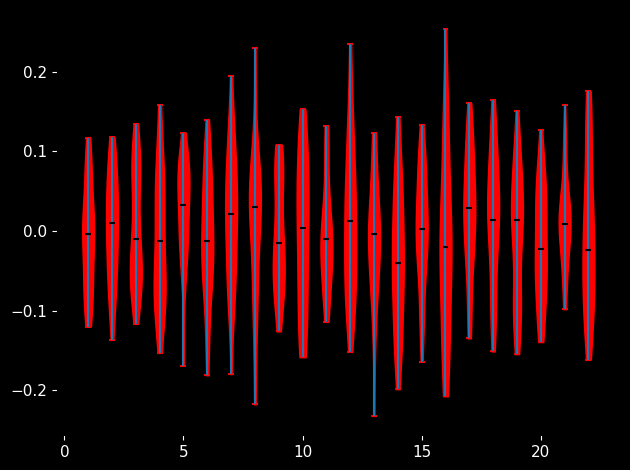

In [35]:
from models import get_pretrained

model = get_pretrained('atcnet_orig_norm-no_subj-3_run-10_scenario-3')

l = model.model.layers[3]
print(l)
w = l.get_weights()[0]
print(w.shape)
w = np.reshape(w, [22, -1])
print(np.around(np.max(w, axis = -1), decimals = 3))
print(np.around(np.min(w, axis = -1), decimals = 3))
print(np.around(np.mean(w, axis = -1), decimals = 3))
print(np.around(np.std(w, axis = -1), decimals = 3))
plot(w.T, plot_type = 'imshow')
plot(w.T, plot_type = 'violinplot')

### Tests on data processing

In [ ]:
import importlib

from utils import set_display_options
from experiments import data_utils, model_utils

set_display_options()

importlib.reload(data_utils)
importlib.reload(model_utils)

model_name = 'atcnet_subj-{subject}_run-{run}_win'

print(model_utils.get_model_config(model_name))
train, val, test, infos = data_utils.get_experimental_data(
    'bci-iv_2a',
    model_name,
    subject = range(1, 10),
    run     = 0,
    random_state = 0,
    val_split    = 0.2,

    valid_kw = {'time_window' : 4.5, 'offset' : 1.5},
    ** model_utils.get_model_config(model_name)
)
print(train.head())
print(test.head())

In [ ]:
for subj, subj_data in train.groupby('id'):
    print(subj, subj_data.iloc[0]['sex'], subj_data.iloc[0]['age'])

### Tests on scenarios

In [ ]:
import time
import importlib
import numpy as np

from utils import plot, time_to_string
from experiments import scenarios

importlib.reload(scenarios)

model_name = 'atcnet_subj-{subject}_run-{run}_test'

accuracies = {}

t0 = time.time()
results = scenarios.scenario_multi_subject_cross_session(
    model_name   = model_name,
    dataset_name = 'bci-iv_2a',
    subject      = range(1, 10),
    run          = 0,

    epochs = 100,

    offset      = 1.5,
    time_window = 4.5
)

for name, acc in results.items():
    if not isinstance(acc, (list, tuple)): acc = [acc]
    accuracies.setdefault(name, []).extend(acc)
    
print('Total time for {} : {}'.format(model_name, time_to_string(time.time() - t0)))

accuracies = {k : v for k, v in sorted(accuracies.items())}
print('Best accuracy :\n{}'.format('\n'.join([
    '- {} : {:.3f} ({:.3f} +/- {:.3f})'.format(name, np.max(acc), np.mean(acc), np.std(acc))
    for name, acc in accuracies.items()
])))

experiments = [model_name]
plot(
    accuracies, plot_type = 'boxplot', xtick_rotation = 75,
    vlines = np.arange(len(experiments) + 0.5, len(accuracies), len(experiments)),
    title = 'Benchmarking on BCI-IV 2a', xlabel = 'model name', ylabel = 'accuracy (%)',
    show = True, filename = 'benchmark_bci.png'
)

### General tests

In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

In [ ]:
import importlib

from loggers import set_level
from experiments import utils

set_level('time')

importlib.reload(utils)

train, valid, test, infos = utils.get_experimental_data(
    'bci-iv_2a', subject = range(1, 6), run = 0, model_name = None, split_subjects = 2, val_split = 1, per_user_label = False
)
print(infos)